In [1]:
#!pip install scikit-learn==0.24.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import r2_score

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format='svg' # To create high resolution images

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
df_train = pd.read_csv("Train_Data_Sand_final.csv")
df_train.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
0,3153.9180,2.6255,111.6507,0.002856,0.2451,0.0350,2.4820,2.3209,2.1170,3.62550,2.8706,1.03500,0.035000,17.121300,1.00,0.646870,1.00000,1.116474
1,3059.8872,2.3439,51.3317,13.115390,0.1195,0.1722,6.6866,4.6192,2.1794,2.61980,2.4634,0.44810,0.047510,10.968882,0.28,-2.264150,0.27590,199.653700
2,1271.2000,2.1300,40.2600,5749.670000,0.2800,0.3000,1.3900,27.8000,10.4000,2.81212,2.4100,0.98212,0.204636,9.260335,0.68,-0.631068,0.68212,146.890100
3,3055.9248,2.6137,103.4771,2.204989,0.1980,0.0381,5.8435,5.9513,4.1498,3.61370,2.8117,1.03810,0.038100,16.445610,1.00,0.646870,1.00000,35.907670
4,3201.4668,2.5744,129.7570,0.005124,0.2313,0.0572,2.2890,2.3533,2.1996,3.57440,2.8057,1.05720,0.057200,18.276937,1.00,0.646870,1.00000,2.219201


In [4]:
df_test = pd.read_csv("Test_Data_Sand_final.csv")
df_test.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
0,1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738
1,3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890
2,3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200
3,3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543
4,3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916


In [5]:
#set MD as index
df_train = df_train.set_index('MD')
df_train.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
MD,,,,,,,,,,,,,,,,,
3153.9180,2.6255,111.6507,0.002856,0.2451,0.0350,2.4820,2.3209,2.1170,3.62550,2.8706,1.03500,0.035000,17.121300,1.00,0.646870,1.00000,1.116474
3059.8872,2.3439,51.3317,13.115390,0.1195,0.1722,6.6866,4.6192,2.1794,2.61980,2.4634,0.44810,0.047510,10.968882,0.28,-2.264150,0.27590,199.653700
1271.2000,2.1300,40.2600,5749.670000,0.2800,0.3000,1.3900,27.8000,10.4000,2.81212,2.4100,0.98212,0.204636,9.260335,0.68,-0.631068,0.68212,146.890100
3055.9248,2.6137,103.4771,2.204989,0.1980,0.0381,5.8435,5.9513,4.1498,3.61370,2.8117,1.03810,0.038100,16.445610,1.00,0.646870,1.00000,35.907670
3201.4668,2.5744,129.7570,0.005124,0.2313,0.0572,2.2890,2.3533,2.1996,3.57440,2.8057,1.05720,0.057200,18.276937,1.00,0.646870,1.00000,2.219201


In [6]:
#set MD as index
df_test = df_test.set_index('MD')
df_test.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
MD,,,,,,,,,,,,,,,,,
1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738
3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890
3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200
3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543
3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916


In [7]:
# Define input and output for train data
X_train = df_train.drop(['T2LM', 'New_feat', 'New_feat2', 'New_feat3', 'New_feat4', 'New_feat5', 'New_feat6', 'New_feat7'], 1)
y_train = df_train[['T2LM']]

In [8]:
# Define input and output for test data
X_test = df_test.drop(['T2LM', 'New_feat', 'New_feat2', 'New_feat3', 'New_feat4', 'New_feat5', 'New_feat6', 'New_feat7'], 1)
y_test = df_test[['T2LM']]

In [9]:
# create the inputs and outputs
X_train = X_train.iloc[0:].values
y_train = y_train.iloc[:,-1].values

In [10]:
# create the inputs and outputs
X_test = X_test.iloc[0:].values
y_test = y_test.iloc[:,-1].values

Let's save the number of predictors to _n_cols_ since we will need this number when building our network.


In [11]:
n_cols = X_train.shape[1] # number of predictors

<a id="item1"></a>


## Import Keras


Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.


#### Let's go ahead and import the Keras library


In [7]:
import keras

2022-01-12 04:36:57.128962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 04:36:57.129011: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


As you can see, the TensorFlow backend was used to install the Keras library.


Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
from keras.constraints import maxnorm

<a id='item33'></a>


## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [14]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

The above function create a model that has 14 hidden layers, each of 50 hidden units.


<a id="item4"></a>


## Train and Test the Network


Let's call the function now to create our model.


In [15]:
# build the model
model = regression_model()

2022-01-11 06:58:40.476500: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-11 06:58:40.476590: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-11 06:58:40.476626: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-01-11 06:58:40.477547: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Next, we will train and test the model at the same time using the _fit_ method. We will train the model for 500 epochs.


In [20]:
# fit the model
model.fit(X_train, y_train, epochs=750, verbose=2)

Epoch 1/750
41/41 - 0s - loss: 11.1297 - 124ms/epoch - 3ms/step
Epoch 2/750
41/41 - 0s - loss: 12.7188 - 127ms/epoch - 3ms/step
Epoch 3/750
41/41 - 0s - loss: 10.9780 - 125ms/epoch - 3ms/step
Epoch 4/750
41/41 - 0s - loss: 10.7556 - 121ms/epoch - 3ms/step
Epoch 5/750
41/41 - 0s - loss: 12.0533 - 125ms/epoch - 3ms/step
Epoch 6/750
41/41 - 0s - loss: 10.8058 - 120ms/epoch - 3ms/step
Epoch 7/750
41/41 - 0s - loss: 10.1587 - 120ms/epoch - 3ms/step
Epoch 8/750
41/41 - 0s - loss: 11.0419 - 122ms/epoch - 3ms/step
Epoch 9/750
41/41 - 0s - loss: 9.9379 - 124ms/epoch - 3ms/step
Epoch 10/750
41/41 - 0s - loss: 10.4694 - 125ms/epoch - 3ms/step
Epoch 11/750
41/41 - 0s - loss: 10.2683 - 123ms/epoch - 3ms/step
Epoch 12/750
41/41 - 0s - loss: 9.6040 - 122ms/epoch - 3ms/step
Epoch 13/750
41/41 - 0s - loss: 9.8064 - 129ms/epoch - 3ms/step
Epoch 14/750
41/41 - 0s - loss: 9.4968 - 123ms/epoch - 3ms/step
Epoch 15/750
41/41 - 0s - loss: 10.1422 - 129ms/epoch - 3ms/step
Epoch 16/750
41/41 - 0s - loss: 9.7623

Epoch 128/750
41/41 - 0s - loss: 9.2477 - 120ms/epoch - 3ms/step
Epoch 129/750
41/41 - 0s - loss: 9.2234 - 114ms/epoch - 3ms/step
Epoch 130/750
41/41 - 0s - loss: 10.0180 - 120ms/epoch - 3ms/step
Epoch 131/750
41/41 - 0s - loss: 9.6064 - 118ms/epoch - 3ms/step
Epoch 132/750
41/41 - 0s - loss: 11.5573 - 123ms/epoch - 3ms/step
Epoch 133/750
41/41 - 0s - loss: 10.7716 - 123ms/epoch - 3ms/step
Epoch 134/750
41/41 - 0s - loss: 9.4017 - 123ms/epoch - 3ms/step
Epoch 135/750
41/41 - 0s - loss: 10.0800 - 115ms/epoch - 3ms/step
Epoch 136/750
41/41 - 0s - loss: 10.0465 - 118ms/epoch - 3ms/step
Epoch 137/750
41/41 - 0s - loss: 10.0041 - 114ms/epoch - 3ms/step
Epoch 138/750
41/41 - 0s - loss: 11.3201 - 121ms/epoch - 3ms/step
Epoch 139/750
41/41 - 0s - loss: 16.2419 - 114ms/epoch - 3ms/step
Epoch 140/750
41/41 - 0s - loss: 13.9678 - 122ms/epoch - 3ms/step
Epoch 141/750
41/41 - 0s - loss: 12.9653 - 115ms/epoch - 3ms/step
Epoch 142/750
41/41 - 0s - loss: 12.0834 - 123ms/epoch - 3ms/step
Epoch 143/750


Epoch 253/750
41/41 - 0s - loss: 8.4505 - 121ms/epoch - 3ms/step
Epoch 254/750
41/41 - 0s - loss: 9.3769 - 142ms/epoch - 3ms/step
Epoch 255/750
41/41 - 0s - loss: 9.1820 - 125ms/epoch - 3ms/step
Epoch 256/750
41/41 - 0s - loss: 9.8853 - 132ms/epoch - 3ms/step
Epoch 257/750
41/41 - 0s - loss: 10.0976 - 131ms/epoch - 3ms/step
Epoch 258/750
41/41 - 0s - loss: 12.8189 - 122ms/epoch - 3ms/step
Epoch 259/750
41/41 - 0s - loss: 13.4393 - 124ms/epoch - 3ms/step
Epoch 260/750
41/41 - 0s - loss: 12.0351 - 138ms/epoch - 3ms/step
Epoch 261/750
41/41 - 0s - loss: 10.4542 - 128ms/epoch - 3ms/step
Epoch 262/750
41/41 - 0s - loss: 10.6461 - 125ms/epoch - 3ms/step
Epoch 263/750
41/41 - 0s - loss: 9.5841 - 129ms/epoch - 3ms/step
Epoch 264/750
41/41 - 0s - loss: 9.1463 - 135ms/epoch - 3ms/step
Epoch 265/750
41/41 - 0s - loss: 9.6634 - 138ms/epoch - 3ms/step
Epoch 266/750
41/41 - 0s - loss: 9.6737 - 123ms/epoch - 3ms/step
Epoch 267/750
41/41 - 0s - loss: 9.5147 - 120ms/epoch - 3ms/step
Epoch 268/750
41/41

Epoch 378/750
41/41 - 0s - loss: 10.0828 - 127ms/epoch - 3ms/step
Epoch 379/750
41/41 - 0s - loss: 9.4348 - 126ms/epoch - 3ms/step
Epoch 380/750
41/41 - 0s - loss: 8.9878 - 126ms/epoch - 3ms/step
Epoch 381/750
41/41 - 0s - loss: 8.8467 - 130ms/epoch - 3ms/step
Epoch 382/750
41/41 - 0s - loss: 8.3823 - 132ms/epoch - 3ms/step
Epoch 383/750
41/41 - 0s - loss: 10.5410 - 127ms/epoch - 3ms/step
Epoch 384/750
41/41 - 0s - loss: 9.7525 - 127ms/epoch - 3ms/step
Epoch 385/750
41/41 - 0s - loss: 9.1329 - 141ms/epoch - 3ms/step
Epoch 386/750
41/41 - 0s - loss: 8.3677 - 131ms/epoch - 3ms/step
Epoch 387/750
41/41 - 0s - loss: 16.0703 - 129ms/epoch - 3ms/step
Epoch 388/750
41/41 - 0s - loss: 14.3550 - 140ms/epoch - 3ms/step
Epoch 389/750
41/41 - 0s - loss: 13.0094 - 139ms/epoch - 3ms/step
Epoch 390/750
41/41 - 0s - loss: 13.9163 - 136ms/epoch - 3ms/step
Epoch 391/750
41/41 - 0s - loss: 12.9092 - 122ms/epoch - 3ms/step
Epoch 392/750
41/41 - 0s - loss: 12.1468 - 126ms/epoch - 3ms/step
Epoch 393/750
41/

41/41 - 0s - loss: 10.0045 - 127ms/epoch - 3ms/step
Epoch 504/750
41/41 - 0s - loss: 8.8328 - 133ms/epoch - 3ms/step
Epoch 505/750
41/41 - 0s - loss: 8.7678 - 127ms/epoch - 3ms/step
Epoch 506/750
41/41 - 0s - loss: 8.3344 - 127ms/epoch - 3ms/step
Epoch 507/750
41/41 - 0s - loss: 10.0021 - 128ms/epoch - 3ms/step
Epoch 508/750
41/41 - 0s - loss: 10.9840 - 116ms/epoch - 3ms/step
Epoch 509/750
41/41 - 0s - loss: 9.1795 - 128ms/epoch - 3ms/step
Epoch 510/750
41/41 - 0s - loss: 8.6622 - 122ms/epoch - 3ms/step
Epoch 511/750
41/41 - 0s - loss: 9.2548 - 120ms/epoch - 3ms/step
Epoch 512/750
41/41 - 0s - loss: 8.5482 - 116ms/epoch - 3ms/step
Epoch 513/750
41/41 - 0s - loss: 9.0781 - 119ms/epoch - 3ms/step
Epoch 514/750
41/41 - 0s - loss: 12.1326 - 122ms/epoch - 3ms/step
Epoch 515/750
41/41 - 0s - loss: 9.7445 - 118ms/epoch - 3ms/step
Epoch 516/750
41/41 - 0s - loss: 10.5672 - 129ms/epoch - 3ms/step
Epoch 517/750
41/41 - 0s - loss: 10.9627 - 125ms/epoch - 3ms/step
Epoch 518/750
41/41 - 0s - loss: 

Epoch 629/750
41/41 - 0s - loss: 12.1257 - 122ms/epoch - 3ms/step
Epoch 630/750
41/41 - 0s - loss: 11.2483 - 126ms/epoch - 3ms/step
Epoch 631/750
41/41 - 0s - loss: 10.4903 - 115ms/epoch - 3ms/step
Epoch 632/750
41/41 - 0s - loss: 9.3790 - 117ms/epoch - 3ms/step
Epoch 633/750
41/41 - 0s - loss: 9.1710 - 125ms/epoch - 3ms/step
Epoch 634/750
41/41 - 0s - loss: 9.0945 - 123ms/epoch - 3ms/step
Epoch 635/750
41/41 - 0s - loss: 8.8321 - 129ms/epoch - 3ms/step
Epoch 636/750
41/41 - 0s - loss: 9.6349 - 119ms/epoch - 3ms/step
Epoch 637/750
41/41 - 0s - loss: 9.1236 - 122ms/epoch - 3ms/step
Epoch 638/750
41/41 - 0s - loss: 9.7954 - 115ms/epoch - 3ms/step
Epoch 639/750
41/41 - 0s - loss: 8.9100 - 121ms/epoch - 3ms/step
Epoch 640/750
41/41 - 0s - loss: 8.7352 - 123ms/epoch - 3ms/step
Epoch 641/750
41/41 - 0s - loss: 8.2507 - 127ms/epoch - 3ms/step
Epoch 642/750
41/41 - 0s - loss: 8.6113 - 125ms/epoch - 3ms/step
Epoch 643/750
41/41 - 0s - loss: 10.3797 - 119ms/epoch - 3ms/step
Epoch 644/750
41/41 -

In [21]:
# evaluate the model
pred = model.predict(X_test)

In [22]:
# Evaluate model predictions
model_score_test = r2_score(y_test, pred)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of test data: 0.656614237024196
Mean Absolute Error: 23.516815776172425
Mean Squared Error: 3480.4119173490926
Root Mean Squared Error: 58.995016038213706
MAPE 0.502
MPD 20.187


In [23]:
train = model.predict(X_train)
model_score_train = r2_score(y_train, train)
print('Accuracy of train data:',model_score_train)

Accuracy of train data: 0.9214326288689874


In [9]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR', 'New_feat4', 'New_feat6'], 1) #Feature Matrix
y_train = df_train[['T2LM']]

In [10]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR', 'New_feat4', 'New_feat6'], 1) #Feature Matrix
y_test = df_test[['T2LM']]

In [11]:
n_cols = X_train.shape[1] # number of predictors

In [12]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

In [13]:
# build the model
model = regression_model()

2022-01-12 04:37:08.687630: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-12 04:37:08.687700: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-12 04:37:08.687733: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-01-12 04:37:08.688425: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# fit the model
model.fit(X_train, y_train, epochs=600, verbose=2)

Epoch 1/600
41/41 - 1s - loss: 53.2107 - 1s/epoch - 30ms/step
Epoch 2/600
41/41 - 0s - loss: 49.6851 - 146ms/epoch - 4ms/step
Epoch 3/600
41/41 - 0s - loss: 49.4261 - 134ms/epoch - 3ms/step
Epoch 4/600
41/41 - 0s - loss: 49.3272 - 117ms/epoch - 3ms/step
Epoch 5/600
41/41 - 0s - loss: 49.3287 - 122ms/epoch - 3ms/step
Epoch 6/600
41/41 - 0s - loss: 39.6835 - 118ms/epoch - 3ms/step
Epoch 7/600
41/41 - 0s - loss: 36.0537 - 115ms/epoch - 3ms/step
Epoch 8/600
41/41 - 0s - loss: 32.5744 - 108ms/epoch - 3ms/step
Epoch 9/600
41/41 - 0s - loss: 30.4950 - 120ms/epoch - 3ms/step
Epoch 10/600
41/41 - 0s - loss: 31.3002 - 142ms/epoch - 3ms/step
Epoch 11/600
41/41 - 0s - loss: 29.7442 - 142ms/epoch - 3ms/step
Epoch 12/600
41/41 - 0s - loss: 31.2371 - 128ms/epoch - 3ms/step
Epoch 13/600
41/41 - 0s - loss: 29.5269 - 120ms/epoch - 3ms/step
Epoch 14/600
41/41 - 0s - loss: 29.5700 - 122ms/epoch - 3ms/step
Epoch 15/600
41/41 - 0s - loss: 29.0174 - 125ms/epoch - 3ms/step
Epoch 16/600
41/41 - 0s - loss: 29.0

Epoch 127/600
41/41 - 0s - loss: 22.3604 - 159ms/epoch - 4ms/step
Epoch 128/600
41/41 - 0s - loss: 21.7365 - 142ms/epoch - 3ms/step
Epoch 129/600
41/41 - 0s - loss: 21.4250 - 154ms/epoch - 4ms/step
Epoch 130/600
41/41 - 0s - loss: 22.4114 - 166ms/epoch - 4ms/step
Epoch 131/600
41/41 - 0s - loss: 20.9000 - 148ms/epoch - 4ms/step
Epoch 132/600
41/41 - 0s - loss: 22.2307 - 168ms/epoch - 4ms/step
Epoch 133/600
41/41 - 0s - loss: 22.8479 - 156ms/epoch - 4ms/step
Epoch 134/600
41/41 - 0s - loss: 22.4138 - 153ms/epoch - 4ms/step
Epoch 135/600
41/41 - 0s - loss: 22.4581 - 137ms/epoch - 3ms/step
Epoch 136/600
41/41 - 0s - loss: 22.4057 - 139ms/epoch - 3ms/step
Epoch 137/600
41/41 - 0s - loss: 21.6393 - 156ms/epoch - 4ms/step
Epoch 138/600
41/41 - 0s - loss: 22.9977 - 159ms/epoch - 4ms/step
Epoch 139/600
41/41 - 0s - loss: 22.5464 - 172ms/epoch - 4ms/step
Epoch 140/600
41/41 - 0s - loss: 23.2739 - 170ms/epoch - 4ms/step
Epoch 141/600
41/41 - 0s - loss: 21.1916 - 151ms/epoch - 4ms/step
Epoch 142/

41/41 - 0s - loss: 20.8122 - 140ms/epoch - 3ms/step
Epoch 252/600
41/41 - 0s - loss: 20.5185 - 164ms/epoch - 4ms/step
Epoch 253/600
41/41 - 0s - loss: 20.3549 - 160ms/epoch - 4ms/step
Epoch 254/600
41/41 - 0s - loss: 21.2478 - 139ms/epoch - 3ms/step
Epoch 255/600
41/41 - 0s - loss: 21.0758 - 126ms/epoch - 3ms/step
Epoch 256/600
41/41 - 0s - loss: 20.9411 - 131ms/epoch - 3ms/step
Epoch 257/600
41/41 - 0s - loss: 20.9997 - 128ms/epoch - 3ms/step
Epoch 258/600
41/41 - 0s - loss: 21.0265 - 129ms/epoch - 3ms/step
Epoch 259/600
41/41 - 0s - loss: 20.6205 - 137ms/epoch - 3ms/step
Epoch 260/600
41/41 - 0s - loss: 20.3491 - 143ms/epoch - 3ms/step
Epoch 261/600
41/41 - 0s - loss: 20.2018 - 142ms/epoch - 3ms/step
Epoch 262/600
41/41 - 0s - loss: 19.9023 - 140ms/epoch - 3ms/step
Epoch 263/600
41/41 - 0s - loss: 20.7135 - 124ms/epoch - 3ms/step
Epoch 264/600
41/41 - 0s - loss: 19.7697 - 146ms/epoch - 4ms/step
Epoch 265/600
41/41 - 0s - loss: 22.3186 - 142ms/epoch - 3ms/step
Epoch 266/600
41/41 - 0s

Epoch 376/600
41/41 - 0s - loss: 18.0335 - 147ms/epoch - 4ms/step
Epoch 377/600
41/41 - 0s - loss: 18.7230 - 137ms/epoch - 3ms/step
Epoch 378/600
41/41 - 0s - loss: 18.3225 - 158ms/epoch - 4ms/step
Epoch 379/600
41/41 - 0s - loss: 18.8299 - 135ms/epoch - 3ms/step
Epoch 380/600
41/41 - 0s - loss: 18.2247 - 143ms/epoch - 3ms/step
Epoch 381/600
41/41 - 0s - loss: 18.0612 - 141ms/epoch - 3ms/step
Epoch 382/600
41/41 - 0s - loss: 21.6578 - 139ms/epoch - 3ms/step
Epoch 383/600
41/41 - 0s - loss: 19.5489 - 125ms/epoch - 3ms/step
Epoch 384/600
41/41 - 0s - loss: 19.4466 - 119ms/epoch - 3ms/step
Epoch 385/600
41/41 - 0s - loss: 19.0104 - 120ms/epoch - 3ms/step
Epoch 386/600
41/41 - 0s - loss: 19.2813 - 128ms/epoch - 3ms/step
Epoch 387/600
41/41 - 0s - loss: 18.6270 - 116ms/epoch - 3ms/step
Epoch 388/600
41/41 - 0s - loss: 18.2003 - 121ms/epoch - 3ms/step
Epoch 389/600
41/41 - 0s - loss: 18.0314 - 127ms/epoch - 3ms/step
Epoch 390/600
41/41 - 0s - loss: 17.8907 - 133ms/epoch - 3ms/step
Epoch 391/

41/41 - 0s - loss: 19.0128 - 119ms/epoch - 3ms/step
Epoch 501/600
41/41 - 0s - loss: 18.1857 - 125ms/epoch - 3ms/step
Epoch 502/600
41/41 - 0s - loss: 16.7543 - 131ms/epoch - 3ms/step
Epoch 503/600
41/41 - 0s - loss: 17.2810 - 116ms/epoch - 3ms/step
Epoch 504/600
41/41 - 0s - loss: 17.5407 - 137ms/epoch - 3ms/step
Epoch 505/600
41/41 - 0s - loss: 17.0872 - 140ms/epoch - 3ms/step
Epoch 506/600
41/41 - 0s - loss: 16.1646 - 134ms/epoch - 3ms/step
Epoch 507/600
41/41 - 0s - loss: 17.0419 - 138ms/epoch - 3ms/step
Epoch 508/600
41/41 - 0s - loss: 16.1019 - 135ms/epoch - 3ms/step
Epoch 509/600
41/41 - 0s - loss: 22.4112 - 143ms/epoch - 3ms/step
Epoch 510/600
41/41 - 0s - loss: 21.4577 - 140ms/epoch - 3ms/step
Epoch 511/600
41/41 - 0s - loss: 21.0755 - 138ms/epoch - 3ms/step
Epoch 512/600
41/41 - 0s - loss: 21.8102 - 124ms/epoch - 3ms/step
Epoch 513/600
41/41 - 0s - loss: 21.1003 - 132ms/epoch - 3ms/step
Epoch 514/600
41/41 - 0s - loss: 20.7660 - 140ms/epoch - 3ms/step
Epoch 515/600
41/41 - 0s

In [17]:
# evaluate the model
pred = model.predict(X_test)

# evaluate the model
predt = model.predict(X_train)

In [18]:
# Evaluate model predictions

model_score_train = r2_score(y_train, predt)
model_score_test = r2_score(y_test, pred)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.8336395691861784
Accuracy of test data: 0.7572414304423075
Mean Absolute Error: 20.617462925313436
Mean Squared Error: 2460.4975209375402
Root Mean Squared Error: 49.603402312115044
MAPE 0.560
MPD 15.816


# Final model

In [19]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor

In [25]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus', kernel_constraint=maxnorm(3), input_shape=(n_cols,)))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dense(80, kernel_initializer='lecun_uniform', activation='softplus'))
    model.add(Dropout(0.8))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='softplus'))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

In [26]:
# build the model
model = regression_model()

# create model
#model = KerasRegressor(build_fn=regression_model)

In [44]:
# fit the model
model.fit(X_train, y_train, batch_size=10, epochs=750, verbose=2)

Epoch 1/750
130/130 - 0s - loss: 20.0027 - 398ms/epoch - 3ms/step
Epoch 2/750
130/130 - 0s - loss: 21.5959 - 446ms/epoch - 3ms/step
Epoch 3/750
130/130 - 0s - loss: 19.7899 - 432ms/epoch - 3ms/step
Epoch 4/750
130/130 - 0s - loss: 19.5263 - 433ms/epoch - 3ms/step
Epoch 5/750
130/130 - 0s - loss: 19.2921 - 440ms/epoch - 3ms/step
Epoch 6/750
130/130 - 0s - loss: 18.6210 - 414ms/epoch - 3ms/step
Epoch 7/750
130/130 - 0s - loss: 20.4675 - 405ms/epoch - 3ms/step
Epoch 8/750
130/130 - 0s - loss: 19.0750 - 439ms/epoch - 3ms/step
Epoch 9/750
130/130 - 0s - loss: 19.6959 - 412ms/epoch - 3ms/step
Epoch 10/750
130/130 - 0s - loss: 19.0054 - 406ms/epoch - 3ms/step
Epoch 11/750
130/130 - 0s - loss: 18.7434 - 409ms/epoch - 3ms/step
Epoch 12/750
130/130 - 0s - loss: 18.8827 - 422ms/epoch - 3ms/step
Epoch 13/750
130/130 - 0s - loss: 18.1969 - 399ms/epoch - 3ms/step
Epoch 14/750
130/130 - 0s - loss: 18.5282 - 410ms/epoch - 3ms/step
Epoch 15/750
130/130 - 0s - loss: 18.9770 - 441ms/epoch - 3ms/step
Epoc

130/130 - 1s - loss: 19.4595 - 522ms/epoch - 4ms/step
Epoch 124/750
130/130 - 0s - loss: 18.9359 - 431ms/epoch - 3ms/step
Epoch 125/750
130/130 - 0s - loss: 20.5094 - 435ms/epoch - 3ms/step
Epoch 126/750
130/130 - 0s - loss: 18.8304 - 419ms/epoch - 3ms/step
Epoch 127/750
130/130 - 0s - loss: 18.8894 - 433ms/epoch - 3ms/step
Epoch 128/750
130/130 - 0s - loss: 20.2076 - 472ms/epoch - 4ms/step
Epoch 129/750
130/130 - 1s - loss: 20.1122 - 522ms/epoch - 4ms/step
Epoch 130/750
130/130 - 0s - loss: 19.9147 - 429ms/epoch - 3ms/step
Epoch 131/750
130/130 - 0s - loss: 20.5412 - 489ms/epoch - 4ms/step
Epoch 132/750
130/130 - 0s - loss: 19.2086 - 444ms/epoch - 3ms/step
Epoch 133/750
130/130 - 0s - loss: 18.2231 - 450ms/epoch - 3ms/step
Epoch 134/750
130/130 - 0s - loss: 19.2115 - 456ms/epoch - 4ms/step
Epoch 135/750
130/130 - 0s - loss: 20.1050 - 431ms/epoch - 3ms/step
Epoch 136/750
130/130 - 0s - loss: 20.7752 - 428ms/epoch - 3ms/step
Epoch 137/750
130/130 - 0s - loss: 19.3190 - 433ms/epoch - 3ms

Epoch 244/750
130/130 - 0s - loss: 26.1345 - 448ms/epoch - 3ms/step
Epoch 245/750
130/130 - 0s - loss: 24.6158 - 431ms/epoch - 3ms/step
Epoch 246/750
130/130 - 0s - loss: 25.4555 - 424ms/epoch - 3ms/step
Epoch 247/750
130/130 - 0s - loss: 25.0927 - 406ms/epoch - 3ms/step
Epoch 248/750
130/130 - 0s - loss: 24.3182 - 417ms/epoch - 3ms/step
Epoch 249/750
130/130 - 0s - loss: 23.5724 - 456ms/epoch - 4ms/step
Epoch 250/750
130/130 - 0s - loss: 24.0312 - 443ms/epoch - 3ms/step
Epoch 251/750
130/130 - 0s - loss: 23.6635 - 472ms/epoch - 4ms/step
Epoch 252/750
130/130 - 0s - loss: 23.4331 - 470ms/epoch - 4ms/step
Epoch 253/750
130/130 - 0s - loss: 23.3644 - 474ms/epoch - 4ms/step
Epoch 254/750
130/130 - 0s - loss: 24.1593 - 447ms/epoch - 3ms/step
Epoch 255/750
130/130 - 0s - loss: 22.4711 - 439ms/epoch - 3ms/step
Epoch 256/750
130/130 - 0s - loss: 24.1898 - 439ms/epoch - 3ms/step
Epoch 257/750
130/130 - 0s - loss: 22.9608 - 455ms/epoch - 3ms/step
Epoch 258/750
130/130 - 0s - loss: 21.7172 - 452

Epoch 365/750
130/130 - 0s - loss: 22.2633 - 478ms/epoch - 4ms/step
Epoch 366/750
130/130 - 0s - loss: 24.5306 - 464ms/epoch - 4ms/step
Epoch 367/750
130/130 - 0s - loss: 23.9770 - 425ms/epoch - 3ms/step
Epoch 368/750
130/130 - 0s - loss: 23.6041 - 439ms/epoch - 3ms/step
Epoch 369/750
130/130 - 0s - loss: 22.9498 - 461ms/epoch - 4ms/step
Epoch 370/750
130/130 - 0s - loss: 22.8124 - 435ms/epoch - 3ms/step
Epoch 371/750
130/130 - 0s - loss: 21.1712 - 484ms/epoch - 4ms/step
Epoch 372/750
130/130 - 1s - loss: 23.3965 - 509ms/epoch - 4ms/step
Epoch 373/750
130/130 - 0s - loss: 22.2176 - 500ms/epoch - 4ms/step
Epoch 374/750
130/130 - 1s - loss: 22.1126 - 531ms/epoch - 4ms/step
Epoch 375/750
130/130 - 1s - loss: 20.7635 - 504ms/epoch - 4ms/step
Epoch 376/750
130/130 - 0s - loss: 22.0455 - 466ms/epoch - 4ms/step
Epoch 377/750
130/130 - 0s - loss: 21.6395 - 455ms/epoch - 4ms/step
Epoch 378/750
130/130 - 0s - loss: 21.1246 - 488ms/epoch - 4ms/step
Epoch 379/750
130/130 - 0s - loss: 20.8970 - 496

Epoch 486/750
130/130 - 0s - loss: 23.1185 - 453ms/epoch - 3ms/step
Epoch 487/750
130/130 - 1s - loss: 22.9801 - 509ms/epoch - 4ms/step
Epoch 488/750
130/130 - 0s - loss: 21.5680 - 457ms/epoch - 4ms/step
Epoch 489/750
130/130 - 0s - loss: 21.5768 - 468ms/epoch - 4ms/step
Epoch 490/750
130/130 - 0s - loss: 20.8206 - 478ms/epoch - 4ms/step
Epoch 491/750
130/130 - 0s - loss: 22.1278 - 468ms/epoch - 4ms/step
Epoch 492/750
130/130 - 0s - loss: 20.8387 - 439ms/epoch - 3ms/step
Epoch 493/750
130/130 - 0s - loss: 21.0237 - 487ms/epoch - 4ms/step
Epoch 494/750
130/130 - 1s - loss: 21.2938 - 538ms/epoch - 4ms/step
Epoch 495/750
130/130 - 0s - loss: 20.8165 - 466ms/epoch - 4ms/step
Epoch 496/750
130/130 - 0s - loss: 19.5087 - 436ms/epoch - 3ms/step
Epoch 497/750
130/130 - 0s - loss: 20.4865 - 461ms/epoch - 4ms/step
Epoch 498/750
130/130 - 0s - loss: 21.0427 - 475ms/epoch - 4ms/step
Epoch 499/750
130/130 - 0s - loss: 22.9771 - 480ms/epoch - 4ms/step
Epoch 500/750
130/130 - 1s - loss: 20.5371 - 526

Epoch 607/750
130/130 - 0s - loss: 20.4305 - 443ms/epoch - 3ms/step
Epoch 608/750
130/130 - 1s - loss: 21.1385 - 510ms/epoch - 4ms/step
Epoch 609/750
130/130 - 0s - loss: 20.5289 - 476ms/epoch - 4ms/step
Epoch 610/750
130/130 - 1s - loss: 19.7479 - 519ms/epoch - 4ms/step
Epoch 611/750
130/130 - 1s - loss: 21.2594 - 551ms/epoch - 4ms/step
Epoch 612/750
130/130 - 1s - loss: 21.1912 - 535ms/epoch - 4ms/step
Epoch 613/750
130/130 - 0s - loss: 20.0955 - 488ms/epoch - 4ms/step
Epoch 614/750
130/130 - 1s - loss: 20.3342 - 510ms/epoch - 4ms/step
Epoch 615/750
130/130 - 1s - loss: 20.4776 - 509ms/epoch - 4ms/step
Epoch 616/750
130/130 - 1s - loss: 20.8405 - 558ms/epoch - 4ms/step
Epoch 617/750
130/130 - 0s - loss: 22.1009 - 465ms/epoch - 4ms/step
Epoch 618/750
130/130 - 1s - loss: 21.2036 - 518ms/epoch - 4ms/step
Epoch 619/750
130/130 - 0s - loss: 20.5438 - 469ms/epoch - 4ms/step
Epoch 620/750
130/130 - 0s - loss: 20.9739 - 441ms/epoch - 3ms/step
Epoch 621/750
130/130 - 0s - loss: 20.7013 - 479

Epoch 728/750
130/130 - 0s - loss: 21.4664 - 465ms/epoch - 4ms/step
Epoch 729/750
130/130 - 0s - loss: 20.9954 - 471ms/epoch - 4ms/step
Epoch 730/750
130/130 - 0s - loss: 22.1126 - 483ms/epoch - 4ms/step
Epoch 731/750
130/130 - 0s - loss: 20.4212 - 451ms/epoch - 3ms/step
Epoch 732/750
130/130 - 0s - loss: 22.0322 - 474ms/epoch - 4ms/step
Epoch 733/750
130/130 - 0s - loss: 21.1397 - 444ms/epoch - 3ms/step
Epoch 734/750
130/130 - 0s - loss: 20.5754 - 464ms/epoch - 4ms/step
Epoch 735/750
130/130 - 0s - loss: 20.6255 - 467ms/epoch - 4ms/step
Epoch 736/750
130/130 - 0s - loss: 20.7536 - 458ms/epoch - 4ms/step
Epoch 737/750
130/130 - 0s - loss: 21.9457 - 443ms/epoch - 3ms/step
Epoch 738/750
130/130 - 0s - loss: 21.1270 - 430ms/epoch - 3ms/step
Epoch 739/750
130/130 - 0s - loss: 20.9499 - 435ms/epoch - 3ms/step
Epoch 740/750
130/130 - 0s - loss: 21.5472 - 432ms/epoch - 3ms/step
Epoch 741/750
130/130 - 0s - loss: 21.8775 - 446ms/epoch - 3ms/step
Epoch 742/750
130/130 - 0s - loss: 22.6574 - 448

In [45]:
# evaluate the model
pred = model.predict(X_test)

train = model.predict(X_train)

In [46]:
# Evaluate model predictions
model_score_train = r2_score(y_train, train)
model_score_test = r2_score(y_test, pred)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.7665261738003518
Accuracy of test data: 0.7429704419422839
Mean Absolute Error: 19.608444119098134
Mean Squared Error: 2605.142185344707
Root Mean Squared Error: 51.04059350502017
MAPE 0.631
MPD 16.669


In [39]:
!pip install h5py

Defaulting to user installation because normal site-packages is not writeable


In [48]:
import os

In [49]:
from keras.models import model_from_json

In [47]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [50]:
from numpy import loadtxt
from keras.models import load_model

In [49]:
# load model
DeepLearningRegressor = load_model('model.h5')
# summarize model.
DeepLearningRegressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                100       
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 10)                110       
                                                                 
 dense_45 (Dense)            (None, 10)                110       
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
 dense_48 (Dense)            (None, 10)               

In [50]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [51]:
from xgboost.sklearn import XGBRegressor
import catboost
import lightgbm
print(lightgbm.__version__)
print(catboost.__version__)

3.3.2
1.0.3


In [52]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR', 'New_feat4', 'New_feat6'], 1) #Feature Matrix
y_train = df_train[['T2LM']]

In [53]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR', 'New_feat4', 'New_feat6'], 1) #Feature Matrix
y_test = df_test[['T2LM']]

In [54]:
frames = [X_train, X_test]

X = pd.concat(frames)

In [55]:
frames = [y_train, y_test]

y = pd.concat(frames)

In [56]:
X = X.iloc[0:].values

y = y.iloc[:,-1].values

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from math import sqrt

In [99]:
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

 
# create a list of base-models
def get_models():
    models = list()
    models.append(BaggingRegressor(n_estimators = 67, n_jobs = 50))
    models.append(RandomForestRegressor())
    models.append(CatBoostRegressor())
    models.append(ExtraTreesRegressor(max_depth = 1021, n_estimators = 1054, n_jobs = 1444))
    models.append(XGBRegressor())
    models.append(regression_model())
    models.append(LGBMRegressor())
    models.append(DecisionTreeRegressor())
    models.append(AdaBoostRegressor(learning_rate = 0.16605753904636156, n_estimators = 24))
    return models

In [100]:
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=20, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)

In [101]:
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)
print('Meta ', meta_X.shape, meta_y.shape)

Learning rate set to 0.043428
0:	learn: 102.6939412	total: 1.09ms	remaining: 1.09s
1:	learn: 99.6276723	total: 2.18ms	remaining: 1.09s
2:	learn: 96.6496379	total: 3.2ms	remaining: 1.06s
3:	learn: 93.8039347	total: 4.19ms	remaining: 1.04s
4:	learn: 91.2342993	total: 5.27ms	remaining: 1.05s
5:	learn: 88.8003537	total: 6.47ms	remaining: 1.07s
6:	learn: 86.3807929	total: 7.49ms	remaining: 1.06s
7:	learn: 84.0725880	total: 8.53ms	remaining: 1.06s
8:	learn: 82.0425104	total: 9.58ms	remaining: 1.05s
9:	learn: 80.0641818	total: 10.6ms	remaining: 1.05s
10:	learn: 78.2412052	total: 11.8ms	remaining: 1.06s
11:	learn: 76.6487362	total: 12.8ms	remaining: 1.05s
12:	learn: 75.0373077	total: 14ms	remaining: 1.07s
13:	learn: 73.4337659	total: 15.1ms	remaining: 1.06s
14:	learn: 71.8976654	total: 16.1ms	remaining: 1.06s
15:	learn: 70.3647066	total: 17.1ms	remaining: 1.05s
16:	learn: 68.9755908	total: 18.2ms	remaining: 1.05s
17:	learn: 67.6887249	total: 19.1ms	remaining: 1.04s
18:	learn: 66.4687259	total:

166:	learn: 32.1613017	total: 184ms	remaining: 917ms
167:	learn: 32.0554926	total: 185ms	remaining: 918ms
168:	learn: 31.9439667	total: 186ms	remaining: 917ms
169:	learn: 31.8628788	total: 188ms	remaining: 916ms
170:	learn: 31.7442502	total: 189ms	remaining: 916ms
171:	learn: 31.6565286	total: 190ms	remaining: 914ms
172:	learn: 31.6153042	total: 191ms	remaining: 914ms
173:	learn: 31.5247004	total: 192ms	remaining: 912ms
174:	learn: 31.4826571	total: 193ms	remaining: 911ms
175:	learn: 31.4164734	total: 194ms	remaining: 910ms
176:	learn: 31.2919500	total: 196ms	remaining: 910ms
177:	learn: 31.2719791	total: 197ms	remaining: 908ms
178:	learn: 31.2300811	total: 198ms	remaining: 907ms
179:	learn: 31.2037191	total: 199ms	remaining: 907ms
180:	learn: 31.1775114	total: 200ms	remaining: 905ms
181:	learn: 31.1303759	total: 201ms	remaining: 904ms
182:	learn: 31.0405912	total: 202ms	remaining: 903ms
183:	learn: 30.9416147	total: 203ms	remaining: 902ms
184:	learn: 30.8930501	total: 205ms	remaining:

343:	learn: 21.6506039	total: 371ms	remaining: 707ms
344:	learn: 21.6140302	total: 372ms	remaining: 706ms
345:	learn: 21.5636705	total: 373ms	remaining: 705ms
346:	learn: 21.5194345	total: 374ms	remaining: 704ms
347:	learn: 21.4843200	total: 375ms	remaining: 703ms
348:	learn: 21.4503621	total: 376ms	remaining: 701ms
349:	learn: 21.4125157	total: 377ms	remaining: 700ms
350:	learn: 21.3972241	total: 378ms	remaining: 699ms
351:	learn: 21.3743993	total: 379ms	remaining: 698ms
352:	learn: 21.3413959	total: 380ms	remaining: 697ms
353:	learn: 21.2874916	total: 381ms	remaining: 696ms
354:	learn: 21.2435582	total: 382ms	remaining: 694ms
355:	learn: 21.1839300	total: 383ms	remaining: 693ms
356:	learn: 21.1627907	total: 384ms	remaining: 692ms
357:	learn: 21.1313361	total: 385ms	remaining: 691ms
358:	learn: 21.0964478	total: 386ms	remaining: 690ms
359:	learn: 21.0270985	total: 387ms	remaining: 689ms
360:	learn: 21.0117594	total: 388ms	remaining: 687ms
361:	learn: 20.9786196	total: 389ms	remaining:

498:	learn: 16.8877712	total: 555ms	remaining: 557ms
499:	learn: 16.8564465	total: 556ms	remaining: 556ms
500:	learn: 16.8116487	total: 558ms	remaining: 556ms
501:	learn: 16.7998718	total: 559ms	remaining: 555ms
502:	learn: 16.7723798	total: 560ms	remaining: 554ms
503:	learn: 16.7504060	total: 561ms	remaining: 552ms
504:	learn: 16.7302229	total: 562ms	remaining: 551ms
505:	learn: 16.7089837	total: 563ms	remaining: 550ms
506:	learn: 16.6850558	total: 565ms	remaining: 549ms
507:	learn: 16.6644139	total: 566ms	remaining: 548ms
508:	learn: 16.6514902	total: 567ms	remaining: 547ms
509:	learn: 16.6201699	total: 568ms	remaining: 546ms
510:	learn: 16.6002159	total: 569ms	remaining: 545ms
511:	learn: 16.5591171	total: 570ms	remaining: 543ms
512:	learn: 16.5459723	total: 571ms	remaining: 542ms
513:	learn: 16.5196083	total: 572ms	remaining: 541ms
514:	learn: 16.5076258	total: 574ms	remaining: 540ms
515:	learn: 16.4911493	total: 575ms	remaining: 539ms
516:	learn: 16.4608629	total: 576ms	remaining:

767:	learn: 12.0190789	total: 923ms	remaining: 279ms
768:	learn: 12.0078235	total: 925ms	remaining: 278ms
769:	learn: 11.9952615	total: 927ms	remaining: 277ms
770:	learn: 11.9721294	total: 928ms	remaining: 276ms
771:	learn: 11.9440166	total: 929ms	remaining: 274ms
772:	learn: 11.9319540	total: 931ms	remaining: 273ms
773:	learn: 11.9128534	total: 932ms	remaining: 272ms
774:	learn: 11.8910363	total: 933ms	remaining: 271ms
775:	learn: 11.8801556	total: 935ms	remaining: 270ms
776:	learn: 11.8749450	total: 936ms	remaining: 269ms
777:	learn: 11.8525880	total: 938ms	remaining: 268ms
778:	learn: 11.8394477	total: 939ms	remaining: 267ms
779:	learn: 11.8302032	total: 941ms	remaining: 265ms
780:	learn: 11.8223722	total: 943ms	remaining: 264ms
781:	learn: 11.8053229	total: 945ms	remaining: 263ms
782:	learn: 11.7945158	total: 946ms	remaining: 262ms
783:	learn: 11.7854489	total: 948ms	remaining: 261ms
784:	learn: 11.7752511	total: 949ms	remaining: 260ms
785:	learn: 11.7518344	total: 951ms	remaining:

46/46 [==============================] - 1s 7ms/step - loss: 52.9651
Learning rate set to 0.043428
0:	learn: 101.6567861	total: 1.3ms	remaining: 1.3s
1:	learn: 98.7580551	total: 2.77ms	remaining: 1.38s
2:	learn: 95.8013902	total: 4.42ms	remaining: 1.47s
3:	learn: 93.0602691	total: 5.93ms	remaining: 1.48s
4:	learn: 90.4692939	total: 7.36ms	remaining: 1.47s
5:	learn: 88.1441631	total: 8.65ms	remaining: 1.43s
6:	learn: 85.8596347	total: 9.9ms	remaining: 1.4s
7:	learn: 83.5779684	total: 11.3ms	remaining: 1.41s
8:	learn: 81.6098571	total: 12.6ms	remaining: 1.38s
9:	learn: 79.7258224	total: 13.8ms	remaining: 1.36s
10:	learn: 77.9391648	total: 15ms	remaining: 1.35s
11:	learn: 76.1631778	total: 16.2ms	remaining: 1.33s
12:	learn: 74.4376797	total: 17.5ms	remaining: 1.33s
13:	learn: 72.7916805	total: 18.9ms	remaining: 1.33s
14:	learn: 71.2767295	total: 20.2ms	remaining: 1.33s
15:	learn: 69.9206755	total: 21.4ms	remaining: 1.31s
16:	learn: 68.5772414	total: 22.6ms	remaining: 1.3s
17:	learn: 67.27

295:	learn: 24.0383082	total: 371ms	remaining: 882ms
296:	learn: 23.9907548	total: 372ms	remaining: 881ms
297:	learn: 23.9208705	total: 373ms	remaining: 880ms
298:	learn: 23.8928528	total: 375ms	remaining: 878ms
299:	learn: 23.8783255	total: 376ms	remaining: 876ms
300:	learn: 23.8628189	total: 377ms	remaining: 875ms
301:	learn: 23.7885089	total: 378ms	remaining: 874ms
302:	learn: 23.7448013	total: 379ms	remaining: 873ms
303:	learn: 23.7202481	total: 380ms	remaining: 871ms
304:	learn: 23.6806973	total: 382ms	remaining: 870ms
305:	learn: 23.6571410	total: 383ms	remaining: 868ms
306:	learn: 23.6423471	total: 384ms	remaining: 867ms
307:	learn: 23.6168843	total: 385ms	remaining: 865ms
308:	learn: 23.5707098	total: 386ms	remaining: 864ms
309:	learn: 23.5262596	total: 388ms	remaining: 863ms
310:	learn: 23.4861412	total: 389ms	remaining: 862ms
311:	learn: 23.4711600	total: 391ms	remaining: 862ms
312:	learn: 23.4585973	total: 392ms	remaining: 860ms
313:	learn: 23.3856856	total: 393ms	remaining:

576:	learn: 16.0336832	total: 726ms	remaining: 533ms
577:	learn: 15.9906006	total: 728ms	remaining: 531ms
578:	learn: 15.9811496	total: 729ms	remaining: 530ms
579:	learn: 15.9782590	total: 730ms	remaining: 529ms
580:	learn: 15.9735637	total: 731ms	remaining: 527ms
581:	learn: 15.9707690	total: 732ms	remaining: 526ms
582:	learn: 15.9587972	total: 733ms	remaining: 524ms
583:	learn: 15.9496231	total: 734ms	remaining: 523ms
584:	learn: 15.9324321	total: 736ms	remaining: 522ms
585:	learn: 15.9207956	total: 737ms	remaining: 520ms
586:	learn: 15.9131840	total: 738ms	remaining: 519ms
587:	learn: 15.8996976	total: 739ms	remaining: 518ms
588:	learn: 15.8970039	total: 740ms	remaining: 516ms
589:	learn: 15.8723771	total: 741ms	remaining: 515ms
590:	learn: 15.8676584	total: 742ms	remaining: 514ms
591:	learn: 15.8157024	total: 744ms	remaining: 512ms
592:	learn: 15.7833548	total: 745ms	remaining: 511ms
593:	learn: 15.7349758	total: 746ms	remaining: 510ms
594:	learn: 15.7029060	total: 747ms	remaining:

825:	learn: 11.9629983	total: 1.07s	remaining: 226ms
826:	learn: 11.9573671	total: 1.08s	remaining: 225ms
827:	learn: 11.9435534	total: 1.08s	remaining: 224ms
828:	learn: 11.9399590	total: 1.08s	remaining: 223ms
829:	learn: 11.9177276	total: 1.08s	remaining: 221ms
830:	learn: 11.9142218	total: 1.08s	remaining: 220ms
831:	learn: 11.9115571	total: 1.08s	remaining: 219ms
832:	learn: 11.9028198	total: 1.08s	remaining: 217ms
833:	learn: 11.8946674	total: 1.09s	remaining: 216ms
834:	learn: 11.8755964	total: 1.09s	remaining: 215ms
835:	learn: 11.8615248	total: 1.09s	remaining: 214ms
836:	learn: 11.8581383	total: 1.09s	remaining: 212ms
837:	learn: 11.8522245	total: 1.09s	remaining: 211ms
838:	learn: 11.8451043	total: 1.09s	remaining: 210ms
839:	learn: 11.8384885	total: 1.09s	remaining: 208ms
840:	learn: 11.8278769	total: 1.09s	remaining: 207ms
841:	learn: 11.8210047	total: 1.1s	remaining: 206ms
842:	learn: 11.8176916	total: 1.1s	remaining: 204ms
843:	learn: 11.8124062	total: 1.1s	remaining: 20

46/46 [==============================] - 0s 8ms/step - loss: 46.9846
Learning rate set to 0.043428
0:	learn: 101.6485092	total: 1.46ms	remaining: 1.46s
1:	learn: 98.6845169	total: 2.92ms	remaining: 1.46s
2:	learn: 95.7716938	total: 4.16ms	remaining: 1.38s
3:	learn: 92.9704433	total: 5.53ms	remaining: 1.38s
4:	learn: 90.3437054	total: 14.9ms	remaining: 2.96s
5:	learn: 87.9284156	total: 16.3ms	remaining: 2.71s
6:	learn: 85.6113333	total: 17.6ms	remaining: 2.5s
7:	learn: 83.3273866	total: 19.5ms	remaining: 2.41s
8:	learn: 81.2719404	total: 20.9ms	remaining: 2.3s
9:	learn: 79.2922151	total: 22.3ms	remaining: 2.21s
10:	learn: 77.5315969	total: 23.5ms	remaining: 2.12s
11:	learn: 75.7631021	total: 25ms	remaining: 2.06s
12:	learn: 74.0446616	total: 26.3ms	remaining: 2s
13:	learn: 72.3851975	total: 27.5ms	remaining: 1.94s
14:	learn: 70.9165819	total: 28.7ms	remaining: 1.89s
15:	learn: 69.4755052	total: 30ms	remaining: 1.84s
16:	learn: 68.0978080	total: 31.2ms	remaining: 1.8s
17:	learn: 66.88993

248:	learn: 26.1120805	total: 366ms	remaining: 1.1s
249:	learn: 26.0629903	total: 369ms	remaining: 1.11s
250:	learn: 26.0140737	total: 371ms	remaining: 1.11s
251:	learn: 25.9380849	total: 373ms	remaining: 1.11s
252:	learn: 25.9008863	total: 374ms	remaining: 1.1s
253:	learn: 25.8111116	total: 376ms	remaining: 1.1s
254:	learn: 25.7739833	total: 377ms	remaining: 1.1s
255:	learn: 25.6981510	total: 379ms	remaining: 1.1s
256:	learn: 25.6413753	total: 381ms	remaining: 1.1s
257:	learn: 25.5949178	total: 382ms	remaining: 1.1s
258:	learn: 25.5605361	total: 384ms	remaining: 1.1s
259:	learn: 25.5299263	total: 386ms	remaining: 1.1s
260:	learn: 25.4866955	total: 388ms	remaining: 1.1s
261:	learn: 25.4571921	total: 391ms	remaining: 1.1s
262:	learn: 25.4072433	total: 392ms	remaining: 1.1s
263:	learn: 25.3395721	total: 394ms	remaining: 1.1s
264:	learn: 25.3022208	total: 396ms	remaining: 1.1s
265:	learn: 25.2660888	total: 398ms	remaining: 1.1s
266:	learn: 25.2350475	total: 400ms	remaining: 1.1s
267:	lear

457:	learn: 18.7002490	total: 731ms	remaining: 865ms
458:	learn: 18.6898925	total: 733ms	remaining: 864ms
459:	learn: 18.6798099	total: 735ms	remaining: 863ms
460:	learn: 18.6662256	total: 737ms	remaining: 862ms
461:	learn: 18.6605580	total: 739ms	remaining: 861ms
462:	learn: 18.6401209	total: 741ms	remaining: 859ms
463:	learn: 18.6300157	total: 743ms	remaining: 858ms
464:	learn: 18.6171257	total: 744ms	remaining: 856ms
465:	learn: 18.5840370	total: 746ms	remaining: 855ms
466:	learn: 18.5785850	total: 747ms	remaining: 853ms
467:	learn: 18.5534623	total: 749ms	remaining: 851ms
468:	learn: 18.5481827	total: 750ms	remaining: 849ms
469:	learn: 18.5391287	total: 752ms	remaining: 848ms
470:	learn: 18.5072119	total: 754ms	remaining: 847ms
471:	learn: 18.4983740	total: 756ms	remaining: 845ms
472:	learn: 18.4897687	total: 757ms	remaining: 844ms
473:	learn: 18.4851848	total: 759ms	remaining: 842ms
474:	learn: 18.4736849	total: 761ms	remaining: 841ms
475:	learn: 18.4648915	total: 763ms	remaining:

754:	learn: 13.0126770	total: 1.1s	remaining: 357ms
755:	learn: 12.9819351	total: 1.1s	remaining: 356ms
756:	learn: 12.9664606	total: 1.1s	remaining: 355ms
757:	learn: 12.9566278	total: 1.1s	remaining: 353ms
758:	learn: 12.9554978	total: 1.11s	remaining: 352ms
759:	learn: 12.9380452	total: 1.11s	remaining: 350ms
760:	learn: 12.9231083	total: 1.11s	remaining: 348ms
761:	learn: 12.9068518	total: 1.11s	remaining: 347ms
762:	learn: 12.8901756	total: 1.11s	remaining: 345ms
763:	learn: 12.8862564	total: 1.11s	remaining: 344ms
764:	learn: 12.8824675	total: 1.11s	remaining: 342ms
765:	learn: 12.8788034	total: 1.11s	remaining: 341ms
766:	learn: 12.8643681	total: 1.12s	remaining: 339ms
767:	learn: 12.8608153	total: 1.12s	remaining: 337ms
768:	learn: 12.8574223	total: 1.12s	remaining: 336ms
769:	learn: 12.8540465	total: 1.12s	remaining: 335ms
770:	learn: 12.8520102	total: 1.12s	remaining: 333ms
771:	learn: 12.8316110	total: 1.12s	remaining: 332ms
772:	learn: 12.8283677	total: 1.12s	remaining: 330

966:	learn: 10.6033047	total: 1.47s	remaining: 50.1ms
967:	learn: 10.5991116	total: 1.47s	remaining: 48.6ms
968:	learn: 10.5862309	total: 1.47s	remaining: 47.1ms
969:	learn: 10.5658583	total: 1.48s	remaining: 45.6ms
970:	learn: 10.5512112	total: 1.48s	remaining: 44.1ms
971:	learn: 10.5464752	total: 1.48s	remaining: 42.6ms
972:	learn: 10.5341816	total: 1.48s	remaining: 41.1ms
973:	learn: 10.5290933	total: 1.48s	remaining: 39.6ms
974:	learn: 10.5177422	total: 1.49s	remaining: 38.1ms
975:	learn: 10.5042109	total: 1.49s	remaining: 36.6ms
976:	learn: 10.4943418	total: 1.49s	remaining: 35ms
977:	learn: 10.4908726	total: 1.49s	remaining: 33.5ms
978:	learn: 10.4859461	total: 1.49s	remaining: 32ms
979:	learn: 10.4792115	total: 1.49s	remaining: 30.5ms
980:	learn: 10.4661559	total: 1.5s	remaining: 29ms
981:	learn: 10.4535985	total: 1.5s	remaining: 27.4ms
982:	learn: 10.4418534	total: 1.5s	remaining: 25.9ms
983:	learn: 10.4279746	total: 1.5s	remaining: 24.4ms
984:	learn: 10.4091264	total: 1.5s	rem

217:	learn: 27.9952000	total: 347ms	remaining: 1.25s
218:	learn: 27.9518425	total: 348ms	remaining: 1.24s
219:	learn: 27.9021696	total: 350ms	remaining: 1.24s
220:	learn: 27.8812543	total: 351ms	remaining: 1.24s
221:	learn: 27.8444058	total: 352ms	remaining: 1.24s
222:	learn: 27.7157592	total: 354ms	remaining: 1.23s
223:	learn: 27.5987648	total: 355ms	remaining: 1.23s
224:	learn: 27.5585416	total: 356ms	remaining: 1.23s
225:	learn: 27.4337285	total: 358ms	remaining: 1.23s
226:	learn: 27.3466295	total: 359ms	remaining: 1.22s
227:	learn: 27.2169559	total: 360ms	remaining: 1.22s
228:	learn: 27.1847359	total: 362ms	remaining: 1.22s
229:	learn: 27.1300167	total: 363ms	remaining: 1.21s
230:	learn: 27.0557984	total: 364ms	remaining: 1.21s
231:	learn: 27.0182338	total: 366ms	remaining: 1.21s
232:	learn: 26.9854801	total: 367ms	remaining: 1.21s
233:	learn: 26.8499967	total: 368ms	remaining: 1.2s
234:	learn: 26.7763544	total: 369ms	remaining: 1.2s
235:	learn: 26.6653252	total: 371ms	remaining: 1

453:	learn: 18.2585816	total: 714ms	remaining: 859ms
454:	learn: 18.2458159	total: 716ms	remaining: 857ms
455:	learn: 18.2354435	total: 717ms	remaining: 855ms
456:	learn: 18.1916311	total: 718ms	remaining: 853ms
457:	learn: 18.1605528	total: 720ms	remaining: 852ms
458:	learn: 18.1159893	total: 721ms	remaining: 850ms
459:	learn: 18.0834624	total: 722ms	remaining: 848ms
460:	learn: 18.0462042	total: 723ms	remaining: 846ms
461:	learn: 18.0124201	total: 725ms	remaining: 844ms
462:	learn: 17.9933255	total: 726ms	remaining: 843ms
463:	learn: 17.9641242	total: 729ms	remaining: 842ms
464:	learn: 17.9396277	total: 730ms	remaining: 840ms
465:	learn: 17.9008109	total: 732ms	remaining: 838ms
466:	learn: 17.8665305	total: 733ms	remaining: 837ms
467:	learn: 17.8486321	total: 734ms	remaining: 835ms
468:	learn: 17.8359373	total: 736ms	remaining: 833ms
469:	learn: 17.8188948	total: 737ms	remaining: 831ms
470:	learn: 17.7933721	total: 739ms	remaining: 830ms
471:	learn: 17.7568628	total: 740ms	remaining:

713:	learn: 12.7340431	total: 1.08s	remaining: 435ms
714:	learn: 12.7121773	total: 1.09s	remaining: 433ms
715:	learn: 12.6947368	total: 1.09s	remaining: 432ms
716:	learn: 12.6641694	total: 1.09s	remaining: 431ms
717:	learn: 12.6483933	total: 1.09s	remaining: 430ms
718:	learn: 12.6306968	total: 1.1s	remaining: 429ms
719:	learn: 12.6239900	total: 1.1s	remaining: 428ms
720:	learn: 12.6156098	total: 1.11s	remaining: 428ms
721:	learn: 12.5999966	total: 1.11s	remaining: 427ms
722:	learn: 12.5848067	total: 1.11s	remaining: 426ms
723:	learn: 12.5728424	total: 1.12s	remaining: 426ms
724:	learn: 12.5353706	total: 1.12s	remaining: 424ms
725:	learn: 12.5207088	total: 1.12s	remaining: 423ms
726:	learn: 12.5033788	total: 1.12s	remaining: 422ms
727:	learn: 12.4749983	total: 1.12s	remaining: 420ms
728:	learn: 12.4596451	total: 1.13s	remaining: 419ms
729:	learn: 12.4459714	total: 1.13s	remaining: 417ms
730:	learn: 12.4292360	total: 1.13s	remaining: 415ms
731:	learn: 12.4175849	total: 1.13s	remaining: 4

954:	learn: 9.6892207	total: 1.46s	remaining: 68.6ms
955:	learn: 9.6835000	total: 1.46s	remaining: 67.1ms
956:	learn: 9.6710674	total: 1.46s	remaining: 65.5ms
957:	learn: 9.6674300	total: 1.46s	remaining: 64ms
958:	learn: 9.6630123	total: 1.46s	remaining: 62.4ms
959:	learn: 9.6422914	total: 1.46s	remaining: 60.9ms
960:	learn: 9.6279333	total: 1.46s	remaining: 59.4ms
961:	learn: 9.6142903	total: 1.46s	remaining: 57.8ms
962:	learn: 9.6004136	total: 1.46s	remaining: 56.3ms
963:	learn: 9.5887046	total: 1.47s	remaining: 54.7ms
964:	learn: 9.5702472	total: 1.47s	remaining: 53.2ms
965:	learn: 9.5640820	total: 1.47s	remaining: 51.7ms
966:	learn: 9.5607381	total: 1.47s	remaining: 50.1ms
967:	learn: 9.5527241	total: 1.47s	remaining: 48.6ms
968:	learn: 9.5406977	total: 1.47s	remaining: 47.1ms
969:	learn: 9.5254916	total: 1.47s	remaining: 45.5ms
970:	learn: 9.5091170	total: 1.47s	remaining: 44ms
971:	learn: 9.5017976	total: 1.47s	remaining: 42.5ms
972:	learn: 9.4872044	total: 1.47s	remaining: 40.9

150:	learn: 32.0294254	total: 186ms	remaining: 1.04s
151:	learn: 31.9601842	total: 187ms	remaining: 1.04s
152:	learn: 31.8607079	total: 188ms	remaining: 1.04s
153:	learn: 31.7393911	total: 189ms	remaining: 1.04s
154:	learn: 31.6290918	total: 190ms	remaining: 1.04s
155:	learn: 31.5217967	total: 191ms	remaining: 1.03s
156:	learn: 31.3909042	total: 192ms	remaining: 1.03s
157:	learn: 31.2954982	total: 193ms	remaining: 1.03s
158:	learn: 31.2131552	total: 194ms	remaining: 1.03s
159:	learn: 31.1233014	total: 196ms	remaining: 1.03s
160:	learn: 31.0509034	total: 197ms	remaining: 1.02s
161:	learn: 30.9769095	total: 198ms	remaining: 1.02s
162:	learn: 30.9199526	total: 199ms	remaining: 1.02s
163:	learn: 30.8248684	total: 200ms	remaining: 1.02s
164:	learn: 30.7332175	total: 202ms	remaining: 1.02s
165:	learn: 30.6162302	total: 203ms	remaining: 1.02s
166:	learn: 30.5417412	total: 204ms	remaining: 1.02s
167:	learn: 30.4143670	total: 205ms	remaining: 1.01s
168:	learn: 30.2905691	total: 206ms	remaining:

426:	learn: 17.5789415	total: 552ms	remaining: 741ms
427:	learn: 17.5327989	total: 554ms	remaining: 740ms
428:	learn: 17.5231934	total: 555ms	remaining: 739ms
429:	learn: 17.4765002	total: 557ms	remaining: 738ms
430:	learn: 17.4316995	total: 558ms	remaining: 736ms
431:	learn: 17.4085590	total: 559ms	remaining: 735ms
432:	learn: 17.3654498	total: 561ms	remaining: 734ms
433:	learn: 17.3533100	total: 562ms	remaining: 733ms
434:	learn: 17.3253675	total: 563ms	remaining: 731ms
435:	learn: 17.2717367	total: 564ms	remaining: 730ms
436:	learn: 17.2383190	total: 565ms	remaining: 728ms
437:	learn: 17.2264192	total: 567ms	remaining: 727ms
438:	learn: 17.1849533	total: 568ms	remaining: 725ms
439:	learn: 17.1337238	total: 569ms	remaining: 724ms
440:	learn: 17.1110447	total: 570ms	remaining: 722ms
441:	learn: 17.0876243	total: 571ms	remaining: 721ms
442:	learn: 17.0582273	total: 572ms	remaining: 719ms
443:	learn: 17.0262519	total: 573ms	remaining: 717ms
444:	learn: 17.0148128	total: 574ms	remaining:

716:	learn: 12.0945649	total: 925ms	remaining: 365ms
717:	learn: 12.0894086	total: 927ms	remaining: 364ms
718:	learn: 12.0609391	total: 928ms	remaining: 363ms
719:	learn: 12.0443560	total: 930ms	remaining: 362ms
720:	learn: 12.0294750	total: 931ms	remaining: 360ms
721:	learn: 12.0265081	total: 932ms	remaining: 359ms
722:	learn: 11.9973479	total: 933ms	remaining: 358ms
723:	learn: 11.9874945	total: 934ms	remaining: 356ms
724:	learn: 11.9823479	total: 936ms	remaining: 355ms
725:	learn: 11.9537036	total: 937ms	remaining: 354ms
726:	learn: 11.9436996	total: 938ms	remaining: 352ms
727:	learn: 11.9409941	total: 939ms	remaining: 351ms
728:	learn: 11.9372164	total: 940ms	remaining: 350ms
729:	learn: 11.9112629	total: 942ms	remaining: 348ms
730:	learn: 11.9014433	total: 943ms	remaining: 347ms
731:	learn: 11.8947935	total: 944ms	remaining: 345ms
732:	learn: 11.8718161	total: 945ms	remaining: 344ms
733:	learn: 11.8574703	total: 946ms	remaining: 343ms
734:	learn: 11.8373626	total: 947ms	remaining:

46/46 [==============================] - 0s 7ms/step - loss: 42.2476
Learning rate set to 0.043428
0:	learn: 101.7892222	total: 1.62ms	remaining: 1.62s
1:	learn: 99.0019329	total: 3.04ms	remaining: 1.52s
2:	learn: 96.0771326	total: 4.39ms	remaining: 1.46s
3:	learn: 93.3424545	total: 5.91ms	remaining: 1.47s
4:	learn: 90.9212876	total: 7.28ms	remaining: 1.45s
5:	learn: 88.4790628	total: 8.49ms	remaining: 1.41s
6:	learn: 86.2766318	total: 9.87ms	remaining: 1.4s
7:	learn: 83.9650587	total: 11.2ms	remaining: 1.38s
8:	learn: 81.9278099	total: 12.3ms	remaining: 1.36s
9:	learn: 79.9443800	total: 13.5ms	remaining: 1.33s
10:	learn: 78.1467561	total: 14.7ms	remaining: 1.32s
11:	learn: 76.5106071	total: 16ms	remaining: 1.32s
12:	learn: 74.8854543	total: 17.3ms	remaining: 1.31s
13:	learn: 73.1839207	total: 18.3ms	remaining: 1.29s
14:	learn: 71.6660449	total: 19.4ms	remaining: 1.27s
15:	learn: 70.3130898	total: 20.4ms	remaining: 1.26s
16:	learn: 68.9433239	total: 21.6ms	remaining: 1.25s
17:	learn: 6

281:	learn: 25.2515884	total: 371ms	remaining: 944ms
282:	learn: 25.1765105	total: 373ms	remaining: 944ms
283:	learn: 25.1292489	total: 374ms	remaining: 942ms
284:	learn: 25.0679163	total: 375ms	remaining: 941ms
285:	learn: 25.0479160	total: 377ms	remaining: 940ms
286:	learn: 24.9681310	total: 378ms	remaining: 939ms
287:	learn: 24.9393655	total: 380ms	remaining: 939ms
288:	learn: 24.8771542	total: 381ms	remaining: 938ms
289:	learn: 24.8157289	total: 383ms	remaining: 937ms
290:	learn: 24.7253593	total: 384ms	remaining: 935ms
291:	learn: 24.6632405	total: 385ms	remaining: 934ms
292:	learn: 24.6403823	total: 387ms	remaining: 933ms
293:	learn: 24.5905984	total: 388ms	remaining: 932ms
294:	learn: 24.5183746	total: 390ms	remaining: 932ms
295:	learn: 24.4550700	total: 391ms	remaining: 931ms
296:	learn: 24.3806632	total: 393ms	remaining: 930ms
297:	learn: 24.3324059	total: 395ms	remaining: 930ms
298:	learn: 24.2736809	total: 396ms	remaining: 929ms
299:	learn: 24.2157994	total: 398ms	remaining:

568:	learn: 15.0421339	total: 740ms	remaining: 561ms
569:	learn: 15.0068729	total: 742ms	remaining: 560ms
570:	learn: 14.9949355	total: 743ms	remaining: 558ms
571:	learn: 14.9681657	total: 744ms	remaining: 557ms
572:	learn: 14.9492004	total: 745ms	remaining: 555ms
573:	learn: 14.9190796	total: 746ms	remaining: 554ms
574:	learn: 14.9018708	total: 747ms	remaining: 552ms
575:	learn: 14.8793535	total: 749ms	remaining: 551ms
576:	learn: 14.8549274	total: 750ms	remaining: 550ms
577:	learn: 14.8386347	total: 751ms	remaining: 548ms
578:	learn: 14.7923009	total: 752ms	remaining: 547ms
579:	learn: 14.7795098	total: 753ms	remaining: 546ms
580:	learn: 14.7646064	total: 755ms	remaining: 544ms
581:	learn: 14.7598714	total: 756ms	remaining: 543ms
582:	learn: 14.7458029	total: 757ms	remaining: 541ms
583:	learn: 14.7144809	total: 758ms	remaining: 540ms
584:	learn: 14.7069737	total: 759ms	remaining: 538ms
585:	learn: 14.6843918	total: 760ms	remaining: 537ms
586:	learn: 14.6594852	total: 761ms	remaining:

844:	learn: 10.8998641	total: 1.1s	remaining: 203ms
845:	learn: 10.8837442	total: 1.11s	remaining: 202ms
846:	learn: 10.8726397	total: 1.11s	remaining: 200ms
847:	learn: 10.8707272	total: 1.11s	remaining: 199ms
848:	learn: 10.8529697	total: 1.11s	remaining: 198ms
849:	learn: 10.8311364	total: 1.11s	remaining: 196ms
850:	learn: 10.8086282	total: 1.11s	remaining: 195ms
851:	learn: 10.8043597	total: 1.11s	remaining: 194ms
852:	learn: 10.8024882	total: 1.12s	remaining: 192ms
853:	learn: 10.7974108	total: 1.12s	remaining: 191ms
854:	learn: 10.7795639	total: 1.12s	remaining: 190ms
855:	learn: 10.7665606	total: 1.12s	remaining: 188ms
856:	learn: 10.7385631	total: 1.12s	remaining: 187ms
857:	learn: 10.7270905	total: 1.12s	remaining: 186ms
858:	learn: 10.7104376	total: 1.12s	remaining: 184ms
859:	learn: 10.6915250	total: 1.12s	remaining: 183ms
860:	learn: 10.6706314	total: 1.13s	remaining: 182ms
861:	learn: 10.6385063	total: 1.13s	remaining: 180ms
862:	learn: 10.6364276	total: 1.13s	remaining: 

46/46 [==============================] - 0s 6ms/step - loss: 39.4661
Learning rate set to 0.043428
0:	learn: 102.1142721	total: 1.14ms	remaining: 1.14s
1:	learn: 99.2763126	total: 2.15ms	remaining: 1.07s
2:	learn: 96.3276883	total: 3.06ms	remaining: 1.02s
3:	learn: 93.5924064	total: 4.01ms	remaining: 998ms
4:	learn: 90.8954950	total: 4.93ms	remaining: 980ms
5:	learn: 88.4769199	total: 6.05ms	remaining: 1s
6:	learn: 86.1382847	total: 7.06ms	remaining: 1s
7:	learn: 83.8963499	total: 8.08ms	remaining: 1s
8:	learn: 81.8415069	total: 9.13ms	remaining: 1s
9:	learn: 79.9060586	total: 10.2ms	remaining: 1.01s
10:	learn: 78.0870496	total: 11.2ms	remaining: 1s
11:	learn: 76.4360917	total: 12.2ms	remaining: 1s
12:	learn: 74.8394036	total: 13.2ms	remaining: 1s
13:	learn: 73.2216013	total: 14.2ms	remaining: 998ms
14:	learn: 71.6886715	total: 15.4ms	remaining: 1.01s
15:	learn: 70.2129872	total: 16.4ms	remaining: 1.01s
16:	learn: 68.8617650	total: 17.4ms	remaining: 1.01s
17:	learn: 67.6077864	total: 1

320:	learn: 23.0667229	total: 358ms	remaining: 758ms
321:	learn: 22.9923967	total: 359ms	remaining: 757ms
322:	learn: 22.9607085	total: 361ms	remaining: 756ms
323:	learn: 22.8732795	total: 362ms	remaining: 755ms
324:	learn: 22.7879562	total: 363ms	remaining: 753ms
325:	learn: 22.7577525	total: 364ms	remaining: 753ms
326:	learn: 22.6999617	total: 366ms	remaining: 752ms
327:	learn: 22.6422467	total: 367ms	remaining: 751ms
328:	learn: 22.6261741	total: 368ms	remaining: 750ms
329:	learn: 22.5433594	total: 369ms	remaining: 749ms
330:	learn: 22.4747632	total: 370ms	remaining: 748ms
331:	learn: 22.4002541	total: 371ms	remaining: 746ms
332:	learn: 22.3512117	total: 372ms	remaining: 745ms
333:	learn: 22.3156641	total: 373ms	remaining: 744ms
334:	learn: 22.2923562	total: 374ms	remaining: 743ms
335:	learn: 22.2388385	total: 375ms	remaining: 742ms
336:	learn: 22.2263998	total: 376ms	remaining: 741ms
337:	learn: 22.1517499	total: 378ms	remaining: 739ms
338:	learn: 22.1398514	total: 379ms	remaining:

494:	learn: 17.4148422	total: 548ms	remaining: 559ms
495:	learn: 17.3804519	total: 549ms	remaining: 557ms
496:	learn: 17.3320397	total: 550ms	remaining: 556ms
497:	learn: 17.3147745	total: 551ms	remaining: 555ms
498:	learn: 17.2901703	total: 552ms	remaining: 554ms
499:	learn: 17.2516674	total: 554ms	remaining: 554ms
500:	learn: 17.2260087	total: 556ms	remaining: 554ms
501:	learn: 17.2095610	total: 558ms	remaining: 554ms
502:	learn: 17.1899533	total: 560ms	remaining: 554ms
503:	learn: 17.1687144	total: 562ms	remaining: 553ms
504:	learn: 17.1511208	total: 563ms	remaining: 552ms
505:	learn: 17.1066273	total: 564ms	remaining: 550ms
506:	learn: 17.0893350	total: 565ms	remaining: 549ms
507:	learn: 17.0827728	total: 566ms	remaining: 548ms
508:	learn: 17.0537136	total: 567ms	remaining: 547ms
509:	learn: 17.0437690	total: 568ms	remaining: 546ms
510:	learn: 16.9939108	total: 569ms	remaining: 545ms
511:	learn: 16.9719321	total: 570ms	remaining: 544ms
512:	learn: 16.9555970	total: 572ms	remaining:

776:	learn: 11.6266231	total: 920ms	remaining: 264ms
777:	learn: 11.6136327	total: 922ms	remaining: 263ms
778:	learn: 11.6016501	total: 923ms	remaining: 262ms
779:	learn: 11.5931813	total: 925ms	remaining: 261ms
780:	learn: 11.5780256	total: 927ms	remaining: 260ms
781:	learn: 11.5665450	total: 928ms	remaining: 259ms
782:	learn: 11.5521959	total: 930ms	remaining: 258ms
783:	learn: 11.5441265	total: 931ms	remaining: 257ms
784:	learn: 11.5287721	total: 933ms	remaining: 256ms
785:	learn: 11.5136827	total: 935ms	remaining: 254ms
786:	learn: 11.4956440	total: 936ms	remaining: 253ms
787:	learn: 11.4835499	total: 938ms	remaining: 252ms
788:	learn: 11.4698211	total: 939ms	remaining: 251ms
789:	learn: 11.4628065	total: 941ms	remaining: 250ms
790:	learn: 11.4432505	total: 942ms	remaining: 249ms
791:	learn: 11.4324864	total: 943ms	remaining: 248ms
792:	learn: 11.4181914	total: 945ms	remaining: 247ms
793:	learn: 11.4128328	total: 946ms	remaining: 245ms
794:	learn: 11.4059547	total: 947ms	remaining:

46/46 [==============================] - 0s 7ms/step - loss: 39.0390
Learning rate set to 0.043428
0:	learn: 102.2368240	total: 1.5ms	remaining: 1.5s
1:	learn: 99.4088214	total: 2.86ms	remaining: 1.43s
2:	learn: 96.4446991	total: 4.48ms	remaining: 1.49s
3:	learn: 93.7796964	total: 5.72ms	remaining: 1.42s
4:	learn: 91.2157250	total: 6.92ms	remaining: 1.38s
5:	learn: 88.7768099	total: 8.16ms	remaining: 1.35s
6:	learn: 86.5165415	total: 9.4ms	remaining: 1.33s
7:	learn: 84.2846944	total: 10.7ms	remaining: 1.32s
8:	learn: 82.1938195	total: 12.1ms	remaining: 1.33s
9:	learn: 80.1581012	total: 13.3ms	remaining: 1.32s
10:	learn: 78.3374403	total: 14.5ms	remaining: 1.3s
11:	learn: 76.6477007	total: 16.1ms	remaining: 1.32s
12:	learn: 75.0166584	total: 17.3ms	remaining: 1.31s
13:	learn: 73.3378521	total: 18.4ms	remaining: 1.29s
14:	learn: 71.8012086	total: 19.4ms	remaining: 1.28s
15:	learn: 70.3268258	total: 20.6ms	remaining: 1.27s
16:	learn: 68.9226410	total: 21.8ms	remaining: 1.26s
17:	learn: 67

159:	learn: 32.5728388	total: 183ms	remaining: 960ms
160:	learn: 32.4733527	total: 184ms	remaining: 960ms
161:	learn: 32.4042464	total: 185ms	remaining: 959ms
162:	learn: 32.3494356	total: 186ms	remaining: 957ms
163:	learn: 32.2593172	total: 187ms	remaining: 955ms
164:	learn: 32.1785687	total: 188ms	remaining: 954ms
165:	learn: 32.0796029	total: 190ms	remaining: 952ms
166:	learn: 32.0122842	total: 191ms	remaining: 951ms
167:	learn: 31.9521289	total: 192ms	remaining: 950ms
168:	learn: 31.8562821	total: 193ms	remaining: 948ms
169:	learn: 31.7658151	total: 194ms	remaining: 947ms
170:	learn: 31.6291883	total: 195ms	remaining: 945ms
171:	learn: 31.5494403	total: 196ms	remaining: 944ms
172:	learn: 31.4764767	total: 197ms	remaining: 943ms
173:	learn: 31.3947108	total: 198ms	remaining: 942ms
174:	learn: 31.3608717	total: 199ms	remaining: 940ms
175:	learn: 31.2423819	total: 201ms	remaining: 939ms
176:	learn: 31.1277194	total: 202ms	remaining: 938ms
177:	learn: 31.0389172	total: 203ms	remaining:

317:	learn: 22.9660179	total: 368ms	remaining: 790ms
318:	learn: 22.9147817	total: 370ms	remaining: 789ms
319:	learn: 22.8590597	total: 371ms	remaining: 789ms
320:	learn: 22.8205981	total: 372ms	remaining: 788ms
321:	learn: 22.7939290	total: 374ms	remaining: 787ms
322:	learn: 22.7577835	total: 375ms	remaining: 786ms
323:	learn: 22.7430755	total: 376ms	remaining: 785ms
324:	learn: 22.7257232	total: 378ms	remaining: 784ms
325:	learn: 22.6958199	total: 379ms	remaining: 783ms
326:	learn: 22.6627224	total: 380ms	remaining: 782ms
327:	learn: 22.6572152	total: 381ms	remaining: 781ms
328:	learn: 22.6419990	total: 383ms	remaining: 781ms
329:	learn: 22.6005012	total: 384ms	remaining: 780ms
330:	learn: 22.5582592	total: 386ms	remaining: 779ms
331:	learn: 22.5422883	total: 387ms	remaining: 778ms
332:	learn: 22.4585109	total: 388ms	remaining: 777ms
333:	learn: 22.4372310	total: 389ms	remaining: 776ms
334:	learn: 22.3839276	total: 390ms	remaining: 775ms
335:	learn: 22.3710268	total: 392ms	remaining:

602:	learn: 15.3564953	total: 737ms	remaining: 485ms
603:	learn: 15.3446652	total: 738ms	remaining: 484ms
604:	learn: 15.3351585	total: 740ms	remaining: 483ms
605:	learn: 15.3231985	total: 741ms	remaining: 482ms
606:	learn: 15.3151805	total: 743ms	remaining: 481ms
607:	learn: 15.2863264	total: 744ms	remaining: 480ms
608:	learn: 15.2688129	total: 745ms	remaining: 478ms
609:	learn: 15.2591499	total: 746ms	remaining: 477ms
610:	learn: 15.2483326	total: 748ms	remaining: 476ms
611:	learn: 15.2395751	total: 749ms	remaining: 475ms
612:	learn: 15.2318927	total: 751ms	remaining: 474ms
613:	learn: 15.2222000	total: 752ms	remaining: 473ms
614:	learn: 15.2111979	total: 753ms	remaining: 472ms
615:	learn: 15.2026474	total: 754ms	remaining: 470ms
616:	learn: 15.1956175	total: 755ms	remaining: 469ms
617:	learn: 15.1731836	total: 756ms	remaining: 468ms
618:	learn: 15.1533944	total: 758ms	remaining: 466ms
619:	learn: 15.1368990	total: 759ms	remaining: 465ms
620:	learn: 15.1218463	total: 760ms	remaining:

879:	learn: 11.3893625	total: 1.11s	remaining: 151ms
880:	learn: 11.3869371	total: 1.11s	remaining: 150ms
881:	learn: 11.3728225	total: 1.11s	remaining: 149ms
882:	learn: 11.3554593	total: 1.11s	remaining: 147ms
883:	learn: 11.3405097	total: 1.11s	remaining: 146ms
884:	learn: 11.3274525	total: 1.11s	remaining: 145ms
885:	learn: 11.3185953	total: 1.11s	remaining: 143ms
886:	learn: 11.3134827	total: 1.11s	remaining: 142ms
887:	learn: 11.3024280	total: 1.12s	remaining: 141ms
888:	learn: 11.2839417	total: 1.12s	remaining: 140ms
889:	learn: 11.2672943	total: 1.12s	remaining: 138ms
890:	learn: 11.2608176	total: 1.12s	remaining: 137ms
891:	learn: 11.2528713	total: 1.12s	remaining: 136ms
892:	learn: 11.2312341	total: 1.12s	remaining: 135ms
893:	learn: 11.2105505	total: 1.12s	remaining: 133ms
894:	learn: 11.2041359	total: 1.13s	remaining: 132ms
895:	learn: 11.1916941	total: 1.13s	remaining: 131ms
896:	learn: 11.1850795	total: 1.13s	remaining: 129ms
897:	learn: 11.1729491	total: 1.13s	remaining:

113:	learn: 37.0858038	total: 163ms	remaining: 1.26s
114:	learn: 36.9849646	total: 164ms	remaining: 1.26s
115:	learn: 36.8042432	total: 166ms	remaining: 1.26s
116:	learn: 36.6851268	total: 167ms	remaining: 1.26s
117:	learn: 36.5555768	total: 168ms	remaining: 1.25s
118:	learn: 36.4047761	total: 169ms	remaining: 1.25s
119:	learn: 36.2522484	total: 170ms	remaining: 1.25s
120:	learn: 36.1199772	total: 172ms	remaining: 1.25s
121:	learn: 36.0689717	total: 173ms	remaining: 1.25s
122:	learn: 36.0084077	total: 174ms	remaining: 1.24s
123:	learn: 35.9507048	total: 176ms	remaining: 1.24s
124:	learn: 35.8136320	total: 178ms	remaining: 1.24s
125:	learn: 35.7764731	total: 179ms	remaining: 1.24s
126:	learn: 35.6911516	total: 180ms	remaining: 1.24s
127:	learn: 35.6193157	total: 181ms	remaining: 1.24s
128:	learn: 35.4607283	total: 183ms	remaining: 1.23s
129:	learn: 35.3854532	total: 184ms	remaining: 1.23s
130:	learn: 35.3351415	total: 185ms	remaining: 1.23s
131:	learn: 35.2168858	total: 186ms	remaining:

315:	learn: 22.6888742	total: 524ms	remaining: 1.14s
316:	learn: 22.6297158	total: 526ms	remaining: 1.13s
317:	learn: 22.5696097	total: 528ms	remaining: 1.13s
318:	learn: 22.5518735	total: 529ms	remaining: 1.13s
319:	learn: 22.5362405	total: 531ms	remaining: 1.13s
320:	learn: 22.4909988	total: 532ms	remaining: 1.13s
321:	learn: 22.4464565	total: 534ms	remaining: 1.12s
322:	learn: 22.3778458	total: 535ms	remaining: 1.12s
323:	learn: 22.3320136	total: 537ms	remaining: 1.12s
324:	learn: 22.2446351	total: 539ms	remaining: 1.12s
325:	learn: 22.2298650	total: 540ms	remaining: 1.12s
326:	learn: 22.1656474	total: 541ms	remaining: 1.11s
327:	learn: 22.0916840	total: 542ms	remaining: 1.11s
328:	learn: 22.0672341	total: 544ms	remaining: 1.11s
329:	learn: 22.0549888	total: 545ms	remaining: 1.11s
330:	learn: 22.0359406	total: 546ms	remaining: 1.1s
331:	learn: 21.9925608	total: 547ms	remaining: 1.1s
332:	learn: 21.9351760	total: 548ms	remaining: 1.1s
333:	learn: 21.9023989	total: 550ms	remaining: 1.

598:	learn: 14.9586548	total: 893ms	remaining: 598ms
599:	learn: 14.9446094	total: 894ms	remaining: 596ms
600:	learn: 14.9230953	total: 896ms	remaining: 595ms
601:	learn: 14.8912751	total: 897ms	remaining: 593ms
602:	learn: 14.8770322	total: 899ms	remaining: 592ms
603:	learn: 14.8467769	total: 900ms	remaining: 590ms
604:	learn: 14.8160154	total: 902ms	remaining: 589ms
605:	learn: 14.7876413	total: 903ms	remaining: 587ms
606:	learn: 14.7623709	total: 905ms	remaining: 586ms
607:	learn: 14.7396599	total: 906ms	remaining: 584ms
608:	learn: 14.7184568	total: 907ms	remaining: 582ms
609:	learn: 14.6888918	total: 908ms	remaining: 581ms
610:	learn: 14.6698369	total: 909ms	remaining: 579ms
611:	learn: 14.6475005	total: 910ms	remaining: 577ms
612:	learn: 14.6372829	total: 911ms	remaining: 575ms
613:	learn: 14.6160838	total: 913ms	remaining: 574ms
614:	learn: 14.5851241	total: 914ms	remaining: 572ms
615:	learn: 14.5759530	total: 915ms	remaining: 570ms
616:	learn: 14.5672901	total: 916ms	remaining:

883:	learn: 10.9906189	total: 1.26s	remaining: 165ms
884:	learn: 10.9872918	total: 1.26s	remaining: 164ms
885:	learn: 10.9704964	total: 1.26s	remaining: 162ms
886:	learn: 10.9547926	total: 1.26s	remaining: 161ms
887:	learn: 10.9437828	total: 1.26s	remaining: 160ms
888:	learn: 10.9331574	total: 1.26s	remaining: 158ms
889:	learn: 10.9171196	total: 1.27s	remaining: 157ms
890:	learn: 10.8921326	total: 1.27s	remaining: 155ms
891:	learn: 10.8640227	total: 1.27s	remaining: 154ms
892:	learn: 10.8497248	total: 1.27s	remaining: 152ms
893:	learn: 10.8481814	total: 1.27s	remaining: 151ms
894:	learn: 10.8359591	total: 1.27s	remaining: 149ms
895:	learn: 10.8279544	total: 1.27s	remaining: 148ms
896:	learn: 10.8161659	total: 1.27s	remaining: 146ms
897:	learn: 10.8086306	total: 1.27s	remaining: 145ms
898:	learn: 10.7955723	total: 1.28s	remaining: 143ms
899:	learn: 10.7879664	total: 1.28s	remaining: 142ms
900:	learn: 10.7772489	total: 1.28s	remaining: 140ms
901:	learn: 10.7672029	total: 1.28s	remaining:

170:	learn: 30.9283873	total: 184ms	remaining: 893ms
171:	learn: 30.8392296	total: 188ms	remaining: 905ms
172:	learn: 30.7435083	total: 189ms	remaining: 904ms
173:	learn: 30.6612932	total: 190ms	remaining: 903ms
174:	learn: 30.6013940	total: 191ms	remaining: 901ms
175:	learn: 30.5249696	total: 192ms	remaining: 900ms
176:	learn: 30.4307556	total: 193ms	remaining: 898ms
177:	learn: 30.3341204	total: 194ms	remaining: 897ms
178:	learn: 30.2454236	total: 195ms	remaining: 895ms
179:	learn: 30.1049449	total: 196ms	remaining: 894ms
180:	learn: 30.0664050	total: 197ms	remaining: 892ms
181:	learn: 29.9774329	total: 198ms	remaining: 891ms
182:	learn: 29.9420372	total: 199ms	remaining: 890ms
183:	learn: 29.9023095	total: 200ms	remaining: 889ms
184:	learn: 29.8676605	total: 202ms	remaining: 888ms
185:	learn: 29.7787562	total: 203ms	remaining: 887ms
186:	learn: 29.6552510	total: 207ms	remaining: 900ms
187:	learn: 29.5472517	total: 208ms	remaining: 898ms
188:	learn: 29.4688274	total: 209ms	remaining:

334:	learn: 21.4661036	total: 373ms	remaining: 740ms
335:	learn: 21.3936846	total: 374ms	remaining: 739ms
336:	learn: 21.3782100	total: 375ms	remaining: 738ms
337:	learn: 21.3171964	total: 376ms	remaining: 737ms
338:	learn: 21.2756456	total: 377ms	remaining: 736ms
339:	learn: 21.2269070	total: 378ms	remaining: 734ms
340:	learn: 21.1992083	total: 379ms	remaining: 733ms
341:	learn: 21.1555588	total: 380ms	remaining: 732ms
342:	learn: 21.1089530	total: 381ms	remaining: 730ms
343:	learn: 21.0633075	total: 382ms	remaining: 729ms
344:	learn: 21.0196829	total: 383ms	remaining: 728ms
345:	learn: 20.9852243	total: 384ms	remaining: 726ms
346:	learn: 20.9662621	total: 385ms	remaining: 725ms
347:	learn: 20.9209782	total: 386ms	remaining: 724ms
348:	learn: 20.8647068	total: 387ms	remaining: 722ms
349:	learn: 20.8087529	total: 388ms	remaining: 721ms
350:	learn: 20.7443598	total: 389ms	remaining: 720ms
351:	learn: 20.7016394	total: 390ms	remaining: 718ms
352:	learn: 20.6805242	total: 391ms	remaining:

497:	learn: 16.1754899	total: 557ms	remaining: 561ms
498:	learn: 16.1643372	total: 558ms	remaining: 560ms
499:	learn: 16.1277298	total: 559ms	remaining: 559ms
500:	learn: 16.1133842	total: 560ms	remaining: 558ms
501:	learn: 16.0605756	total: 562ms	remaining: 557ms
502:	learn: 16.0351332	total: 563ms	remaining: 556ms
503:	learn: 16.0021460	total: 564ms	remaining: 555ms
504:	learn: 15.9874294	total: 565ms	remaining: 554ms
505:	learn: 15.9800148	total: 566ms	remaining: 553ms
506:	learn: 15.9393953	total: 567ms	remaining: 552ms
507:	learn: 15.9286967	total: 569ms	remaining: 551ms
508:	learn: 15.9177204	total: 570ms	remaining: 550ms
509:	learn: 15.8787159	total: 571ms	remaining: 549ms
510:	learn: 15.8722152	total: 572ms	remaining: 548ms
511:	learn: 15.8616066	total: 574ms	remaining: 547ms
512:	learn: 15.8513485	total: 575ms	remaining: 546ms
513:	learn: 15.8140499	total: 576ms	remaining: 545ms
514:	learn: 15.7793870	total: 577ms	remaining: 544ms
515:	learn: 15.7507807	total: 579ms	remaining:

670:	learn: 12.4822147	total: 743ms	remaining: 364ms
671:	learn: 12.4563063	total: 744ms	remaining: 363ms
672:	learn: 12.4385645	total: 745ms	remaining: 362ms
673:	learn: 12.4217982	total: 746ms	remaining: 361ms
674:	learn: 12.4030671	total: 747ms	remaining: 360ms
675:	learn: 12.3908021	total: 748ms	remaining: 359ms
676:	learn: 12.3670323	total: 749ms	remaining: 357ms
677:	learn: 12.3436103	total: 750ms	remaining: 356ms
678:	learn: 12.3233858	total: 751ms	remaining: 355ms
679:	learn: 12.3091138	total: 752ms	remaining: 354ms
680:	learn: 12.2899560	total: 753ms	remaining: 353ms
681:	learn: 12.2719366	total: 754ms	remaining: 352ms
682:	learn: 12.2545030	total: 756ms	remaining: 351ms
683:	learn: 12.2316330	total: 757ms	remaining: 350ms
684:	learn: 12.2217536	total: 758ms	remaining: 348ms
685:	learn: 12.2008272	total: 759ms	remaining: 347ms
686:	learn: 12.1939267	total: 760ms	remaining: 346ms
687:	learn: 12.1666051	total: 761ms	remaining: 345ms
688:	learn: 12.1498462	total: 762ms	remaining:

845:	learn: 10.0728737	total: 933ms	remaining: 170ms
846:	learn: 10.0556443	total: 935ms	remaining: 169ms
847:	learn: 10.0485902	total: 937ms	remaining: 168ms
848:	learn: 10.0422871	total: 938ms	remaining: 167ms
849:	learn: 10.0374700	total: 939ms	remaining: 166ms
850:	learn: 10.0231215	total: 940ms	remaining: 165ms
851:	learn: 10.0166066	total: 942ms	remaining: 164ms
852:	learn: 10.0101579	total: 943ms	remaining: 162ms
853:	learn: 10.0003278	total: 944ms	remaining: 161ms
854:	learn: 9.9810313	total: 945ms	remaining: 160ms
855:	learn: 9.9715839	total: 946ms	remaining: 159ms
856:	learn: 9.9602053	total: 947ms	remaining: 158ms
857:	learn: 9.9447553	total: 948ms	remaining: 157ms
858:	learn: 9.9359360	total: 949ms	remaining: 156ms
859:	learn: 9.9243374	total: 950ms	remaining: 155ms
860:	learn: 9.9144423	total: 951ms	remaining: 154ms
861:	learn: 9.9004700	total: 953ms	remaining: 152ms
862:	learn: 9.8946409	total: 954ms	remaining: 151ms
863:	learn: 9.8791269	total: 955ms	remaining: 150ms
864

179:	learn: 30.0523025	total: 185ms	remaining: 845ms
180:	learn: 30.0202825	total: 186ms	remaining: 844ms
181:	learn: 29.9790101	total: 188ms	remaining: 843ms
182:	learn: 29.9475706	total: 189ms	remaining: 842ms
183:	learn: 29.8534769	total: 190ms	remaining: 841ms
184:	learn: 29.7728407	total: 191ms	remaining: 840ms
185:	learn: 29.6706757	total: 192ms	remaining: 839ms
186:	learn: 29.6043028	total: 193ms	remaining: 838ms
187:	learn: 29.5300986	total: 194ms	remaining: 837ms
188:	learn: 29.5028819	total: 195ms	remaining: 836ms
189:	learn: 29.4574353	total: 196ms	remaining: 835ms
190:	learn: 29.3672625	total: 197ms	remaining: 834ms
191:	learn: 29.2828795	total: 198ms	remaining: 834ms
192:	learn: 29.1879005	total: 199ms	remaining: 833ms
193:	learn: 29.0921327	total: 200ms	remaining: 833ms
194:	learn: 29.0306921	total: 201ms	remaining: 832ms
195:	learn: 28.9982911	total: 203ms	remaining: 831ms
196:	learn: 28.9389767	total: 204ms	remaining: 830ms
197:	learn: 28.8710396	total: 205ms	remaining:

343:	learn: 20.9545504	total: 369ms	remaining: 704ms
344:	learn: 20.9304359	total: 370ms	remaining: 703ms
345:	learn: 20.8484308	total: 372ms	remaining: 703ms
346:	learn: 20.8068754	total: 373ms	remaining: 701ms
347:	learn: 20.7387427	total: 374ms	remaining: 700ms
348:	learn: 20.7020828	total: 375ms	remaining: 699ms
349:	learn: 20.6660947	total: 376ms	remaining: 698ms
350:	learn: 20.6357480	total: 377ms	remaining: 697ms
351:	learn: 20.5703534	total: 378ms	remaining: 696ms
352:	learn: 20.5363057	total: 379ms	remaining: 695ms
353:	learn: 20.5061431	total: 380ms	remaining: 694ms
354:	learn: 20.4760498	total: 381ms	remaining: 693ms
355:	learn: 20.4605030	total: 382ms	remaining: 691ms
356:	learn: 20.4375314	total: 383ms	remaining: 690ms
357:	learn: 20.4081017	total: 384ms	remaining: 689ms
358:	learn: 20.3927159	total: 385ms	remaining: 688ms
359:	learn: 20.3586881	total: 387ms	remaining: 688ms
360:	learn: 20.3182038	total: 388ms	remaining: 687ms
361:	learn: 20.2864150	total: 389ms	remaining:

512:	learn: 15.5495610	total: 554ms	remaining: 525ms
513:	learn: 15.5194845	total: 556ms	remaining: 526ms
514:	learn: 15.4994699	total: 557ms	remaining: 525ms
515:	learn: 15.4694507	total: 558ms	remaining: 524ms
516:	learn: 15.4282695	total: 559ms	remaining: 523ms
517:	learn: 15.4102782	total: 560ms	remaining: 521ms
518:	learn: 15.3972587	total: 561ms	remaining: 520ms
519:	learn: 15.3688122	total: 562ms	remaining: 519ms
520:	learn: 15.3562088	total: 564ms	remaining: 518ms
521:	learn: 15.3088745	total: 565ms	remaining: 517ms
522:	learn: 15.2839128	total: 565ms	remaining: 516ms
523:	learn: 15.2631575	total: 566ms	remaining: 515ms
524:	learn: 15.2501229	total: 567ms	remaining: 513ms
525:	learn: 15.2112996	total: 568ms	remaining: 512ms
526:	learn: 15.1923249	total: 569ms	remaining: 511ms
527:	learn: 15.1517832	total: 570ms	remaining: 510ms
528:	learn: 15.1104470	total: 571ms	remaining: 509ms
529:	learn: 15.0801210	total: 572ms	remaining: 508ms
530:	learn: 15.0652373	total: 574ms	remaining:

683:	learn: 12.4697645	total: 739ms	remaining: 342ms
684:	learn: 12.4489210	total: 740ms	remaining: 340ms
685:	learn: 12.4363982	total: 741ms	remaining: 339ms
686:	learn: 12.4237097	total: 742ms	remaining: 338ms
687:	learn: 12.4194178	total: 743ms	remaining: 337ms
688:	learn: 12.4070744	total: 744ms	remaining: 336ms
689:	learn: 12.4009762	total: 745ms	remaining: 335ms
690:	learn: 12.3904655	total: 746ms	remaining: 334ms
691:	learn: 12.3627463	total: 747ms	remaining: 333ms
692:	learn: 12.3562968	total: 748ms	remaining: 331ms
693:	learn: 12.3491565	total: 749ms	remaining: 330ms
694:	learn: 12.3381532	total: 750ms	remaining: 329ms
695:	learn: 12.3286153	total: 751ms	remaining: 328ms
696:	learn: 12.3166176	total: 752ms	remaining: 327ms
697:	learn: 12.2999379	total: 753ms	remaining: 326ms
698:	learn: 12.2713801	total: 754ms	remaining: 325ms
699:	learn: 12.2487009	total: 755ms	remaining: 324ms
700:	learn: 12.2349456	total: 756ms	remaining: 323ms
701:	learn: 12.2219277	total: 757ms	remaining:

859:	learn: 10.3389847	total: 927ms	remaining: 151ms
860:	learn: 10.3282670	total: 928ms	remaining: 150ms
861:	learn: 10.3223935	total: 929ms	remaining: 149ms
862:	learn: 10.3147816	total: 930ms	remaining: 148ms
863:	learn: 10.2976767	total: 931ms	remaining: 147ms
864:	learn: 10.2855606	total: 932ms	remaining: 145ms
865:	learn: 10.2798618	total: 933ms	remaining: 144ms
866:	learn: 10.2641098	total: 934ms	remaining: 143ms
867:	learn: 10.2585764	total: 935ms	remaining: 142ms
868:	learn: 10.2531221	total: 936ms	remaining: 141ms
869:	learn: 10.2472954	total: 937ms	remaining: 140ms
870:	learn: 10.2421140	total: 938ms	remaining: 139ms
871:	learn: 10.2312071	total: 939ms	remaining: 138ms
872:	learn: 10.2131591	total: 940ms	remaining: 137ms
873:	learn: 10.2050688	total: 941ms	remaining: 136ms
874:	learn: 10.1940295	total: 942ms	remaining: 135ms
875:	learn: 10.1842661	total: 943ms	remaining: 133ms
876:	learn: 10.1826825	total: 944ms	remaining: 132ms
877:	learn: 10.1675576	total: 945ms	remaining:

175:	learn: 30.4671081	total: 188ms	remaining: 880ms
176:	learn: 30.3778482	total: 189ms	remaining: 879ms
177:	learn: 30.3306593	total: 190ms	remaining: 878ms
178:	learn: 30.2326491	total: 191ms	remaining: 877ms
179:	learn: 30.2055149	total: 192ms	remaining: 875ms
180:	learn: 30.1271995	total: 194ms	remaining: 880ms
181:	learn: 30.0603530	total: 196ms	remaining: 883ms
182:	learn: 29.9288049	total: 198ms	remaining: 885ms
183:	learn: 29.8779241	total: 200ms	remaining: 889ms
184:	learn: 29.8292652	total: 203ms	remaining: 892ms
185:	learn: 29.7441622	total: 204ms	remaining: 894ms
186:	learn: 29.6720535	total: 206ms	remaining: 896ms
187:	learn: 29.5720969	total: 208ms	remaining: 900ms
188:	learn: 29.5084668	total: 210ms	remaining: 901ms
189:	learn: 29.3964623	total: 212ms	remaining: 903ms
190:	learn: 29.3578988	total: 214ms	remaining: 906ms
191:	learn: 29.2825371	total: 216ms	remaining: 911ms
192:	learn: 29.2033063	total: 218ms	remaining: 912ms
193:	learn: 29.1323094	total: 220ms	remaining:

330:	learn: 21.7000741	total: 376ms	remaining: 760ms
331:	learn: 21.6673182	total: 377ms	remaining: 758ms
332:	learn: 21.6419422	total: 378ms	remaining: 757ms
333:	learn: 21.5451719	total: 379ms	remaining: 756ms
334:	learn: 21.4987484	total: 380ms	remaining: 755ms
335:	learn: 21.4346218	total: 381ms	remaining: 754ms
336:	learn: 21.4103418	total: 382ms	remaining: 752ms
337:	learn: 21.3874085	total: 383ms	remaining: 751ms
338:	learn: 21.3429731	total: 384ms	remaining: 750ms
339:	learn: 21.2845963	total: 385ms	remaining: 748ms
340:	learn: 21.2626481	total: 386ms	remaining: 747ms
341:	learn: 21.2071936	total: 387ms	remaining: 745ms
342:	learn: 21.1857351	total: 389ms	remaining: 744ms
343:	learn: 21.1245439	total: 390ms	remaining: 743ms
344:	learn: 21.0836075	total: 391ms	remaining: 742ms
345:	learn: 21.0628276	total: 392ms	remaining: 741ms
346:	learn: 21.0268160	total: 393ms	remaining: 739ms
347:	learn: 20.9807819	total: 394ms	remaining: 738ms
348:	learn: 20.9325170	total: 395ms	remaining:

506:	learn: 15.8228397	total: 564ms	remaining: 548ms
507:	learn: 15.7979753	total: 565ms	remaining: 547ms
508:	learn: 15.7840094	total: 566ms	remaining: 546ms
509:	learn: 15.7436350	total: 567ms	remaining: 545ms
510:	learn: 15.7190463	total: 568ms	remaining: 544ms
511:	learn: 15.6891796	total: 569ms	remaining: 543ms
512:	learn: 15.6712289	total: 570ms	remaining: 542ms
513:	learn: 15.6396986	total: 572ms	remaining: 540ms
514:	learn: 15.6132433	total: 573ms	remaining: 539ms
515:	learn: 15.5895825	total: 574ms	remaining: 538ms
516:	learn: 15.5659417	total: 575ms	remaining: 537ms
517:	learn: 15.5439432	total: 576ms	remaining: 536ms
518:	learn: 15.5187285	total: 577ms	remaining: 535ms
519:	learn: 15.4975031	total: 578ms	remaining: 534ms
520:	learn: 15.4722706	total: 579ms	remaining: 532ms
521:	learn: 15.4565760	total: 580ms	remaining: 531ms
522:	learn: 15.4262418	total: 581ms	remaining: 530ms
523:	learn: 15.4138740	total: 582ms	remaining: 529ms
524:	learn: 15.3968429	total: 584ms	remaining:

681:	learn: 12.3148076	total: 751ms	remaining: 350ms
682:	learn: 12.2976465	total: 752ms	remaining: 349ms
683:	learn: 12.2846642	total: 754ms	remaining: 348ms
684:	learn: 12.2791683	total: 755ms	remaining: 347ms
685:	learn: 12.2665552	total: 756ms	remaining: 346ms
686:	learn: 12.2469238	total: 757ms	remaining: 345ms
687:	learn: 12.2301810	total: 758ms	remaining: 344ms
688:	learn: 12.2139530	total: 759ms	remaining: 343ms
689:	learn: 12.2017567	total: 760ms	remaining: 341ms
690:	learn: 12.1896461	total: 761ms	remaining: 340ms
691:	learn: 12.1740038	total: 762ms	remaining: 339ms
692:	learn: 12.1605472	total: 763ms	remaining: 338ms
693:	learn: 12.1439701	total: 764ms	remaining: 337ms
694:	learn: 12.1288112	total: 765ms	remaining: 336ms
695:	learn: 12.1120716	total: 766ms	remaining: 335ms
696:	learn: 12.0972788	total: 767ms	remaining: 333ms
697:	learn: 12.0809420	total: 768ms	remaining: 332ms
698:	learn: 12.0666876	total: 769ms	remaining: 331ms
699:	learn: 12.0618348	total: 770ms	remaining:

853:	learn: 10.1939261	total: 938ms	remaining: 160ms
854:	learn: 10.1811405	total: 939ms	remaining: 159ms
855:	learn: 10.1688454	total: 940ms	remaining: 158ms
856:	learn: 10.1563433	total: 941ms	remaining: 157ms
857:	learn: 10.1526313	total: 942ms	remaining: 156ms
858:	learn: 10.1426288	total: 943ms	remaining: 155ms
859:	learn: 10.1367759	total: 944ms	remaining: 154ms
860:	learn: 10.1222253	total: 946ms	remaining: 153ms
861:	learn: 10.1083199	total: 947ms	remaining: 152ms
862:	learn: 10.1046694	total: 948ms	remaining: 150ms
863:	learn: 10.0920553	total: 949ms	remaining: 149ms
864:	learn: 10.0869093	total: 950ms	remaining: 148ms
865:	learn: 10.0736640	total: 951ms	remaining: 147ms
866:	learn: 10.0630594	total: 952ms	remaining: 146ms
867:	learn: 10.0545532	total: 953ms	remaining: 145ms
868:	learn: 10.0429881	total: 954ms	remaining: 144ms
869:	learn: 10.0347377	total: 955ms	remaining: 143ms
870:	learn: 10.0251322	total: 956ms	remaining: 142ms
871:	learn: 10.0168006	total: 957ms	remaining:

143:	learn: 33.1735263	total: 182ms	remaining: 1.08s
144:	learn: 33.1053526	total: 185ms	remaining: 1.09s
145:	learn: 33.0221564	total: 186ms	remaining: 1.09s
146:	learn: 32.9207544	total: 187ms	remaining: 1.08s
147:	learn: 32.8277739	total: 188ms	remaining: 1.08s
148:	learn: 32.6554414	total: 189ms	remaining: 1.08s
149:	learn: 32.5221610	total: 191ms	remaining: 1.08s
150:	learn: 32.4553326	total: 193ms	remaining: 1.08s
151:	learn: 32.3815338	total: 195ms	remaining: 1.09s
152:	learn: 32.3052723	total: 196ms	remaining: 1.09s
153:	learn: 32.1923480	total: 198ms	remaining: 1.09s
154:	learn: 32.1027652	total: 199ms	remaining: 1.09s
155:	learn: 31.9804423	total: 201ms	remaining: 1.08s
156:	learn: 31.8605672	total: 202ms	remaining: 1.08s
157:	learn: 31.7480851	total: 203ms	remaining: 1.08s
158:	learn: 31.6849400	total: 204ms	remaining: 1.08s
159:	learn: 31.6269247	total: 205ms	remaining: 1.08s
160:	learn: 31.5263060	total: 206ms	remaining: 1.07s
161:	learn: 31.4871185	total: 207ms	remaining:

307:	learn: 22.5213088	total: 366ms	remaining: 822ms
308:	learn: 22.4708140	total: 369ms	remaining: 825ms
309:	learn: 22.4136914	total: 370ms	remaining: 824ms
310:	learn: 22.3838352	total: 371ms	remaining: 822ms
311:	learn: 22.3287698	total: 372ms	remaining: 821ms
312:	learn: 22.2732516	total: 373ms	remaining: 819ms
313:	learn: 22.2367639	total: 374ms	remaining: 818ms
314:	learn: 22.1772454	total: 375ms	remaining: 816ms
315:	learn: 22.1339823	total: 376ms	remaining: 814ms
316:	learn: 22.1072539	total: 377ms	remaining: 813ms
317:	learn: 22.0545834	total: 378ms	remaining: 811ms
318:	learn: 22.0008800	total: 379ms	remaining: 810ms
319:	learn: 21.9369949	total: 380ms	remaining: 808ms
320:	learn: 21.8868358	total: 381ms	remaining: 806ms
321:	learn: 21.8211812	total: 382ms	remaining: 805ms
322:	learn: 21.7737877	total: 383ms	remaining: 803ms
323:	learn: 21.7252994	total: 384ms	remaining: 802ms
324:	learn: 21.6910085	total: 385ms	remaining: 801ms
325:	learn: 21.6574230	total: 386ms	remaining:

475:	learn: 16.8874764	total: 555ms	remaining: 611ms
476:	learn: 16.8692739	total: 556ms	remaining: 610ms
477:	learn: 16.8440301	total: 557ms	remaining: 608ms
478:	learn: 16.8338289	total: 558ms	remaining: 607ms
479:	learn: 16.7913858	total: 559ms	remaining: 606ms
480:	learn: 16.7605900	total: 560ms	remaining: 605ms
481:	learn: 16.7327277	total: 561ms	remaining: 603ms
482:	learn: 16.7094586	total: 562ms	remaining: 602ms
483:	learn: 16.7018831	total: 564ms	remaining: 601ms
484:	learn: 16.6823803	total: 564ms	remaining: 599ms
485:	learn: 16.6639004	total: 565ms	remaining: 598ms
486:	learn: 16.6505919	total: 566ms	remaining: 597ms
487:	learn: 16.6376979	total: 568ms	remaining: 595ms
488:	learn: 16.6285279	total: 568ms	remaining: 594ms
489:	learn: 16.6081595	total: 569ms	remaining: 593ms
490:	learn: 16.5886630	total: 571ms	remaining: 591ms
491:	learn: 16.5647804	total: 572ms	remaining: 590ms
492:	learn: 16.5426228	total: 573ms	remaining: 589ms
493:	learn: 16.4968787	total: 573ms	remaining:

649:	learn: 13.2318192	total: 743ms	remaining: 400ms
650:	learn: 13.1986938	total: 745ms	remaining: 399ms
651:	learn: 13.1804734	total: 746ms	remaining: 398ms
652:	learn: 13.1658854	total: 747ms	remaining: 397ms
653:	learn: 13.1518144	total: 748ms	remaining: 395ms
654:	learn: 13.1262141	total: 749ms	remaining: 394ms
655:	learn: 13.1177423	total: 750ms	remaining: 393ms
656:	learn: 13.1016931	total: 751ms	remaining: 392ms
657:	learn: 13.0876905	total: 752ms	remaining: 391ms
658:	learn: 13.0677215	total: 753ms	remaining: 389ms
659:	learn: 13.0370193	total: 754ms	remaining: 388ms
660:	learn: 13.0316981	total: 755ms	remaining: 387ms
661:	learn: 13.0162517	total: 756ms	remaining: 386ms
662:	learn: 13.0120557	total: 757ms	remaining: 385ms
663:	learn: 12.9946550	total: 758ms	remaining: 383ms
664:	learn: 12.9731155	total: 759ms	remaining: 382ms
665:	learn: 12.9526611	total: 760ms	remaining: 381ms
666:	learn: 12.9373113	total: 761ms	remaining: 380ms
667:	learn: 12.9204351	total: 762ms	remaining:

823:	learn: 10.8373356	total: 929ms	remaining: 199ms
824:	learn: 10.8281257	total: 931ms	remaining: 197ms
825:	learn: 10.8172751	total: 932ms	remaining: 196ms
826:	learn: 10.8117475	total: 933ms	remaining: 195ms
827:	learn: 10.7922423	total: 934ms	remaining: 194ms
828:	learn: 10.7832561	total: 937ms	remaining: 193ms
829:	learn: 10.7744971	total: 939ms	remaining: 192ms
830:	learn: 10.7626879	total: 941ms	remaining: 191ms
831:	learn: 10.7492215	total: 943ms	remaining: 190ms
832:	learn: 10.7311253	total: 946ms	remaining: 190ms
833:	learn: 10.7163432	total: 948ms	remaining: 189ms
834:	learn: 10.7019863	total: 950ms	remaining: 188ms
835:	learn: 10.6891655	total: 952ms	remaining: 187ms
836:	learn: 10.6758135	total: 954ms	remaining: 186ms
837:	learn: 10.6687683	total: 956ms	remaining: 185ms
838:	learn: 10.6600104	total: 958ms	remaining: 184ms
839:	learn: 10.6544228	total: 961ms	remaining: 183ms
840:	learn: 10.6462254	total: 962ms	remaining: 182ms
841:	learn: 10.6307724	total: 963ms	remaining:

980:	learn: 9.2116341	total: 1.11s	remaining: 21.6ms
981:	learn: 9.1978234	total: 1.12s	remaining: 20.5ms
982:	learn: 9.1931492	total: 1.12s	remaining: 19.4ms
983:	learn: 9.1887192	total: 1.12s	remaining: 18.2ms
984:	learn: 9.1726793	total: 1.12s	remaining: 17.1ms
985:	learn: 9.1681407	total: 1.13s	remaining: 16ms
986:	learn: 9.1512026	total: 1.13s	remaining: 14.9ms
987:	learn: 9.1440389	total: 1.13s	remaining: 13.7ms
988:	learn: 9.1403729	total: 1.13s	remaining: 12.6ms
989:	learn: 9.1368015	total: 1.13s	remaining: 11.5ms
990:	learn: 9.1287570	total: 1.14s	remaining: 10.3ms
991:	learn: 9.1154177	total: 1.14s	remaining: 9.17ms
992:	learn: 9.1024333	total: 1.14s	remaining: 8.02ms
993:	learn: 9.0958089	total: 1.14s	remaining: 6.88ms
994:	learn: 9.0915455	total: 1.14s	remaining: 5.73ms
995:	learn: 9.0777606	total: 1.14s	remaining: 4.58ms
996:	learn: 9.0730803	total: 1.14s	remaining: 3.44ms
997:	learn: 9.0660524	total: 1.14s	remaining: 2.29ms
998:	learn: 9.0626623	total: 1.15s	remaining: 1.

167:	learn: 31.6820412	total: 183ms	remaining: 908ms
168:	learn: 31.4993609	total: 184ms	remaining: 906ms
169:	learn: 31.4742365	total: 185ms	remaining: 905ms
170:	learn: 31.3889207	total: 186ms	remaining: 903ms
171:	learn: 31.3079286	total: 187ms	remaining: 902ms
172:	learn: 31.1889640	total: 188ms	remaining: 900ms
173:	learn: 31.0910403	total: 189ms	remaining: 899ms
174:	learn: 30.9818424	total: 190ms	remaining: 897ms
175:	learn: 30.9219511	total: 191ms	remaining: 896ms
176:	learn: 30.8569444	total: 192ms	remaining: 894ms
177:	learn: 30.7964646	total: 193ms	remaining: 893ms
178:	learn: 30.6811955	total: 195ms	remaining: 893ms
179:	learn: 30.5648413	total: 196ms	remaining: 891ms
180:	learn: 30.5275738	total: 197ms	remaining: 890ms
181:	learn: 30.4863450	total: 198ms	remaining: 888ms
182:	learn: 30.3624229	total: 199ms	remaining: 887ms
183:	learn: 30.2745517	total: 200ms	remaining: 886ms
184:	learn: 30.1868429	total: 201ms	remaining: 884ms
185:	learn: 30.1465844	total: 202ms	remaining:

347:	learn: 21.0885995	total: 371ms	remaining: 696ms
348:	learn: 21.0430801	total: 372ms	remaining: 695ms
349:	learn: 20.9811589	total: 374ms	remaining: 694ms
350:	learn: 20.9149962	total: 375ms	remaining: 693ms
351:	learn: 20.8716093	total: 376ms	remaining: 691ms
352:	learn: 20.8519132	total: 377ms	remaining: 690ms
353:	learn: 20.8318924	total: 378ms	remaining: 689ms
354:	learn: 20.7747411	total: 379ms	remaining: 688ms
355:	learn: 20.7180567	total: 380ms	remaining: 687ms
356:	learn: 20.6730966	total: 381ms	remaining: 686ms
357:	learn: 20.6414888	total: 382ms	remaining: 685ms
358:	learn: 20.6054487	total: 383ms	remaining: 684ms
359:	learn: 20.5641974	total: 384ms	remaining: 683ms
360:	learn: 20.5433304	total: 385ms	remaining: 682ms
361:	learn: 20.4951166	total: 386ms	remaining: 681ms
362:	learn: 20.4651005	total: 387ms	remaining: 679ms
363:	learn: 20.3981296	total: 388ms	remaining: 678ms
364:	learn: 20.3443577	total: 389ms	remaining: 677ms
365:	learn: 20.3091048	total: 390ms	remaining:

531:	learn: 15.8647700	total: 558ms	remaining: 491ms
532:	learn: 15.8432168	total: 559ms	remaining: 490ms
533:	learn: 15.8307685	total: 561ms	remaining: 489ms
534:	learn: 15.8045337	total: 562ms	remaining: 488ms
535:	learn: 15.7836705	total: 563ms	remaining: 487ms
536:	learn: 15.7635713	total: 564ms	remaining: 486ms
537:	learn: 15.7264664	total: 565ms	remaining: 485ms
538:	learn: 15.7033351	total: 566ms	remaining: 484ms
539:	learn: 15.6818651	total: 567ms	remaining: 483ms
540:	learn: 15.6748324	total: 568ms	remaining: 481ms
541:	learn: 15.6547662	total: 568ms	remaining: 480ms
542:	learn: 15.6410123	total: 569ms	remaining: 479ms
543:	learn: 15.6077066	total: 570ms	remaining: 478ms
544:	learn: 15.5854584	total: 571ms	remaining: 477ms
545:	learn: 15.5714559	total: 572ms	remaining: 476ms
546:	learn: 15.5359864	total: 573ms	remaining: 475ms
547:	learn: 15.5040570	total: 574ms	remaining: 474ms
548:	learn: 15.4831435	total: 575ms	remaining: 473ms
549:	learn: 15.4707432	total: 576ms	remaining:

714:	learn: 12.4992501	total: 744ms	remaining: 297ms
715:	learn: 12.4727722	total: 745ms	remaining: 296ms
716:	learn: 12.4656623	total: 747ms	remaining: 295ms
717:	learn: 12.4462103	total: 748ms	remaining: 294ms
718:	learn: 12.4314146	total: 749ms	remaining: 293ms
719:	learn: 12.4246332	total: 750ms	remaining: 292ms
720:	learn: 12.4043160	total: 751ms	remaining: 291ms
721:	learn: 12.3982924	total: 752ms	remaining: 289ms
722:	learn: 12.3926842	total: 753ms	remaining: 288ms
723:	learn: 12.3840409	total: 754ms	remaining: 287ms
724:	learn: 12.3729224	total: 755ms	remaining: 286ms
725:	learn: 12.3639749	total: 756ms	remaining: 285ms
726:	learn: 12.3384254	total: 757ms	remaining: 284ms
727:	learn: 12.3320097	total: 758ms	remaining: 283ms
728:	learn: 12.3259820	total: 759ms	remaining: 282ms
729:	learn: 12.3023758	total: 760ms	remaining: 281ms
730:	learn: 12.2919345	total: 761ms	remaining: 280ms
731:	learn: 12.2806843	total: 762ms	remaining: 279ms
732:	learn: 12.2706469	total: 763ms	remaining:

901:	learn: 10.1113211	total: 932ms	remaining: 101ms
902:	learn: 10.0972145	total: 933ms	remaining: 100ms
903:	learn: 10.0832297	total: 935ms	remaining: 99.3ms
904:	learn: 10.0637341	total: 936ms	remaining: 98.2ms
905:	learn: 10.0568551	total: 937ms	remaining: 97.2ms
906:	learn: 10.0479208	total: 938ms	remaining: 96.1ms
907:	learn: 10.0413144	total: 939ms	remaining: 95.1ms
908:	learn: 10.0231112	total: 940ms	remaining: 94.1ms
909:	learn: 10.0195941	total: 941ms	remaining: 93.1ms
910:	learn: 10.0132930	total: 942ms	remaining: 92.1ms
911:	learn: 9.9973301	total: 943ms	remaining: 91ms
912:	learn: 9.9805895	total: 944ms	remaining: 90ms
913:	learn: 9.9720513	total: 945ms	remaining: 89ms
914:	learn: 9.9686791	total: 946ms	remaining: 87.9ms
915:	learn: 9.9542979	total: 947ms	remaining: 86.9ms
916:	learn: 9.9411335	total: 948ms	remaining: 85.8ms
917:	learn: 9.9357875	total: 949ms	remaining: 84.8ms
918:	learn: 9.9281457	total: 950ms	remaining: 83.8ms
919:	learn: 9.9173651	total: 951ms	remaining

162:	learn: 32.2565690	total: 186ms	remaining: 954ms
163:	learn: 32.1514522	total: 187ms	remaining: 952ms
164:	learn: 32.0526311	total: 188ms	remaining: 951ms
165:	learn: 31.9622101	total: 189ms	remaining: 950ms
166:	learn: 31.8840374	total: 190ms	remaining: 948ms
167:	learn: 31.7616763	total: 191ms	remaining: 946ms
168:	learn: 31.7497592	total: 192ms	remaining: 944ms
169:	learn: 31.7129584	total: 193ms	remaining: 942ms
170:	learn: 31.6744433	total: 194ms	remaining: 941ms
171:	learn: 31.5716533	total: 195ms	remaining: 939ms
172:	learn: 31.4982262	total: 196ms	remaining: 937ms
173:	learn: 31.4058636	total: 197ms	remaining: 936ms
174:	learn: 31.3667085	total: 198ms	remaining: 934ms
175:	learn: 31.3140261	total: 199ms	remaining: 932ms
176:	learn: 31.2615804	total: 200ms	remaining: 930ms
177:	learn: 31.2110910	total: 201ms	remaining: 928ms
178:	learn: 31.1324206	total: 202ms	remaining: 926ms
179:	learn: 31.0250936	total: 203ms	remaining: 924ms
180:	learn: 30.9896508	total: 204ms	remaining:

339:	learn: 22.0631103	total: 374ms	remaining: 726ms
340:	learn: 22.0457129	total: 376ms	remaining: 726ms
341:	learn: 22.0235106	total: 378ms	remaining: 728ms
342:	learn: 21.9602549	total: 381ms	remaining: 729ms
343:	learn: 21.8867978	total: 383ms	remaining: 730ms
344:	learn: 21.8659668	total: 384ms	remaining: 730ms
345:	learn: 21.8361807	total: 386ms	remaining: 730ms
346:	learn: 21.8193606	total: 387ms	remaining: 729ms
347:	learn: 21.7982410	total: 388ms	remaining: 728ms
348:	learn: 21.7474052	total: 389ms	remaining: 726ms
349:	learn: 21.7205554	total: 390ms	remaining: 725ms
350:	learn: 21.6945939	total: 391ms	remaining: 724ms
351:	learn: 21.6470115	total: 392ms	remaining: 722ms
352:	learn: 21.5769648	total: 393ms	remaining: 721ms
353:	learn: 21.5486214	total: 394ms	remaining: 719ms
354:	learn: 21.4813471	total: 395ms	remaining: 718ms
355:	learn: 21.4610222	total: 396ms	remaining: 717ms
356:	learn: 21.3963801	total: 397ms	remaining: 716ms
357:	learn: 21.3357216	total: 398ms	remaining:

510:	learn: 16.5919575	total: 560ms	remaining: 536ms
511:	learn: 16.5753540	total: 563ms	remaining: 536ms
512:	learn: 16.5593662	total: 564ms	remaining: 536ms
513:	learn: 16.5342560	total: 565ms	remaining: 534ms
514:	learn: 16.5065378	total: 566ms	remaining: 533ms
515:	learn: 16.4608177	total: 567ms	remaining: 532ms
516:	learn: 16.4230812	total: 568ms	remaining: 531ms
517:	learn: 16.4079897	total: 570ms	remaining: 530ms
518:	learn: 16.3873682	total: 571ms	remaining: 529ms
519:	learn: 16.3442181	total: 572ms	remaining: 528ms
520:	learn: 16.3007513	total: 573ms	remaining: 527ms
521:	learn: 16.2830188	total: 574ms	remaining: 525ms
522:	learn: 16.2600827	total: 575ms	remaining: 524ms
523:	learn: 16.2434047	total: 576ms	remaining: 523ms
524:	learn: 16.2256052	total: 577ms	remaining: 522ms
525:	learn: 16.2046725	total: 578ms	remaining: 521ms
526:	learn: 16.1891675	total: 579ms	remaining: 520ms
527:	learn: 16.1653623	total: 580ms	remaining: 519ms
528:	learn: 16.1245768	total: 581ms	remaining:

677:	learn: 12.9673538	total: 746ms	remaining: 354ms
678:	learn: 12.9615776	total: 747ms	remaining: 353ms
679:	learn: 12.9517671	total: 748ms	remaining: 352ms
680:	learn: 12.9392631	total: 749ms	remaining: 351ms
681:	learn: 12.9238482	total: 750ms	remaining: 350ms
682:	learn: 12.9089400	total: 751ms	remaining: 349ms
683:	learn: 12.9002548	total: 752ms	remaining: 348ms
684:	learn: 12.8932117	total: 753ms	remaining: 346ms
685:	learn: 12.8863601	total: 754ms	remaining: 345ms
686:	learn: 12.8569027	total: 755ms	remaining: 344ms
687:	learn: 12.8377110	total: 757ms	remaining: 343ms
688:	learn: 12.8265976	total: 758ms	remaining: 342ms
689:	learn: 12.8061550	total: 759ms	remaining: 341ms
690:	learn: 12.7979613	total: 760ms	remaining: 340ms
691:	learn: 12.7753919	total: 761ms	remaining: 339ms
692:	learn: 12.7641032	total: 762ms	remaining: 337ms
693:	learn: 12.7574143	total: 763ms	remaining: 336ms
694:	learn: 12.7476721	total: 764ms	remaining: 335ms
695:	learn: 12.7366985	total: 765ms	remaining:

987:	learn: 9.2800524	total: 1.11s	remaining: 13.5ms
988:	learn: 9.2766956	total: 1.12s	remaining: 12.4ms
989:	learn: 9.2752278	total: 1.12s	remaining: 11.3ms
990:	learn: 9.2654992	total: 1.12s	remaining: 10.2ms
991:	learn: 9.2572895	total: 1.12s	remaining: 9.04ms
992:	learn: 9.2508564	total: 1.12s	remaining: 7.91ms
993:	learn: 9.2454236	total: 1.12s	remaining: 6.78ms
994:	learn: 9.2312241	total: 1.12s	remaining: 5.65ms
995:	learn: 9.2241047	total: 1.13s	remaining: 4.52ms
996:	learn: 9.2201080	total: 1.13s	remaining: 3.39ms
997:	learn: 9.2061984	total: 1.13s	remaining: 2.26ms
998:	learn: 9.1927903	total: 1.13s	remaining: 1.13ms
999:	learn: 9.1894982	total: 1.13s	remaining: 0us
46/46 [==============================] - 0s 5ms/step - loss: 30.6769
Learning rate set to 0.043433
0:	learn: 101.8273249	total: 1.08ms	remaining: 1.08s
1:	learn: 98.8967269	total: 2.14ms	remaining: 1.07s
2:	learn: 95.8807780	total: 3.13ms	remaining: 1.04s
3:	learn: 93.0895947	total: 4.13ms	remaining: 1.03s
4:	lea

180:	learn: 31.2283231	total: 188ms	remaining: 852ms
181:	learn: 31.1430621	total: 189ms	remaining: 850ms
182:	learn: 31.1192110	total: 190ms	remaining: 849ms
183:	learn: 31.0472371	total: 191ms	remaining: 848ms
184:	learn: 31.0130807	total: 192ms	remaining: 847ms
185:	learn: 30.9605353	total: 193ms	remaining: 846ms
186:	learn: 30.8951446	total: 194ms	remaining: 845ms
187:	learn: 30.8279044	total: 195ms	remaining: 844ms
188:	learn: 30.6744904	total: 196ms	remaining: 843ms
189:	learn: 30.6301028	total: 197ms	remaining: 842ms
190:	learn: 30.5972065	total: 199ms	remaining: 842ms
191:	learn: 30.5234048	total: 200ms	remaining: 841ms
192:	learn: 30.4775276	total: 201ms	remaining: 840ms
193:	learn: 30.4096055	total: 202ms	remaining: 840ms
194:	learn: 30.2774256	total: 205ms	remaining: 845ms
195:	learn: 30.2485816	total: 206ms	remaining: 847ms
196:	learn: 30.1531586	total: 208ms	remaining: 850ms
197:	learn: 30.0837814	total: 210ms	remaining: 853ms
198:	learn: 29.9534532	total: 212ms	remaining:

349:	learn: 21.9468063	total: 366ms	remaining: 680ms
350:	learn: 21.9335737	total: 367ms	remaining: 679ms
351:	learn: 21.8988256	total: 368ms	remaining: 678ms
352:	learn: 21.8369382	total: 369ms	remaining: 677ms
353:	learn: 21.7806920	total: 370ms	remaining: 675ms
354:	learn: 21.7690564	total: 371ms	remaining: 674ms
355:	learn: 21.7154683	total: 372ms	remaining: 673ms
356:	learn: 21.7006517	total: 373ms	remaining: 672ms
357:	learn: 21.6442439	total: 374ms	remaining: 671ms
358:	learn: 21.6304244	total: 375ms	remaining: 670ms
359:	learn: 21.6117855	total: 376ms	remaining: 669ms
360:	learn: 21.5817677	total: 377ms	remaining: 668ms
361:	learn: 21.5677795	total: 378ms	remaining: 667ms
362:	learn: 21.5548127	total: 379ms	remaining: 666ms
363:	learn: 21.5373977	total: 380ms	remaining: 665ms
364:	learn: 21.5196032	total: 382ms	remaining: 664ms
365:	learn: 21.4490734	total: 383ms	remaining: 663ms
366:	learn: 21.4179531	total: 384ms	remaining: 662ms
367:	learn: 21.3819235	total: 385ms	remaining:

531:	learn: 16.5911019	total: 552ms	remaining: 486ms
532:	learn: 16.5762902	total: 553ms	remaining: 485ms
533:	learn: 16.5251630	total: 554ms	remaining: 484ms
534:	learn: 16.5071949	total: 555ms	remaining: 483ms
535:	learn: 16.4894554	total: 556ms	remaining: 482ms
536:	learn: 16.4510021	total: 557ms	remaining: 481ms
537:	learn: 16.4292886	total: 558ms	remaining: 480ms
538:	learn: 16.4072227	total: 559ms	remaining: 478ms
539:	learn: 16.3672057	total: 560ms	remaining: 477ms
540:	learn: 16.3345320	total: 561ms	remaining: 476ms
541:	learn: 16.3022573	total: 562ms	remaining: 475ms
542:	learn: 16.2625463	total: 563ms	remaining: 474ms
543:	learn: 16.2241454	total: 564ms	remaining: 473ms
544:	learn: 16.2022851	total: 565ms	remaining: 472ms
545:	learn: 16.1709815	total: 566ms	remaining: 471ms
546:	learn: 16.1478715	total: 567ms	remaining: 470ms
547:	learn: 16.1251622	total: 568ms	remaining: 469ms
548:	learn: 16.1026058	total: 569ms	remaining: 468ms
549:	learn: 16.0976213	total: 570ms	remaining:

714:	learn: 13.1179790	total: 741ms	remaining: 296ms
715:	learn: 13.0933861	total: 742ms	remaining: 294ms
716:	learn: 13.0846152	total: 743ms	remaining: 293ms
717:	learn: 13.0711676	total: 744ms	remaining: 292ms
718:	learn: 13.0582901	total: 745ms	remaining: 291ms
719:	learn: 13.0374842	total: 746ms	remaining: 290ms
720:	learn: 13.0066758	total: 747ms	remaining: 289ms
721:	learn: 12.9943682	total: 748ms	remaining: 288ms
722:	learn: 12.9900493	total: 750ms	remaining: 287ms
723:	learn: 12.9794384	total: 751ms	remaining: 286ms
724:	learn: 12.9675742	total: 752ms	remaining: 285ms
725:	learn: 12.9521295	total: 753ms	remaining: 284ms
726:	learn: 12.9210385	total: 754ms	remaining: 283ms
727:	learn: 12.8922421	total: 755ms	remaining: 282ms
728:	learn: 12.8800692	total: 756ms	remaining: 281ms
729:	learn: 12.8683089	total: 757ms	remaining: 280ms
730:	learn: 12.8432012	total: 759ms	remaining: 279ms
731:	learn: 12.8348465	total: 760ms	remaining: 278ms
732:	learn: 12.8236568	total: 761ms	remaining:

890:	learn: 10.9335146	total: 925ms	remaining: 113ms
891:	learn: 10.9201053	total: 926ms	remaining: 112ms
892:	learn: 10.9113004	total: 928ms	remaining: 111ms
893:	learn: 10.9006178	total: 929ms	remaining: 110ms
894:	learn: 10.8842974	total: 930ms	remaining: 109ms
895:	learn: 10.8791744	total: 931ms	remaining: 108ms
896:	learn: 10.8729366	total: 932ms	remaining: 107ms
897:	learn: 10.8605442	total: 933ms	remaining: 106ms
898:	learn: 10.8502383	total: 934ms	remaining: 105ms
899:	learn: 10.8365116	total: 935ms	remaining: 104ms
900:	learn: 10.8302492	total: 936ms	remaining: 103ms
901:	learn: 10.8251364	total: 937ms	remaining: 102ms
902:	learn: 10.8163991	total: 938ms	remaining: 101ms
903:	learn: 10.7998299	total: 939ms	remaining: 99.8ms
904:	learn: 10.7911704	total: 940ms	remaining: 98.7ms
905:	learn: 10.7842858	total: 941ms	remaining: 97.7ms
906:	learn: 10.7683453	total: 942ms	remaining: 96.6ms
907:	learn: 10.7610721	total: 944ms	remaining: 95.6ms
908:	learn: 10.7544243	total: 945ms	remai

182:	learn: 31.2958369	total: 186ms	remaining: 832ms
183:	learn: 31.2449689	total: 187ms	remaining: 831ms
184:	learn: 31.1765221	total: 189ms	remaining: 831ms
185:	learn: 31.1163266	total: 190ms	remaining: 830ms
186:	learn: 30.9904270	total: 191ms	remaining: 828ms
187:	learn: 30.8985106	total: 192ms	remaining: 827ms
188:	learn: 30.7667099	total: 193ms	remaining: 827ms
189:	learn: 30.6624638	total: 194ms	remaining: 826ms
190:	learn: 30.6340885	total: 195ms	remaining: 824ms
191:	learn: 30.5855747	total: 196ms	remaining: 824ms
192:	learn: 30.4872463	total: 197ms	remaining: 823ms
193:	learn: 30.3902102	total: 198ms	remaining: 822ms
194:	learn: 30.3659587	total: 199ms	remaining: 822ms
195:	learn: 30.3409425	total: 200ms	remaining: 821ms
196:	learn: 30.3037713	total: 201ms	remaining: 821ms
197:	learn: 30.2244802	total: 202ms	remaining: 820ms
198:	learn: 30.1306239	total: 203ms	remaining: 819ms
199:	learn: 30.1079173	total: 205ms	remaining: 818ms
200:	learn: 30.0831955	total: 206ms	remaining:

365:	learn: 21.4432265	total: 374ms	remaining: 648ms
366:	learn: 21.3690640	total: 376ms	remaining: 648ms
367:	learn: 21.3224242	total: 377ms	remaining: 647ms
368:	learn: 21.2894398	total: 378ms	remaining: 646ms
369:	learn: 21.2183141	total: 379ms	remaining: 645ms
370:	learn: 21.2046271	total: 380ms	remaining: 644ms
371:	learn: 21.1880165	total: 381ms	remaining: 644ms
372:	learn: 21.1371152	total: 382ms	remaining: 643ms
373:	learn: 21.1241265	total: 384ms	remaining: 642ms
374:	learn: 21.1083583	total: 385ms	remaining: 641ms
375:	learn: 21.0482847	total: 386ms	remaining: 640ms
376:	learn: 21.0101518	total: 387ms	remaining: 639ms
377:	learn: 20.9473985	total: 388ms	remaining: 638ms
378:	learn: 20.9156958	total: 389ms	remaining: 637ms
379:	learn: 20.8805906	total: 390ms	remaining: 636ms
380:	learn: 20.8508331	total: 391ms	remaining: 635ms
381:	learn: 20.8070696	total: 392ms	remaining: 634ms
382:	learn: 20.7834162	total: 393ms	remaining: 633ms
383:	learn: 20.7709693	total: 394ms	remaining:

546:	learn: 15.8738171	total: 562ms	remaining: 466ms
547:	learn: 15.8493657	total: 563ms	remaining: 464ms
548:	learn: 15.8386732	total: 564ms	remaining: 464ms
549:	learn: 15.8302003	total: 565ms	remaining: 463ms
550:	learn: 15.8220334	total: 566ms	remaining: 461ms
551:	learn: 15.8053421	total: 567ms	remaining: 460ms
552:	learn: 15.7844716	total: 568ms	remaining: 459ms
553:	learn: 15.7758423	total: 569ms	remaining: 458ms
554:	learn: 15.7674318	total: 570ms	remaining: 457ms
555:	learn: 15.7528941	total: 571ms	remaining: 456ms
556:	learn: 15.7211624	total: 572ms	remaining: 455ms
557:	learn: 15.6812596	total: 573ms	remaining: 454ms
558:	learn: 15.6732003	total: 575ms	remaining: 454ms
559:	learn: 15.6380535	total: 578ms	remaining: 454ms
560:	learn: 15.6176437	total: 579ms	remaining: 453ms
561:	learn: 15.5914104	total: 581ms	remaining: 453ms
562:	learn: 15.5443409	total: 583ms	remaining: 452ms
563:	learn: 15.5219791	total: 584ms	remaining: 451ms
564:	learn: 15.5081548	total: 585ms	remaining:

719:	learn: 12.5709144	total: 750ms	remaining: 292ms
720:	learn: 12.5554108	total: 752ms	remaining: 291ms
721:	learn: 12.5522079	total: 753ms	remaining: 290ms
722:	learn: 12.5286016	total: 754ms	remaining: 289ms
723:	learn: 12.5154297	total: 755ms	remaining: 288ms
724:	learn: 12.5069797	total: 756ms	remaining: 287ms
725:	learn: 12.4810851	total: 757ms	remaining: 286ms
726:	learn: 12.4612759	total: 758ms	remaining: 285ms
727:	learn: 12.4486580	total: 759ms	remaining: 283ms
728:	learn: 12.4310369	total: 760ms	remaining: 282ms
729:	learn: 12.4189025	total: 761ms	remaining: 281ms
730:	learn: 12.4040125	total: 762ms	remaining: 280ms
731:	learn: 12.3946228	total: 763ms	remaining: 279ms
732:	learn: 12.3797332	total: 764ms	remaining: 278ms
733:	learn: 12.3618207	total: 765ms	remaining: 277ms
734:	learn: 12.3426821	total: 766ms	remaining: 276ms
735:	learn: 12.3244240	total: 767ms	remaining: 275ms
736:	learn: 12.3198873	total: 768ms	remaining: 274ms
737:	learn: 12.2916919	total: 769ms	remaining:

901:	learn: 10.2526867	total: 936ms	remaining: 102ms
902:	learn: 10.2175571	total: 937ms	remaining: 101ms
903:	learn: 10.1968647	total: 938ms	remaining: 99.6ms
904:	learn: 10.1963266	total: 939ms	remaining: 98.5ms
905:	learn: 10.1898991	total: 940ms	remaining: 97.5ms
906:	learn: 10.1824061	total: 941ms	remaining: 96.5ms
907:	learn: 10.1751793	total: 942ms	remaining: 95.4ms
908:	learn: 10.1609907	total: 943ms	remaining: 94.4ms
909:	learn: 10.1525097	total: 944ms	remaining: 93.4ms
910:	learn: 10.1519879	total: 945ms	remaining: 92.3ms
911:	learn: 10.1330646	total: 946ms	remaining: 91.3ms
912:	learn: 10.1226757	total: 947ms	remaining: 90.2ms
913:	learn: 10.1074523	total: 948ms	remaining: 89.2ms
914:	learn: 10.1069248	total: 949ms	remaining: 88.2ms
915:	learn: 10.0975689	total: 950ms	remaining: 87.1ms
916:	learn: 10.0687859	total: 951ms	remaining: 86.1ms
917:	learn: 10.0534873	total: 952ms	remaining: 85.1ms
918:	learn: 10.0423067	total: 953ms	remaining: 84ms
919:	learn: 10.0284135	total: 95

177:	learn: 31.2351366	total: 185ms	remaining: 854ms
178:	learn: 31.1345096	total: 188ms	remaining: 861ms
179:	learn: 31.0680022	total: 189ms	remaining: 860ms
180:	learn: 31.0269980	total: 190ms	remaining: 859ms
181:	learn: 30.9249150	total: 191ms	remaining: 858ms
182:	learn: 30.8641855	total: 193ms	remaining: 860ms
183:	learn: 30.8129554	total: 194ms	remaining: 862ms
184:	learn: 30.7826975	total: 197ms	remaining: 866ms
185:	learn: 30.7425612	total: 198ms	remaining: 868ms
186:	learn: 30.6400603	total: 201ms	remaining: 872ms
187:	learn: 30.5182550	total: 202ms	remaining: 873ms
188:	learn: 30.4546108	total: 204ms	remaining: 875ms
189:	learn: 30.3553724	total: 206ms	remaining: 878ms
190:	learn: 30.2615667	total: 219ms	remaining: 926ms
191:	learn: 30.1674756	total: 220ms	remaining: 925ms
192:	learn: 30.0609442	total: 221ms	remaining: 924ms
193:	learn: 29.9977975	total: 222ms	remaining: 923ms
194:	learn: 29.8737221	total: 223ms	remaining: 922ms
195:	learn: 29.7978186	total: 225ms	remaining:

333:	learn: 22.2666704	total: 374ms	remaining: 746ms
334:	learn: 22.2357256	total: 375ms	remaining: 745ms
335:	learn: 22.1929199	total: 376ms	remaining: 743ms
336:	learn: 22.1422512	total: 377ms	remaining: 742ms
337:	learn: 22.0837597	total: 378ms	remaining: 741ms
338:	learn: 22.0618110	total: 379ms	remaining: 740ms
339:	learn: 22.0223807	total: 380ms	remaining: 738ms
340:	learn: 21.9919164	total: 381ms	remaining: 737ms
341:	learn: 21.9355156	total: 382ms	remaining: 735ms
342:	learn: 21.8751377	total: 383ms	remaining: 734ms
343:	learn: 21.8413609	total: 384ms	remaining: 733ms
344:	learn: 21.7948473	total: 385ms	remaining: 732ms
345:	learn: 21.7641114	total: 386ms	remaining: 730ms
346:	learn: 21.7388544	total: 387ms	remaining: 729ms
347:	learn: 21.6896095	total: 388ms	remaining: 728ms
348:	learn: 21.6414996	total: 389ms	remaining: 726ms
349:	learn: 21.5885758	total: 390ms	remaining: 725ms
350:	learn: 21.5510758	total: 391ms	remaining: 724ms
351:	learn: 21.5003105	total: 392ms	remaining:

631:	learn: 14.4549240	total: 744ms	remaining: 433ms
632:	learn: 14.4468769	total: 745ms	remaining: 432ms
633:	learn: 14.4322820	total: 746ms	remaining: 431ms
634:	learn: 14.4181001	total: 747ms	remaining: 429ms
635:	learn: 14.4109966	total: 748ms	remaining: 428ms
636:	learn: 14.3974262	total: 749ms	remaining: 427ms
637:	learn: 14.3720769	total: 750ms	remaining: 426ms
638:	learn: 14.3575768	total: 751ms	remaining: 425ms
639:	learn: 14.3504431	total: 753ms	remaining: 423ms
640:	learn: 14.3139186	total: 754ms	remaining: 422ms
641:	learn: 14.3078632	total: 755ms	remaining: 421ms
642:	learn: 14.2777342	total: 756ms	remaining: 420ms
643:	learn: 14.2703065	total: 757ms	remaining: 419ms
644:	learn: 14.2560605	total: 758ms	remaining: 417ms
645:	learn: 14.2263630	total: 759ms	remaining: 416ms
646:	learn: 14.1969801	total: 760ms	remaining: 415ms
647:	learn: 14.1898137	total: 762ms	remaining: 414ms
648:	learn: 14.1560517	total: 763ms	remaining: 412ms
649:	learn: 14.1355592	total: 764ms	remaining:

789:	learn: 12.0003727	total: 927ms	remaining: 246ms
790:	learn: 11.9950488	total: 930ms	remaining: 246ms
791:	learn: 11.9852286	total: 931ms	remaining: 245ms
792:	learn: 11.9632058	total: 932ms	remaining: 243ms
793:	learn: 11.9407631	total: 933ms	remaining: 242ms
794:	learn: 11.9321464	total: 934ms	remaining: 241ms
795:	learn: 11.9267702	total: 936ms	remaining: 240ms
796:	learn: 11.9131736	total: 937ms	remaining: 239ms
797:	learn: 11.8871204	total: 938ms	remaining: 237ms
798:	learn: 11.8740978	total: 939ms	remaining: 236ms
799:	learn: 11.8633282	total: 940ms	remaining: 235ms
800:	learn: 11.8614069	total: 941ms	remaining: 234ms
801:	learn: 11.8585049	total: 942ms	remaining: 233ms
802:	learn: 11.8410729	total: 943ms	remaining: 231ms
803:	learn: 11.8128416	total: 944ms	remaining: 230ms
804:	learn: 11.7949864	total: 945ms	remaining: 229ms
805:	learn: 11.7776865	total: 946ms	remaining: 228ms
806:	learn: 11.7650994	total: 947ms	remaining: 227ms
807:	learn: 11.7591069	total: 948ms	remaining:

963:	learn: 9.8445573	total: 1.11s	remaining: 41.5ms
964:	learn: 9.8416905	total: 1.11s	remaining: 40.3ms
965:	learn: 9.8311235	total: 1.11s	remaining: 39.2ms
966:	learn: 9.8245555	total: 1.11s	remaining: 38ms
967:	learn: 9.8145370	total: 1.12s	remaining: 36.9ms
968:	learn: 9.7991617	total: 1.12s	remaining: 35.7ms
969:	learn: 9.7846820	total: 1.12s	remaining: 34.6ms
970:	learn: 9.7723371	total: 1.12s	remaining: 33.4ms
971:	learn: 9.7589176	total: 1.12s	remaining: 32.3ms
972:	learn: 9.7456959	total: 1.12s	remaining: 31.1ms
973:	learn: 9.7403029	total: 1.12s	remaining: 29.9ms
974:	learn: 9.7205168	total: 1.12s	remaining: 28.8ms
975:	learn: 9.7159694	total: 1.12s	remaining: 27.6ms
976:	learn: 9.7040933	total: 1.13s	remaining: 26.5ms
977:	learn: 9.6920588	total: 1.13s	remaining: 25.3ms
978:	learn: 9.6820096	total: 1.13s	remaining: 24.2ms
979:	learn: 9.6723505	total: 1.13s	remaining: 23ms
980:	learn: 9.6595029	total: 1.13s	remaining: 21.9ms
981:	learn: 9.6488319	total: 1.13s	remaining: 20.7

170:	learn: 31.4804856	total: 186ms	remaining: 903ms
171:	learn: 31.4082804	total: 187ms	remaining: 902ms
172:	learn: 31.3648422	total: 188ms	remaining: 901ms
173:	learn: 31.2193350	total: 189ms	remaining: 899ms
174:	learn: 31.1783196	total: 190ms	remaining: 898ms
175:	learn: 31.0827175	total: 191ms	remaining: 896ms
176:	learn: 31.0507714	total: 192ms	remaining: 895ms
177:	learn: 31.0191026	total: 193ms	remaining: 893ms
178:	learn: 30.9401531	total: 194ms	remaining: 892ms
179:	learn: 30.8883422	total: 195ms	remaining: 890ms
180:	learn: 30.8527438	total: 196ms	remaining: 888ms
181:	learn: 30.7822088	total: 197ms	remaining: 887ms
182:	learn: 30.7255305	total: 198ms	remaining: 885ms
183:	learn: 30.6527457	total: 199ms	remaining: 884ms
184:	learn: 30.5902095	total: 200ms	remaining: 882ms
185:	learn: 30.5578086	total: 201ms	remaining: 881ms
186:	learn: 30.5262002	total: 202ms	remaining: 879ms
187:	learn: 30.4913806	total: 203ms	remaining: 878ms
188:	learn: 30.4591022	total: 204ms	remaining:

351:	learn: 21.5682582	total: 371ms	remaining: 682ms
352:	learn: 21.5382506	total: 372ms	remaining: 683ms
353:	learn: 21.4936471	total: 374ms	remaining: 682ms
354:	learn: 21.4587697	total: 375ms	remaining: 682ms
355:	learn: 21.3939144	total: 376ms	remaining: 681ms
356:	learn: 21.3480817	total: 378ms	remaining: 680ms
357:	learn: 21.2926238	total: 379ms	remaining: 679ms
358:	learn: 21.2601561	total: 380ms	remaining: 678ms
359:	learn: 21.2135848	total: 381ms	remaining: 677ms
360:	learn: 21.1587439	total: 382ms	remaining: 676ms
361:	learn: 21.1238779	total: 383ms	remaining: 675ms
362:	learn: 21.0678675	total: 384ms	remaining: 674ms
363:	learn: 21.0534914	total: 385ms	remaining: 674ms
364:	learn: 20.9831572	total: 387ms	remaining: 673ms
365:	learn: 20.9472907	total: 388ms	remaining: 672ms
366:	learn: 20.9344249	total: 389ms	remaining: 671ms
367:	learn: 20.9079553	total: 390ms	remaining: 670ms
368:	learn: 20.8823859	total: 392ms	remaining: 670ms
369:	learn: 20.8684170	total: 393ms	remaining:

522:	learn: 16.9583259	total: 556ms	remaining: 507ms
523:	learn: 16.9495489	total: 557ms	remaining: 506ms
524:	learn: 16.9106275	total: 559ms	remaining: 506ms
525:	learn: 16.8974812	total: 560ms	remaining: 505ms
526:	learn: 16.8895405	total: 561ms	remaining: 504ms
527:	learn: 16.8506482	total: 563ms	remaining: 503ms
528:	learn: 16.8386336	total: 564ms	remaining: 502ms
529:	learn: 16.8220094	total: 565ms	remaining: 501ms
530:	learn: 16.8073234	total: 566ms	remaining: 500ms
531:	learn: 16.7912263	total: 567ms	remaining: 499ms
532:	learn: 16.7663817	total: 568ms	remaining: 498ms
533:	learn: 16.7542386	total: 569ms	remaining: 497ms
534:	learn: 16.7122411	total: 571ms	remaining: 496ms
535:	learn: 16.7040892	total: 572ms	remaining: 495ms
536:	learn: 16.6911270	total: 573ms	remaining: 494ms
537:	learn: 16.6841737	total: 574ms	remaining: 493ms
538:	learn: 16.6699308	total: 575ms	remaining: 492ms
539:	learn: 16.6420534	total: 576ms	remaining: 491ms
540:	learn: 16.6319222	total: 577ms	remaining:

834:	learn: 11.5202664	total: 922ms	remaining: 182ms
835:	learn: 11.5055661	total: 923ms	remaining: 181ms
836:	learn: 11.4939210	total: 924ms	remaining: 180ms
837:	learn: 11.4799341	total: 925ms	remaining: 179ms
838:	learn: 11.4600287	total: 927ms	remaining: 178ms
839:	learn: 11.4409196	total: 928ms	remaining: 177ms
840:	learn: 11.4323619	total: 929ms	remaining: 176ms
841:	learn: 11.4273723	total: 930ms	remaining: 175ms
842:	learn: 11.4243302	total: 931ms	remaining: 173ms
843:	learn: 11.4106435	total: 932ms	remaining: 172ms
844:	learn: 11.4033452	total: 933ms	remaining: 171ms
845:	learn: 11.3993860	total: 935ms	remaining: 170ms
846:	learn: 11.3965606	total: 936ms	remaining: 169ms
847:	learn: 11.3934944	total: 937ms	remaining: 168ms
848:	learn: 11.3750481	total: 939ms	remaining: 167ms
849:	learn: 11.3670398	total: 940ms	remaining: 166ms
850:	learn: 11.3426561	total: 941ms	remaining: 165ms
851:	learn: 11.3348542	total: 942ms	remaining: 164ms
852:	learn: 11.3220788	total: 943ms	remaining:

46/46 [==============================] - 0s 6ms/step - loss: 29.0364
Learning rate set to 0.043433
0:	learn: 100.9613636	total: 7.77ms	remaining: 7.76s
1:	learn: 97.9577891	total: 10.5ms	remaining: 5.25s
2:	learn: 95.0316423	total: 13.1ms	remaining: 4.34s
3:	learn: 92.2801144	total: 16.1ms	remaining: 4s
4:	learn: 89.7335391	total: 18.1ms	remaining: 3.6s
5:	learn: 87.3465324	total: 19.7ms	remaining: 3.26s
6:	learn: 84.9702115	total: 22.6ms	remaining: 3.2s
7:	learn: 82.6248423	total: 25.8ms	remaining: 3.2s
8:	learn: 80.5729823	total: 27.3ms	remaining: 3.01s
9:	learn: 78.6539243	total: 28.8ms	remaining: 2.85s
10:	learn: 76.8780401	total: 30ms	remaining: 2.7s
11:	learn: 75.1411213	total: 31.1ms	remaining: 2.56s
12:	learn: 73.4036196	total: 32.2ms	remaining: 2.44s
13:	learn: 71.7786675	total: 33.2ms	remaining: 2.34s
14:	learn: 70.2315319	total: 34.2ms	remaining: 2.25s
15:	learn: 68.8190212	total: 35.8ms	remaining: 2.2s
16:	learn: 67.3224292	total: 37ms	remaining: 2.14s
17:	learn: 66.0314349

154:	learn: 32.8456252	total: 185ms	remaining: 1.01s
155:	learn: 32.7648187	total: 186ms	remaining: 1.01s
156:	learn: 32.6497601	total: 188ms	remaining: 1.01s
157:	learn: 32.5355820	total: 189ms	remaining: 1s
158:	learn: 32.4875193	total: 190ms	remaining: 1s
159:	learn: 32.3823037	total: 191ms	remaining: 1s
160:	learn: 32.3160128	total: 193ms	remaining: 1s
161:	learn: 32.1985950	total: 194ms	remaining: 1s
162:	learn: 32.1206051	total: 195ms	remaining: 1s
163:	learn: 32.0594157	total: 196ms	remaining: 1000ms
164:	learn: 32.0155041	total: 197ms	remaining: 999ms
165:	learn: 31.9368646	total: 199ms	remaining: 998ms
166:	learn: 31.8134841	total: 200ms	remaining: 997ms
167:	learn: 31.7100721	total: 201ms	remaining: 996ms
168:	learn: 31.5140632	total: 202ms	remaining: 995ms
169:	learn: 31.3751523	total: 204ms	remaining: 994ms
170:	learn: 31.2698251	total: 205ms	remaining: 992ms
171:	learn: 31.1717835	total: 206ms	remaining: 991ms
172:	learn: 31.1009131	total: 207ms	remaining: 990ms
173:	learn

322:	learn: 22.3451160	total: 372ms	remaining: 779ms
323:	learn: 22.2838686	total: 373ms	remaining: 778ms
324:	learn: 22.2538147	total: 374ms	remaining: 777ms
325:	learn: 22.2313446	total: 375ms	remaining: 776ms
326:	learn: 22.1955201	total: 376ms	remaining: 775ms
327:	learn: 22.1717055	total: 378ms	remaining: 774ms
328:	learn: 22.1589855	total: 379ms	remaining: 772ms
329:	learn: 22.0826381	total: 380ms	remaining: 771ms
330:	learn: 22.0649563	total: 381ms	remaining: 770ms
331:	learn: 21.9902673	total: 382ms	remaining: 769ms
332:	learn: 21.9042193	total: 383ms	remaining: 768ms
333:	learn: 21.8497111	total: 385ms	remaining: 767ms
334:	learn: 21.8324236	total: 386ms	remaining: 766ms
335:	learn: 21.8101905	total: 387ms	remaining: 765ms
336:	learn: 21.7824679	total: 388ms	remaining: 763ms
337:	learn: 21.7660010	total: 389ms	remaining: 762ms
338:	learn: 21.7429719	total: 390ms	remaining: 761ms
339:	learn: 21.7121328	total: 392ms	remaining: 760ms
340:	learn: 21.6818402	total: 393ms	remaining:

644:	learn: 14.0080532	total: 746ms	remaining: 411ms
645:	learn: 13.9742212	total: 747ms	remaining: 410ms
646:	learn: 13.9577531	total: 749ms	remaining: 408ms
647:	learn: 13.9349704	total: 750ms	remaining: 407ms
648:	learn: 13.9293028	total: 751ms	remaining: 406ms
649:	learn: 13.9201110	total: 752ms	remaining: 405ms
650:	learn: 13.9025918	total: 753ms	remaining: 404ms
651:	learn: 13.8904952	total: 754ms	remaining: 403ms
652:	learn: 13.8652080	total: 756ms	remaining: 401ms
653:	learn: 13.8538571	total: 757ms	remaining: 400ms
654:	learn: 13.8511726	total: 758ms	remaining: 399ms
655:	learn: 13.8266364	total: 759ms	remaining: 398ms
656:	learn: 13.8172167	total: 760ms	remaining: 397ms
657:	learn: 13.8127034	total: 761ms	remaining: 396ms
658:	learn: 13.8029895	total: 762ms	remaining: 395ms
659:	learn: 13.7883088	total: 764ms	remaining: 393ms
660:	learn: 13.7794972	total: 765ms	remaining: 392ms
661:	learn: 13.7648050	total: 766ms	remaining: 391ms
662:	learn: 13.7415318	total: 767ms	remaining:

808:	learn: 11.3629661	total: 930ms	remaining: 219ms
809:	learn: 11.3479697	total: 934ms	remaining: 219ms
810:	learn: 11.3314768	total: 935ms	remaining: 218ms
811:	learn: 11.3203590	total: 936ms	remaining: 217ms
812:	learn: 11.3084156	total: 937ms	remaining: 215ms
813:	learn: 11.2964629	total: 938ms	remaining: 214ms
814:	learn: 11.2849689	total: 939ms	remaining: 213ms
815:	learn: 11.2767367	total: 940ms	remaining: 212ms
816:	learn: 11.2589335	total: 941ms	remaining: 211ms
817:	learn: 11.2354562	total: 943ms	remaining: 210ms
818:	learn: 11.2226869	total: 944ms	remaining: 209ms
819:	learn: 11.2124294	total: 945ms	remaining: 207ms
820:	learn: 11.2026698	total: 946ms	remaining: 206ms
821:	learn: 11.1800308	total: 947ms	remaining: 205ms
822:	learn: 11.1677935	total: 948ms	remaining: 204ms
823:	learn: 11.1550273	total: 949ms	remaining: 203ms
824:	learn: 11.1408929	total: 950ms	remaining: 201ms
825:	learn: 11.1323834	total: 951ms	remaining: 200ms
826:	learn: 11.1152725	total: 952ms	remaining:

967:	learn: 9.6136697	total: 1.11s	remaining: 36.8ms
968:	learn: 9.5928518	total: 1.11s	remaining: 35.7ms
969:	learn: 9.5804534	total: 1.12s	remaining: 34.5ms
970:	learn: 9.5691125	total: 1.12s	remaining: 33.4ms
971:	learn: 9.5509235	total: 1.12s	remaining: 32.2ms
972:	learn: 9.5291309	total: 1.12s	remaining: 31.1ms
973:	learn: 9.5097548	total: 1.12s	remaining: 29.9ms
974:	learn: 9.5002613	total: 1.12s	remaining: 28.8ms
975:	learn: 9.4867488	total: 1.12s	remaining: 27.6ms
976:	learn: 9.4739090	total: 1.13s	remaining: 26.5ms
977:	learn: 9.4671897	total: 1.13s	remaining: 25.3ms
978:	learn: 9.4547504	total: 1.13s	remaining: 24.2ms
979:	learn: 9.4422263	total: 1.13s	remaining: 23ms
980:	learn: 9.4344065	total: 1.13s	remaining: 21.9ms
981:	learn: 9.4233174	total: 1.13s	remaining: 20.7ms
982:	learn: 9.4159873	total: 1.13s	remaining: 19.6ms
983:	learn: 9.4022462	total: 1.13s	remaining: 18.4ms
984:	learn: 9.3885660	total: 1.14s	remaining: 17.3ms
985:	learn: 9.3826347	total: 1.14s	remaining: 16

In [102]:
# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

In [103]:
# fit a meta model
def fit_meta_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

In [104]:
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        mse = mean_squared_error(y, yhat)
        print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))
        print('%s: MAE %.3f' % (model.__class__.__name__,metrics.mean_absolute_error(y_test, yhat)))
        print('%s: MAPE %.3f' % (model.__class__.__name__,metrics.mean_absolute_percentage_error(y_test, yhat)))
        #print('%s: MPD %.3f' % (model.__class__.__name__,metrics.mean_tweedie_deviance(y_test, yhat, power=1)))

In [105]:
# make predictions with stacked model
def super_learner_predictions(X):
    meta_X = list()
    for model in models:
        yhat = model.predict(X)
        meta_X.append(yhat.reshape(len(yhat),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)

In [106]:
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, y_test, models)
# evaluate meta model
yhat = super_learner_predictions(X_test)

print('Accuracy of train data: R-Squared %.3f' % (meta_model.score(meta_X, meta_y)))
print('Accuracy of test data: R-Squared %.3f' % (r2_score(y_test, yhat)))
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test, yhat))))
print('Super Learner: MAE %.3f' % (metrics.mean_absolute_error(y_test, yhat)))
print('Super Learner: MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, yhat)))
print('Super Learner: MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, yhat, power=1)))

BaggingRegressor: RMSE 12.980
BaggingRegressor: MAE 5.360
BaggingRegressor: MAPE 0.185
RandomForestRegressor: RMSE 13.899
RandomForestRegressor: MAE 5.956
RandomForestRegressor: MAPE 0.195
CatBoostRegressor: RMSE 8.703
CatBoostRegressor: MAE 5.043
CatBoostRegressor: MAPE 0.345
ExtraTreesRegressor: RMSE 2.161
ExtraTreesRegressor: MAE 0.242
ExtraTreesRegressor: MAPE 0.017
XGBRegressor: RMSE 2.384
XGBRegressor: MAE 1.149
XGBRegressor: MAPE 0.151
Sequential: RMSE 49.798
Sequential: MAE 22.183
Sequential: MAPE 0.543
LGBMRegressor: RMSE 18.773
LGBMRegressor: MAE 7.903
LGBMRegressor: MAPE 0.351
DecisionTreeRegressor: RMSE 3.442
DecisionTreeRegressor: MAE 0.383
DecisionTreeRegressor: MAPE 0.038
AdaBoostRegressor: RMSE 45.730
AdaBoostRegressor: MAE 20.822
AdaBoostRegressor: MAPE 1.090
Accuracy of train data: R-Squared 0.824
Accuracy of test data: R-Squared 0.998
Super Learner: RMSE 4.878
Super Learner: MAE 2.730
Super Learner: MAPE 0.192
Super Learner: MPD 0.496


In [107]:
yhat_train = super_learner_predictions(X_train)

In [108]:
print('Accuracy of test data: R-Squared %.3f' % (r2_score(y_train, yhat_train)))

Accuracy of test data: R-Squared 0.979


In [70]:
df_train['Predicted_Train'] = yhat_train
df_train.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM,Predicted_Train
MD,,,,,,,,,,,,,,,,,,
3153.9180,2.6255,111.6507,0.002856,0.2451,0.0350,2.4820,2.3209,2.1170,3.62550,2.8706,1.03500,0.035000,17.121300,1.00,0.646870,1.00000,1.116474,-0.078233
3059.8872,2.3439,51.3317,13.115390,0.1195,0.1722,6.6866,4.6192,2.1794,2.61980,2.4634,0.44810,0.047510,10.968882,0.28,-2.264150,0.27590,199.653700,202.393469
1271.2000,2.1300,40.2600,5749.670000,0.2800,0.3000,1.3900,27.8000,10.4000,2.81212,2.4100,0.98212,0.204636,9.260335,0.68,-0.631068,0.68212,146.890100,156.386190
3055.9248,2.6137,103.4771,2.204989,0.1980,0.0381,5.8435,5.9513,4.1498,3.61370,2.8117,1.03810,0.038100,16.445610,1.00,0.646870,1.00000,35.907670,31.279062
3201.4668,2.5744,129.7570,0.005124,0.2313,0.0572,2.2890,2.3533,2.1996,3.57440,2.8057,1.05720,0.057200,18.276937,1.00,0.646870,1.00000,2.219201,0.922894


In [72]:
df_test['Predicted_Test'] = yhat
df_test.head(10)

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM,Predicted_Test
MD,,,,,,,,,,,,,,,,,,
1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738,4.898908
3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890,1.235486
3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200,300.058100
3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543,1.549057
3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916,6.501213
3224.3268,2.6637,119.3553,0.016695,0.2165,0.0100,9.5013,9.2573,6.4061,3.6637,2.8802,1.0100,0.010000,17.830500,1.00,0.646870,1.0000,2.033297,1.687694
3243.8340,2.6047,85.2729,0.000033,0.0895,0.0671,4.2634,3.9238,3.1196,3.6047,2.6942,1.0671,0.067100,14.903366,1.00,0.646870,1.0000,5.460941,4.032276
3079.3944,2.6518,98.2112,0.000141,0.1936,0.0162,3.9108,3.6883,3.5090,3.6518,2.8454,1.0162,0.016200,16.138044,1.00,0.646870,1.0000,1.342395,0.143862
3166.1100,2.4872,171.6018,0.008425,0.3189,0.1095,1.9003,1.8370,1.7231,3.4872,2.8061,1.1095,0.109500,20.659332,1.00,0.646870,1.0000,2.258238,1.093648


In [73]:
df_test.to_csv('Predicted_Test_Data1.csv')
df_train.to_csv('Predicted_Train_Data1.csv')

<AxesSubplot:xlabel='Predicted_Test', ylabel='Density'>

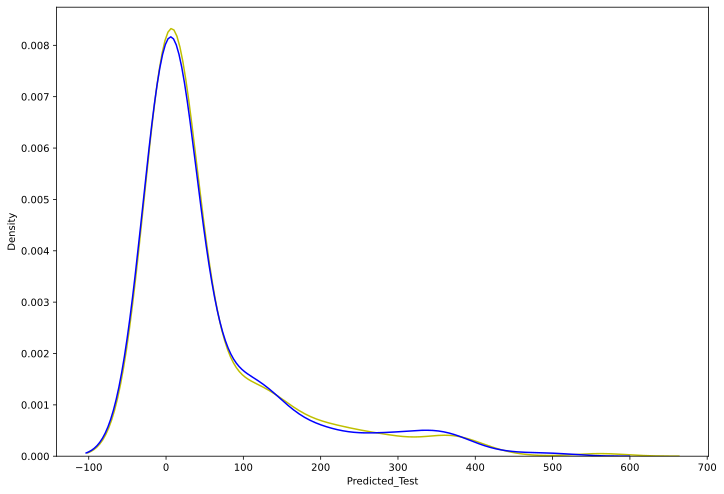

In [74]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(df_test[['T2LM']], hist = False, color="y", label = "Actual")

sns.distplot(df_test['Predicted_Test'], hist = False, color="b", label = "T2LM Prediced Values", ax=ax1)

<AxesSubplot:xlabel='Predicted_Train', ylabel='Density'>

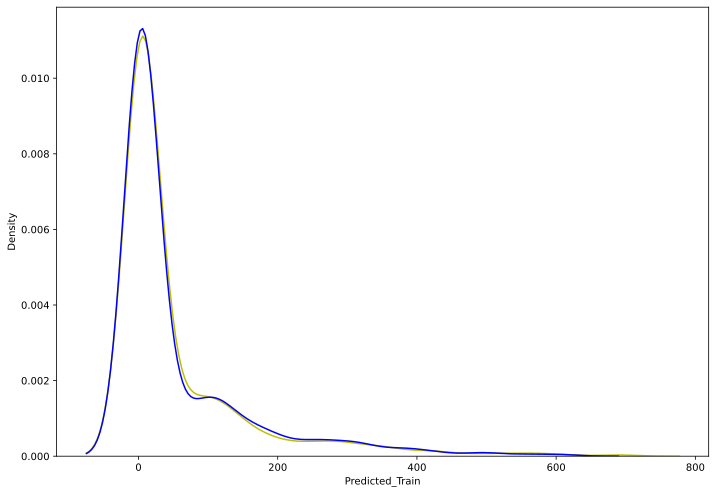

In [75]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(df_train[['T2LM']], hist=False, color="y", label= "Actual")

sns.distplot(df_train['Predicted_Train'], hist=False, color="b", label="T2LM Trained Values", ax=ax1)

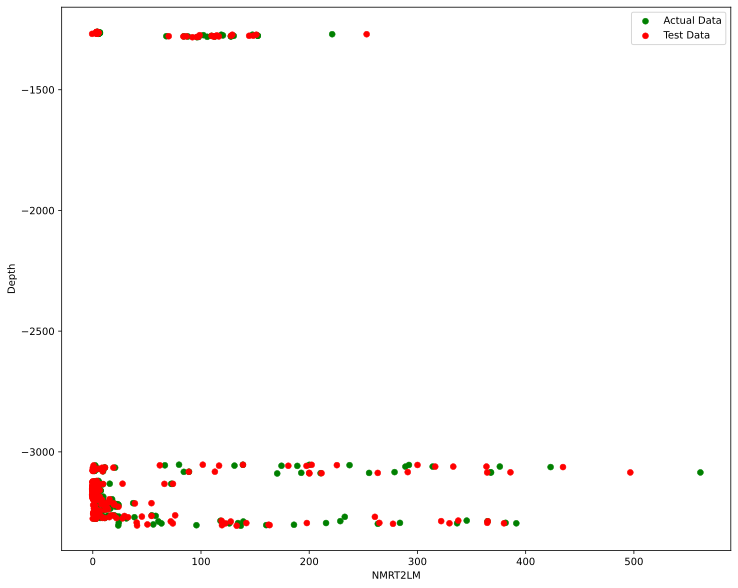

In [76]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(df_test['T2LM'], -df_test.index, color = "green", linewidth = 0.5, label = 'Actual Data')
ax.scatter(df_test['Predicted_Test'], -df_test.index, color = "red", linewidth = 0.5, label = 'Test Data')
ax.set_xlabel('NMRT2LM')
ax.set_ylabel('Depth')
plt.show
plt.legend()

In [129]:
import sklearn
import numpy as np

class SuperSklearn(sklearn.base.BaseEstimator):
    def __init__(self, learners, K=9, loss='L2', optimization_method='slsqp', stop_criteria=0.00001):
        self.K = K
        self.loss = loss
        self.optimization_method = optimization_method
        self.learners = learners # Dictionary of learner name and the corresponding object
        self.n_learners = len(learners.keys())


    def fit(self, X, y):
        n = len(y) # Num data points
        kf = sklearn.model_selection.KFold(n_splits=self.K)
        y_pred = np.empty(shape=(n, self.n_learners))
        # print(y_pred.shape)

        # Iterate throught each split and store the predicted values for each leaner
        for train_index, test_index in kf.split(X):
            # print("TRAIN:", len(train_index), "TEST:", len(test_index))
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            # Iterator through each learner
            for id, value in self.learners.items():
                _, model_object = value
                model = sklearn.clone(model_object)
                model.fit(X_train, y_train)

                if self.loss == 'L2':
                    pred = model.predict(X_test)
                    y_pred[test_index, id] = pred
        
        models = [value[1] for value in self.learners.values()]
        self.trained_model = sklearn.clone(models)
        for model in self.trained_model:
            model.fit(X, y)

        # 1: First Optimizer : Sequential Least SQuares Programming
        if self.optimization_method == 'slsqp':
            # print("Optimizing coefficients using slsqp")
            from scipy.optimize import fmin_slsqp
            def objective(x):
                """Objective function"""
                if self.loss == 'L2':
                    comb = np.dot(y_pred, x)
                    error = np.mean((y - comb)**2)
                return error
            
            def constr(x):
                return np.array([ np.sum(x)-1 ])

            # 1-D ndarray of float; Initial guess for the independent variable(s).
            x0 = np.array([1./self.n_learners] * self.n_learners)
            
            # list; A list of tuples specifying the lower and upper bound for each independent variable [(xl0, xu0),(xl1, xu1),...]
            bounds = [(0,1)] * self.n_learners
            
            # Running the optimizer
            out, fx, its, imode, smode = fmin_slsqp(objective, x0, f_eqcons = constr, bounds = bounds, disp = 0, full_output = 1)
            
            weights = np.array(out)

            # Rounding offf small values to 0
            weights[weights < np.sqrt(np.finfo(np.float64).eps)] = 0

            # Normalized the coefficents withing the range
            weights = weights/np.sum(weights)
            # print(weights)
            self.weights = weights
            if imode != 0:
                raise "Error while calculating coefficients using SLSQP"

        

        self.error_cv = {}
        for id, value in self.learners.items():
            model_name, model_object = value
            
            if self.loss == 'L2':
                error = np.mean((y - y_pred[:,id])**2)
                self.error_cv[model_name] = error 

        if self.loss == 'L2':
            comb = np.dot(y_pred, weights)
            error = np.mean((y - comb)**2)
            self.error_cv['stacked_learner'] = error

    def predict(self , X):
        num_feature = X.shape[0]
        y_pred_mat = np.empty((num_feature, self.n_learners))
        for idx, model in enumerate(self.trained_model):
            if self.loss == 'L2':
                pred = model.predict(X)

            y_pred_mat[:, idx] = pred
        
        if self.loss == 'L2':
            y_pred = np.dot(y_pred_mat, self.weights)

        return y_pred

    @property
    def error(self):
        return self.error_cv['stacked_learner']

    @property
    def coefficents(self):
        return self.weights

In [135]:
if __name__ == "__main__":
    from sklearn import datasets, linear_model, neighbors
    
    
    # All the learners
    Super_leaners = {
        0: ('AdaBoost', AdaBoostRegressor(learning_rate = 0.16605753904636156, n_estimators = 24)),
        1: ('Decision Tree', DecisionTreeRegressor()),
        2: ('Bagging', BaggingRegressor(n_estimators = 67, n_jobs = 50)),
        3: ('Random Forest', RandomForestRegressor()),
        4: ('LightBoost', LGBMRegressor()),
        5: ('Extra Trees', ExtraTreesRegressor(max_depth = 1021, n_estimators = 1054, n_jobs = 1444)),
        6: ('XGBoost', XGBRegressor()),
        7: ('CatBoost', CatBoostRegressor())
    }
    
    Deep_Ensemble_Super_Learner = SuperSklearn(Super_leaners)
    Deep_Ensemble_Super_Learner.fit(X, y)
    y_pred = Deep_Ensemble_Super_Learner.predict(X)

    print(Deep_Ensemble_Super_Learner.error)

Learning rate set to 0.042866
0:	learn: 101.9119579	total: 1.15ms	remaining: 1.15s
1:	learn: 99.1918946	total: 2.1ms	remaining: 1.05s
2:	learn: 96.2688568	total: 3.02ms	remaining: 1s
3:	learn: 93.5839217	total: 3.93ms	remaining: 978ms
4:	learn: 90.9695988	total: 4.85ms	remaining: 966ms
5:	learn: 88.4972480	total: 5.8ms	remaining: 961ms
6:	learn: 86.2551602	total: 6.72ms	remaining: 953ms
7:	learn: 84.0762153	total: 7.64ms	remaining: 948ms
8:	learn: 82.1142993	total: 8.59ms	remaining: 946ms
9:	learn: 80.1822936	total: 9.54ms	remaining: 944ms
10:	learn: 78.3024557	total: 10.5ms	remaining: 941ms
11:	learn: 76.6734000	total: 11.4ms	remaining: 936ms
12:	learn: 74.9659297	total: 12.3ms	remaining: 937ms
13:	learn: 73.2939453	total: 13.3ms	remaining: 933ms
14:	learn: 71.7609651	total: 14.2ms	remaining: 932ms
15:	learn: 70.3078740	total: 15.1ms	remaining: 929ms
16:	learn: 68.9510814	total: 16ms	remaining: 927ms
17:	learn: 67.6858581	total: 16.9ms	remaining: 924ms
18:	learn: 66.3749131	total: 17.

181:	learn: 29.2967323	total: 170ms	remaining: 764ms
182:	learn: 29.2686006	total: 171ms	remaining: 764ms
183:	learn: 29.1735910	total: 172ms	remaining: 763ms
184:	learn: 29.1253087	total: 173ms	remaining: 762ms
185:	learn: 29.0724951	total: 174ms	remaining: 761ms
186:	learn: 28.9702259	total: 175ms	remaining: 760ms
187:	learn: 28.9008607	total: 176ms	remaining: 759ms
188:	learn: 28.7442280	total: 177ms	remaining: 758ms
189:	learn: 28.6376842	total: 178ms	remaining: 758ms
190:	learn: 28.6082888	total: 179ms	remaining: 757ms
191:	learn: 28.5227739	total: 180ms	remaining: 755ms
192:	learn: 28.4076030	total: 180ms	remaining: 754ms
193:	learn: 28.3105390	total: 181ms	remaining: 753ms
194:	learn: 28.2357563	total: 182ms	remaining: 752ms
195:	learn: 28.2096793	total: 183ms	remaining: 751ms
196:	learn: 28.0839345	total: 184ms	remaining: 750ms
197:	learn: 27.9880207	total: 185ms	remaining: 749ms
198:	learn: 27.8742953	total: 186ms	remaining: 748ms
199:	learn: 27.8472953	total: 187ms	remaining:

358:	learn: 19.4907761	total: 349ms	remaining: 623ms
359:	learn: 19.4637027	total: 350ms	remaining: 623ms
360:	learn: 19.4465008	total: 351ms	remaining: 622ms
361:	learn: 19.4298473	total: 352ms	remaining: 621ms
362:	learn: 19.3814964	total: 353ms	remaining: 620ms
363:	learn: 19.3702489	total: 354ms	remaining: 619ms
364:	learn: 19.3457510	total: 355ms	remaining: 618ms
365:	learn: 19.3302593	total: 356ms	remaining: 617ms
366:	learn: 19.2637256	total: 357ms	remaining: 616ms
367:	learn: 19.2341122	total: 358ms	remaining: 615ms
368:	learn: 19.2086856	total: 359ms	remaining: 614ms
369:	learn: 19.1804883	total: 360ms	remaining: 613ms
370:	learn: 19.1549254	total: 361ms	remaining: 612ms
371:	learn: 19.1302156	total: 362ms	remaining: 611ms
372:	learn: 19.1153880	total: 363ms	remaining: 610ms
373:	learn: 19.0720049	total: 364ms	remaining: 610ms
374:	learn: 19.0470094	total: 365ms	remaining: 608ms
375:	learn: 19.0232137	total: 366ms	remaining: 608ms
376:	learn: 18.9746670	total: 367ms	remaining:

540:	learn: 14.8665748	total: 535ms	remaining: 454ms
541:	learn: 14.8449127	total: 536ms	remaining: 453ms
542:	learn: 14.8267321	total: 538ms	remaining: 452ms
543:	learn: 14.7985054	total: 539ms	remaining: 451ms
544:	learn: 14.7656535	total: 540ms	remaining: 450ms
545:	learn: 14.7417441	total: 540ms	remaining: 449ms
546:	learn: 14.7149823	total: 541ms	remaining: 448ms
547:	learn: 14.6911424	total: 542ms	remaining: 447ms
548:	learn: 14.6789168	total: 543ms	remaining: 446ms
549:	learn: 14.6600799	total: 544ms	remaining: 445ms
550:	learn: 14.6370708	total: 545ms	remaining: 444ms
551:	learn: 14.6117687	total: 546ms	remaining: 443ms
552:	learn: 14.5901780	total: 547ms	remaining: 442ms
553:	learn: 14.5397339	total: 548ms	remaining: 441ms
554:	learn: 14.5234365	total: 549ms	remaining: 440ms
555:	learn: 14.5119524	total: 550ms	remaining: 439ms
556:	learn: 14.4967661	total: 551ms	remaining: 438ms
557:	learn: 14.4921427	total: 552ms	remaining: 437ms
558:	learn: 14.4700336	total: 553ms	remaining:

713:	learn: 11.7255451	total: 723ms	remaining: 290ms
714:	learn: 11.7096338	total: 724ms	remaining: 289ms
715:	learn: 11.6939658	total: 725ms	remaining: 288ms
716:	learn: 11.6775260	total: 726ms	remaining: 287ms
717:	learn: 11.6624492	total: 727ms	remaining: 286ms
718:	learn: 11.6279922	total: 728ms	remaining: 285ms
719:	learn: 11.6051859	total: 729ms	remaining: 284ms
720:	learn: 11.5947230	total: 730ms	remaining: 283ms
721:	learn: 11.5729905	total: 731ms	remaining: 282ms
722:	learn: 11.5603447	total: 732ms	remaining: 281ms
723:	learn: 11.5563345	total: 733ms	remaining: 279ms
724:	learn: 11.5493221	total: 734ms	remaining: 278ms
725:	learn: 11.5453218	total: 735ms	remaining: 277ms
726:	learn: 11.5422445	total: 736ms	remaining: 276ms
727:	learn: 11.5299979	total: 737ms	remaining: 275ms
728:	learn: 11.5276915	total: 738ms	remaining: 274ms
729:	learn: 11.5124332	total: 739ms	remaining: 273ms
730:	learn: 11.5043868	total: 740ms	remaining: 272ms
731:	learn: 11.4867467	total: 741ms	remaining:

890:	learn: 9.6193252	total: 909ms	remaining: 111ms
891:	learn: 9.6173596	total: 910ms	remaining: 110ms
892:	learn: 9.6076682	total: 911ms	remaining: 109ms
893:	learn: 9.5962630	total: 912ms	remaining: 108ms
894:	learn: 9.5891366	total: 913ms	remaining: 107ms
895:	learn: 9.5840304	total: 914ms	remaining: 106ms
896:	learn: 9.5674661	total: 915ms	remaining: 105ms
897:	learn: 9.5603226	total: 916ms	remaining: 104ms
898:	learn: 9.5456245	total: 917ms	remaining: 103ms
899:	learn: 9.5351017	total: 918ms	remaining: 102ms
900:	learn: 9.5251914	total: 919ms	remaining: 101ms
901:	learn: 9.5156211	total: 921ms	remaining: 100ms
902:	learn: 9.5136596	total: 922ms	remaining: 99ms
903:	learn: 9.5078174	total: 923ms	remaining: 98ms
904:	learn: 9.4956350	total: 923ms	remaining: 96.9ms
905:	learn: 9.4884740	total: 925ms	remaining: 95.9ms
906:	learn: 9.4809723	total: 926ms	remaining: 94.9ms
907:	learn: 9.4667673	total: 927ms	remaining: 93.9ms
908:	learn: 9.4570867	total: 928ms	remaining: 92.9ms
909:	lear

181:	learn: 30.8427963	total: 182ms	remaining: 820ms
182:	learn: 30.7758338	total: 185ms	remaining: 825ms
183:	learn: 30.7090579	total: 186ms	remaining: 824ms
184:	learn: 30.6700009	total: 187ms	remaining: 824ms
185:	learn: 30.5651898	total: 188ms	remaining: 823ms
186:	learn: 30.5343356	total: 189ms	remaining: 822ms
187:	learn: 30.4242984	total: 190ms	remaining: 821ms
188:	learn: 30.3790455	total: 191ms	remaining: 820ms
189:	learn: 30.2730703	total: 192ms	remaining: 819ms
190:	learn: 30.2023549	total: 193ms	remaining: 818ms
191:	learn: 30.0882648	total: 194ms	remaining: 817ms
192:	learn: 30.0475604	total: 195ms	remaining: 815ms
193:	learn: 29.9978819	total: 196ms	remaining: 814ms
194:	learn: 29.8726412	total: 197ms	remaining: 814ms
195:	learn: 29.7483369	total: 198ms	remaining: 812ms
196:	learn: 29.6565107	total: 199ms	remaining: 812ms
197:	learn: 29.5611163	total: 200ms	remaining: 811ms
198:	learn: 29.4101117	total: 201ms	remaining: 810ms
199:	learn: 29.3904898	total: 202ms	remaining:

366:	learn: 20.7769352	total: 371ms	remaining: 639ms
367:	learn: 20.7240660	total: 372ms	remaining: 639ms
368:	learn: 20.6983739	total: 373ms	remaining: 637ms
369:	learn: 20.6357322	total: 374ms	remaining: 636ms
370:	learn: 20.5898411	total: 375ms	remaining: 635ms
371:	learn: 20.5675964	total: 376ms	remaining: 635ms
372:	learn: 20.5049511	total: 377ms	remaining: 634ms
373:	learn: 20.4612317	total: 378ms	remaining: 633ms
374:	learn: 20.4191180	total: 379ms	remaining: 632ms
375:	learn: 20.3930708	total: 380ms	remaining: 631ms
376:	learn: 20.3506016	total: 381ms	remaining: 630ms
377:	learn: 20.3139343	total: 382ms	remaining: 629ms
378:	learn: 20.2952508	total: 383ms	remaining: 628ms
379:	learn: 20.2357657	total: 384ms	remaining: 627ms
380:	learn: 20.1921881	total: 385ms	remaining: 626ms
381:	learn: 20.1752470	total: 386ms	remaining: 625ms
382:	learn: 20.1356043	total: 387ms	remaining: 624ms
383:	learn: 20.0869272	total: 388ms	remaining: 623ms
384:	learn: 20.0658758	total: 389ms	remaining:

550:	learn: 15.3492207	total: 557ms	remaining: 454ms
551:	learn: 15.3414642	total: 558ms	remaining: 453ms
552:	learn: 15.3339057	total: 559ms	remaining: 452ms
553:	learn: 15.3165854	total: 560ms	remaining: 451ms
554:	learn: 15.2911623	total: 561ms	remaining: 450ms
555:	learn: 15.2720749	total: 562ms	remaining: 449ms
556:	learn: 15.2645502	total: 563ms	remaining: 448ms
557:	learn: 15.2313623	total: 564ms	remaining: 447ms
558:	learn: 15.2054393	total: 565ms	remaining: 446ms
559:	learn: 15.1749962	total: 566ms	remaining: 445ms
560:	learn: 15.1573345	total: 567ms	remaining: 444ms
561:	learn: 15.1500151	total: 568ms	remaining: 442ms
562:	learn: 15.1338476	total: 569ms	remaining: 441ms
563:	learn: 15.1111275	total: 570ms	remaining: 440ms
564:	learn: 15.0899489	total: 571ms	remaining: 439ms
565:	learn: 15.0827482	total: 572ms	remaining: 438ms
566:	learn: 15.0677407	total: 573ms	remaining: 437ms
567:	learn: 15.0607188	total: 574ms	remaining: 436ms
568:	learn: 15.0265161	total: 575ms	remaining:

713:	learn: 12.5301975	total: 738ms	remaining: 296ms
714:	learn: 12.5233476	total: 740ms	remaining: 295ms
715:	learn: 12.5051816	total: 742ms	remaining: 294ms
716:	learn: 12.5032895	total: 744ms	remaining: 294ms
717:	learn: 12.4949854	total: 746ms	remaining: 293ms
718:	learn: 12.4641379	total: 748ms	remaining: 292ms
719:	learn: 12.4520757	total: 750ms	remaining: 292ms
720:	learn: 12.4387533	total: 752ms	remaining: 291ms
721:	learn: 12.4341415	total: 754ms	remaining: 290ms
722:	learn: 12.4315331	total: 756ms	remaining: 290ms
723:	learn: 12.4153373	total: 758ms	remaining: 289ms
724:	learn: 12.3982863	total: 760ms	remaining: 288ms
725:	learn: 12.3903052	total: 761ms	remaining: 287ms
726:	learn: 12.3842178	total: 762ms	remaining: 286ms
727:	learn: 12.3458518	total: 763ms	remaining: 285ms
728:	learn: 12.3336726	total: 764ms	remaining: 284ms
729:	learn: 12.3257340	total: 766ms	remaining: 283ms
730:	learn: 12.3138489	total: 767ms	remaining: 282ms
731:	learn: 12.2975339	total: 768ms	remaining:

876:	learn: 10.5281722	total: 920ms	remaining: 129ms
877:	learn: 10.5111250	total: 924ms	remaining: 128ms
878:	learn: 10.5078694	total: 925ms	remaining: 127ms
879:	learn: 10.5048018	total: 926ms	remaining: 126ms
880:	learn: 10.4859303	total: 927ms	remaining: 125ms
881:	learn: 10.4754349	total: 928ms	remaining: 124ms
882:	learn: 10.4637771	total: 929ms	remaining: 123ms
883:	learn: 10.4520888	total: 930ms	remaining: 122ms
884:	learn: 10.4485882	total: 932ms	remaining: 121ms
885:	learn: 10.4370586	total: 933ms	remaining: 120ms
886:	learn: 10.4307396	total: 934ms	remaining: 119ms
887:	learn: 10.4220025	total: 935ms	remaining: 118ms
888:	learn: 10.4153592	total: 936ms	remaining: 117ms
889:	learn: 10.4077473	total: 937ms	remaining: 116ms
890:	learn: 10.3954400	total: 939ms	remaining: 115ms
891:	learn: 10.3885859	total: 940ms	remaining: 114ms
892:	learn: 10.3766415	total: 941ms	remaining: 113ms
893:	learn: 10.3672444	total: 942ms	remaining: 112ms
894:	learn: 10.3563776	total: 943ms	remaining:

180:	learn: 30.7993657	total: 185ms	remaining: 838ms
181:	learn: 30.7475140	total: 186ms	remaining: 838ms
182:	learn: 30.6724204	total: 187ms	remaining: 837ms
183:	learn: 30.6213453	total: 189ms	remaining: 837ms
184:	learn: 30.5711109	total: 190ms	remaining: 837ms
185:	learn: 30.4854452	total: 191ms	remaining: 835ms
186:	learn: 30.3411365	total: 192ms	remaining: 834ms
187:	learn: 30.3174554	total: 193ms	remaining: 833ms
188:	learn: 30.2582388	total: 194ms	remaining: 832ms
189:	learn: 30.2216868	total: 195ms	remaining: 831ms
190:	learn: 30.1783165	total: 196ms	remaining: 830ms
191:	learn: 30.1354156	total: 197ms	remaining: 828ms
192:	learn: 30.0132904	total: 198ms	remaining: 827ms
193:	learn: 29.9741127	total: 199ms	remaining: 826ms
194:	learn: 29.8766279	total: 200ms	remaining: 825ms
195:	learn: 29.8230694	total: 201ms	remaining: 824ms
196:	learn: 29.7809255	total: 202ms	remaining: 823ms
197:	learn: 29.6788141	total: 203ms	remaining: 822ms
198:	learn: 29.5818541	total: 204ms	remaining:

363:	learn: 21.3699613	total: 371ms	remaining: 648ms
364:	learn: 21.3209094	total: 373ms	remaining: 649ms
365:	learn: 21.3100219	total: 375ms	remaining: 650ms
366:	learn: 21.2626257	total: 377ms	remaining: 650ms
367:	learn: 21.2225792	total: 379ms	remaining: 651ms
368:	learn: 21.1804883	total: 381ms	remaining: 651ms
369:	learn: 21.1395429	total: 383ms	remaining: 652ms
370:	learn: 21.1152950	total: 384ms	remaining: 651ms
371:	learn: 21.0893359	total: 385ms	remaining: 650ms
372:	learn: 21.0719952	total: 386ms	remaining: 648ms
373:	learn: 21.0301951	total: 387ms	remaining: 647ms
374:	learn: 20.9858692	total: 388ms	remaining: 646ms
375:	learn: 20.9544528	total: 388ms	remaining: 645ms
376:	learn: 20.9205728	total: 389ms	remaining: 644ms
377:	learn: 20.8791723	total: 390ms	remaining: 642ms
378:	learn: 20.8682144	total: 391ms	remaining: 641ms
379:	learn: 20.8383191	total: 392ms	remaining: 640ms
380:	learn: 20.8251971	total: 393ms	remaining: 639ms
381:	learn: 20.7881748	total: 394ms	remaining:

535:	learn: 16.7171303	total: 541ms	remaining: 468ms
536:	learn: 16.7063238	total: 542ms	remaining: 467ms
537:	learn: 16.6680392	total: 543ms	remaining: 466ms
538:	learn: 16.6500632	total: 544ms	remaining: 465ms
539:	learn: 16.6266365	total: 545ms	remaining: 464ms
540:	learn: 16.6092264	total: 547ms	remaining: 464ms
541:	learn: 16.6008489	total: 549ms	remaining: 464ms
542:	learn: 16.5645173	total: 551ms	remaining: 464ms
543:	learn: 16.5437891	total: 552ms	remaining: 463ms
544:	learn: 16.5212829	total: 555ms	remaining: 463ms
545:	learn: 16.5078946	total: 557ms	remaining: 463ms
546:	learn: 16.4612220	total: 558ms	remaining: 462ms
547:	learn: 16.4396844	total: 560ms	remaining: 462ms
548:	learn: 16.4049893	total: 562ms	remaining: 462ms
549:	learn: 16.3812115	total: 563ms	remaining: 461ms
550:	learn: 16.3656598	total: 564ms	remaining: 460ms
551:	learn: 16.3514950	total: 565ms	remaining: 458ms
552:	learn: 16.3185714	total: 566ms	remaining: 457ms
553:	learn: 16.3056699	total: 567ms	remaining:

714:	learn: 13.5774091	total: 713ms	remaining: 284ms
715:	learn: 13.5628326	total: 714ms	remaining: 283ms
716:	learn: 13.5492691	total: 715ms	remaining: 282ms
717:	learn: 13.5411105	total: 716ms	remaining: 281ms
718:	learn: 13.5319582	total: 717ms	remaining: 280ms
719:	learn: 13.5222239	total: 718ms	remaining: 279ms
720:	learn: 13.4924860	total: 719ms	remaining: 278ms
721:	learn: 13.4830131	total: 720ms	remaining: 277ms
722:	learn: 13.4670260	total: 721ms	remaining: 276ms
723:	learn: 13.4560872	total: 722ms	remaining: 275ms
724:	learn: 13.4432682	total: 723ms	remaining: 274ms
725:	learn: 13.4413885	total: 724ms	remaining: 273ms
726:	learn: 13.4310738	total: 725ms	remaining: 272ms
727:	learn: 13.4219630	total: 725ms	remaining: 271ms
728:	learn: 13.4083743	total: 726ms	remaining: 270ms
729:	learn: 13.3966448	total: 727ms	remaining: 269ms
730:	learn: 13.3712782	total: 728ms	remaining: 268ms
731:	learn: 13.3620313	total: 729ms	remaining: 267ms
732:	learn: 13.3327434	total: 730ms	remaining:

899:	learn: 11.2552477	total: 884ms	remaining: 98.2ms
900:	learn: 11.2474016	total: 885ms	remaining: 97.2ms
901:	learn: 11.2381903	total: 886ms	remaining: 96.2ms
902:	learn: 11.2316674	total: 887ms	remaining: 95.3ms
903:	learn: 11.2218420	total: 888ms	remaining: 94.3ms
904:	learn: 11.2134990	total: 889ms	remaining: 93.3ms
905:	learn: 11.2119565	total: 890ms	remaining: 92.3ms
906:	learn: 11.2044342	total: 891ms	remaining: 91.3ms
907:	learn: 11.1957126	total: 891ms	remaining: 90.3ms
908:	learn: 11.1923252	total: 892ms	remaining: 89.3ms
909:	learn: 11.1765196	total: 893ms	remaining: 88.3ms
910:	learn: 11.1696392	total: 894ms	remaining: 87.4ms
911:	learn: 11.1663526	total: 895ms	remaining: 86.4ms
912:	learn: 11.1606148	total: 896ms	remaining: 85.4ms
913:	learn: 11.1277050	total: 897ms	remaining: 84.4ms
914:	learn: 11.1198337	total: 898ms	remaining: 83.4ms
915:	learn: 11.0885681	total: 899ms	remaining: 82.4ms
916:	learn: 11.0588940	total: 900ms	remaining: 81.5ms
917:	learn: 11.0491745	total

184:	learn: 29.8943464	total: 171ms	remaining: 752ms
185:	learn: 29.8446443	total: 172ms	remaining: 751ms
186:	learn: 29.7225249	total: 173ms	remaining: 750ms
187:	learn: 29.6935582	total: 173ms	remaining: 749ms
188:	learn: 29.6413750	total: 174ms	remaining: 748ms
189:	learn: 29.5093863	total: 175ms	remaining: 747ms
190:	learn: 29.4789440	total: 176ms	remaining: 746ms
191:	learn: 29.4050424	total: 177ms	remaining: 745ms
192:	learn: 29.3156146	total: 178ms	remaining: 744ms
193:	learn: 29.2532244	total: 179ms	remaining: 743ms
194:	learn: 29.2024386	total: 180ms	remaining: 742ms
195:	learn: 29.1675505	total: 181ms	remaining: 741ms
196:	learn: 29.0764805	total: 182ms	remaining: 740ms
197:	learn: 29.0105607	total: 183ms	remaining: 739ms
198:	learn: 28.8890906	total: 183ms	remaining: 738ms
199:	learn: 28.8036377	total: 184ms	remaining: 737ms
200:	learn: 28.7400393	total: 185ms	remaining: 737ms
201:	learn: 28.7076068	total: 186ms	remaining: 735ms
202:	learn: 28.6442860	total: 187ms	remaining:

352:	learn: 20.7502336	total: 346ms	remaining: 634ms
353:	learn: 20.7340595	total: 347ms	remaining: 633ms
354:	learn: 20.7019477	total: 348ms	remaining: 632ms
355:	learn: 20.6709379	total: 349ms	remaining: 631ms
356:	learn: 20.6134954	total: 350ms	remaining: 630ms
357:	learn: 20.5582598	total: 352ms	remaining: 632ms
358:	learn: 20.5389811	total: 355ms	remaining: 634ms
359:	learn: 20.5236744	total: 357ms	remaining: 635ms
360:	learn: 20.4987362	total: 359ms	remaining: 636ms
361:	learn: 20.4745685	total: 361ms	remaining: 636ms
362:	learn: 20.4312631	total: 362ms	remaining: 635ms
363:	learn: 20.3836220	total: 364ms	remaining: 636ms
364:	learn: 20.3605329	total: 365ms	remaining: 635ms
365:	learn: 20.3343185	total: 366ms	remaining: 634ms
366:	learn: 20.3184784	total: 367ms	remaining: 633ms
367:	learn: 20.2910142	total: 368ms	remaining: 631ms
368:	learn: 20.2685959	total: 369ms	remaining: 630ms
369:	learn: 20.2468595	total: 370ms	remaining: 629ms
370:	learn: 20.2328680	total: 371ms	remaining:

526:	learn: 15.9963696	total: 519ms	remaining: 466ms
527:	learn: 15.9609830	total: 520ms	remaining: 465ms
528:	learn: 15.9377032	total: 521ms	remaining: 464ms
529:	learn: 15.9051295	total: 522ms	remaining: 463ms
530:	learn: 15.8882165	total: 523ms	remaining: 462ms
531:	learn: 15.8633399	total: 524ms	remaining: 461ms
532:	learn: 15.8391311	total: 525ms	remaining: 460ms
533:	learn: 15.8155717	total: 526ms	remaining: 459ms
534:	learn: 15.7934191	total: 527ms	remaining: 458ms
535:	learn: 15.7463983	total: 528ms	remaining: 457ms
536:	learn: 15.7040174	total: 529ms	remaining: 456ms
537:	learn: 15.6893996	total: 529ms	remaining: 455ms
538:	learn: 15.6753690	total: 530ms	remaining: 454ms
539:	learn: 15.6565125	total: 531ms	remaining: 453ms
540:	learn: 15.6450537	total: 532ms	remaining: 452ms
541:	learn: 15.6271136	total: 533ms	remaining: 451ms
542:	learn: 15.6104247	total: 534ms	remaining: 450ms
543:	learn: 15.5985311	total: 535ms	remaining: 448ms
544:	learn: 15.5813050	total: 536ms	remaining:

683:	learn: 12.9153287	total: 690ms	remaining: 319ms
684:	learn: 12.8974825	total: 693ms	remaining: 319ms
685:	learn: 12.8843647	total: 694ms	remaining: 318ms
686:	learn: 12.8696904	total: 695ms	remaining: 316ms
687:	learn: 12.8349069	total: 696ms	remaining: 315ms
688:	learn: 12.8282243	total: 697ms	remaining: 314ms
689:	learn: 12.8192606	total: 698ms	remaining: 313ms
690:	learn: 12.7998677	total: 699ms	remaining: 312ms
691:	learn: 12.7963587	total: 699ms	remaining: 311ms
692:	learn: 12.7755701	total: 700ms	remaining: 310ms
693:	learn: 12.7541441	total: 701ms	remaining: 309ms
694:	learn: 12.7461417	total: 702ms	remaining: 308ms
695:	learn: 12.7063509	total: 703ms	remaining: 307ms
696:	learn: 12.6915643	total: 704ms	remaining: 306ms
697:	learn: 12.6742313	total: 705ms	remaining: 305ms
698:	learn: 12.6418016	total: 706ms	remaining: 304ms
699:	learn: 12.6235616	total: 707ms	remaining: 303ms
700:	learn: 12.5968151	total: 708ms	remaining: 302ms
701:	learn: 12.5773926	total: 709ms	remaining:

862:	learn: 10.3851020	total: 870ms	remaining: 138ms
863:	learn: 10.3812969	total: 871ms	remaining: 137ms
864:	learn: 10.3798684	total: 872ms	remaining: 136ms
865:	learn: 10.3669586	total: 873ms	remaining: 135ms
866:	learn: 10.3632398	total: 874ms	remaining: 134ms
867:	learn: 10.3487929	total: 875ms	remaining: 133ms
868:	learn: 10.3357521	total: 876ms	remaining: 132ms
869:	learn: 10.3311039	total: 877ms	remaining: 131ms
870:	learn: 10.3153637	total: 878ms	remaining: 130ms
871:	learn: 10.3012312	total: 879ms	remaining: 129ms
872:	learn: 10.2907811	total: 880ms	remaining: 128ms
873:	learn: 10.2747430	total: 881ms	remaining: 127ms
874:	learn: 10.2705813	total: 882ms	remaining: 126ms
875:	learn: 10.2606077	total: 883ms	remaining: 125ms
876:	learn: 10.2472484	total: 884ms	remaining: 124ms
877:	learn: 10.2177717	total: 885ms	remaining: 123ms
878:	learn: 10.2018831	total: 886ms	remaining: 122ms
879:	learn: 10.1973042	total: 887ms	remaining: 121ms
880:	learn: 10.1772389	total: 888ms	remaining:

159:	learn: 32.4630616	total: 187ms	remaining: 983ms
160:	learn: 32.4017949	total: 188ms	remaining: 982ms
161:	learn: 32.3702841	total: 189ms	remaining: 979ms
162:	learn: 32.3245782	total: 190ms	remaining: 978ms
163:	learn: 32.2400203	total: 191ms	remaining: 975ms
164:	learn: 32.1528212	total: 192ms	remaining: 973ms
165:	learn: 31.9906056	total: 193ms	remaining: 971ms
166:	learn: 31.9302567	total: 194ms	remaining: 969ms
167:	learn: 31.8301815	total: 195ms	remaining: 967ms
168:	learn: 31.7500114	total: 196ms	remaining: 965ms
169:	learn: 31.6316838	total: 197ms	remaining: 963ms
170:	learn: 31.5435499	total: 198ms	remaining: 961ms
171:	learn: 31.4520262	total: 199ms	remaining: 959ms
172:	learn: 31.3894108	total: 200ms	remaining: 957ms
173:	learn: 31.3069272	total: 201ms	remaining: 954ms
174:	learn: 31.1974295	total: 202ms	remaining: 954ms
175:	learn: 31.1635170	total: 203ms	remaining: 952ms
176:	learn: 31.0819788	total: 204ms	remaining: 950ms
177:	learn: 30.9850895	total: 205ms	remaining:

344:	learn: 22.0850789	total: 375ms	remaining: 712ms
345:	learn: 22.0696725	total: 376ms	remaining: 711ms
346:	learn: 22.0106887	total: 377ms	remaining: 710ms
347:	learn: 21.9698507	total: 378ms	remaining: 708ms
348:	learn: 21.9496021	total: 380ms	remaining: 708ms
349:	learn: 21.9369663	total: 382ms	remaining: 709ms
350:	learn: 21.9233554	total: 384ms	remaining: 709ms
351:	learn: 21.9103144	total: 385ms	remaining: 709ms
352:	learn: 21.8971658	total: 387ms	remaining: 710ms
353:	learn: 21.8846507	total: 389ms	remaining: 710ms
354:	learn: 21.8393033	total: 390ms	remaining: 708ms
355:	learn: 21.7962159	total: 391ms	remaining: 707ms
356:	learn: 21.7831548	total: 392ms	remaining: 705ms
357:	learn: 21.7716233	total: 393ms	remaining: 704ms
358:	learn: 21.7389447	total: 393ms	remaining: 703ms
359:	learn: 21.6953905	total: 394ms	remaining: 701ms
360:	learn: 21.6375542	total: 395ms	remaining: 700ms
361:	learn: 21.6248367	total: 396ms	remaining: 698ms
362:	learn: 21.6118351	total: 397ms	remaining:

526:	learn: 17.0038175	total: 548ms	remaining: 492ms
527:	learn: 16.9966690	total: 549ms	remaining: 491ms
528:	learn: 16.9530090	total: 550ms	remaining: 490ms
529:	learn: 16.9392427	total: 551ms	remaining: 489ms
530:	learn: 16.9259634	total: 552ms	remaining: 488ms
531:	learn: 16.8728188	total: 553ms	remaining: 487ms
532:	learn: 16.8510352	total: 554ms	remaining: 486ms
533:	learn: 16.8270945	total: 555ms	remaining: 484ms
534:	learn: 16.7771255	total: 556ms	remaining: 483ms
535:	learn: 16.7533945	total: 557ms	remaining: 482ms
536:	learn: 16.7185317	total: 558ms	remaining: 481ms
537:	learn: 16.6901520	total: 559ms	remaining: 480ms
538:	learn: 16.6621344	total: 560ms	remaining: 479ms
539:	learn: 16.6430624	total: 561ms	remaining: 478ms
540:	learn: 16.6336137	total: 561ms	remaining: 476ms
541:	learn: 16.6153624	total: 563ms	remaining: 475ms
542:	learn: 16.5854570	total: 563ms	remaining: 474ms
543:	learn: 16.5622194	total: 564ms	remaining: 473ms
544:	learn: 16.5430299	total: 565ms	remaining:

711:	learn: 13.3710828	total: 718ms	remaining: 291ms
712:	learn: 13.3576632	total: 719ms	remaining: 289ms
713:	learn: 13.3323925	total: 720ms	remaining: 288ms
714:	learn: 13.3131668	total: 721ms	remaining: 287ms
715:	learn: 13.2684448	total: 722ms	remaining: 286ms
716:	learn: 13.2604890	total: 723ms	remaining: 285ms
717:	learn: 13.2377924	total: 724ms	remaining: 284ms
718:	learn: 13.2299432	total: 725ms	remaining: 283ms
719:	learn: 13.2150778	total: 726ms	remaining: 282ms
720:	learn: 13.1852103	total: 728ms	remaining: 282ms
721:	learn: 13.1629543	total: 730ms	remaining: 281ms
722:	learn: 13.1558289	total: 732ms	remaining: 280ms
723:	learn: 13.1254841	total: 734ms	remaining: 280ms
724:	learn: 13.1170589	total: 736ms	remaining: 279ms
725:	learn: 13.0845268	total: 738ms	remaining: 278ms
726:	learn: 13.0771461	total: 740ms	remaining: 278ms
727:	learn: 13.0460841	total: 742ms	remaining: 277ms
728:	learn: 13.0244708	total: 744ms	remaining: 277ms
729:	learn: 12.9947788	total: 746ms	remaining:

883:	learn: 10.7904538	total: 891ms	remaining: 117ms
884:	learn: 10.7709115	total: 892ms	remaining: 116ms
885:	learn: 10.7471040	total: 893ms	remaining: 115ms
886:	learn: 10.7446107	total: 894ms	remaining: 114ms
887:	learn: 10.7325808	total: 895ms	remaining: 113ms
888:	learn: 10.7257705	total: 896ms	remaining: 112ms
889:	learn: 10.7213266	total: 896ms	remaining: 111ms
890:	learn: 10.6999258	total: 897ms	remaining: 110ms
891:	learn: 10.6971004	total: 898ms	remaining: 109ms
892:	learn: 10.6747931	total: 899ms	remaining: 108ms
893:	learn: 10.6552253	total: 900ms	remaining: 107ms
894:	learn: 10.6508738	total: 901ms	remaining: 106ms
895:	learn: 10.6470109	total: 902ms	remaining: 105ms
896:	learn: 10.6405506	total: 903ms	remaining: 104ms
897:	learn: 10.6348113	total: 904ms	remaining: 103ms
898:	learn: 10.6114252	total: 904ms	remaining: 102ms
899:	learn: 10.5938335	total: 905ms	remaining: 101ms
900:	learn: 10.5876125	total: 906ms	remaining: 99.6ms
901:	learn: 10.5832321	total: 907ms	remaining

177:	learn: 30.5873055	total: 185ms	remaining: 855ms
178:	learn: 30.5258108	total: 186ms	remaining: 855ms
179:	learn: 30.3760977	total: 187ms	remaining: 854ms
180:	learn: 30.3083959	total: 188ms	remaining: 853ms
181:	learn: 30.2880031	total: 189ms	remaining: 852ms
182:	learn: 30.1617652	total: 190ms	remaining: 850ms
183:	learn: 30.1315271	total: 191ms	remaining: 849ms
184:	learn: 30.0756867	total: 192ms	remaining: 848ms
185:	learn: 29.9781311	total: 193ms	remaining: 846ms
186:	learn: 29.8584055	total: 194ms	remaining: 845ms
187:	learn: 29.8162916	total: 195ms	remaining: 844ms
188:	learn: 29.7441159	total: 196ms	remaining: 842ms
189:	learn: 29.6648110	total: 197ms	remaining: 841ms
190:	learn: 29.5267444	total: 198ms	remaining: 840ms
191:	learn: 29.4663085	total: 199ms	remaining: 839ms
192:	learn: 29.3461386	total: 200ms	remaining: 837ms
193:	learn: 29.2472557	total: 201ms	remaining: 836ms
194:	learn: 29.2126162	total: 202ms	remaining: 835ms
195:	learn: 29.1827702	total: 203ms	remaining:

365:	learn: 20.9724535	total: 372ms	remaining: 644ms
366:	learn: 20.9361542	total: 373ms	remaining: 643ms
367:	learn: 20.9067322	total: 374ms	remaining: 642ms
368:	learn: 20.8839748	total: 375ms	remaining: 641ms
369:	learn: 20.8595411	total: 376ms	remaining: 640ms
370:	learn: 20.8064232	total: 377ms	remaining: 639ms
371:	learn: 20.7736065	total: 378ms	remaining: 638ms
372:	learn: 20.7533668	total: 379ms	remaining: 637ms
373:	learn: 20.6856255	total: 380ms	remaining: 636ms
374:	learn: 20.6234992	total: 381ms	remaining: 635ms
375:	learn: 20.6052225	total: 382ms	remaining: 634ms
376:	learn: 20.5427194	total: 383ms	remaining: 633ms
377:	learn: 20.5195200	total: 384ms	remaining: 632ms
378:	learn: 20.4445918	total: 385ms	remaining: 630ms
379:	learn: 20.3940503	total: 386ms	remaining: 629ms
380:	learn: 20.3590259	total: 387ms	remaining: 628ms
381:	learn: 20.3413551	total: 388ms	remaining: 627ms
382:	learn: 20.3021378	total: 389ms	remaining: 626ms
383:	learn: 20.2624854	total: 390ms	remaining:

545:	learn: 16.0663241	total: 556ms	remaining: 462ms
546:	learn: 16.0174635	total: 557ms	remaining: 461ms
547:	learn: 15.9753323	total: 558ms	remaining: 460ms
548:	learn: 15.9489413	total: 559ms	remaining: 459ms
549:	learn: 15.9454509	total: 560ms	remaining: 458ms
550:	learn: 15.9348152	total: 561ms	remaining: 457ms
551:	learn: 15.8942708	total: 562ms	remaining: 456ms
552:	learn: 15.8743172	total: 563ms	remaining: 455ms
553:	learn: 15.8587149	total: 564ms	remaining: 454ms
554:	learn: 15.8288374	total: 565ms	remaining: 453ms
555:	learn: 15.8215877	total: 566ms	remaining: 452ms
556:	learn: 15.8033205	total: 567ms	remaining: 451ms
557:	learn: 15.7958475	total: 568ms	remaining: 450ms
558:	learn: 15.7800707	total: 569ms	remaining: 449ms
559:	learn: 15.7731787	total: 570ms	remaining: 448ms
560:	learn: 15.7509336	total: 571ms	remaining: 447ms
561:	learn: 15.7352835	total: 572ms	remaining: 446ms
562:	learn: 15.7279678	total: 573ms	remaining: 445ms
563:	learn: 15.6967049	total: 574ms	remaining:

733:	learn: 12.4367142	total: 744ms	remaining: 270ms
734:	learn: 12.4216862	total: 745ms	remaining: 268ms
735:	learn: 12.4172791	total: 746ms	remaining: 268ms
736:	learn: 12.4021938	total: 747ms	remaining: 267ms
737:	learn: 12.3956824	total: 748ms	remaining: 266ms
738:	learn: 12.3909305	total: 749ms	remaining: 264ms
739:	learn: 12.3862048	total: 750ms	remaining: 263ms
740:	learn: 12.3768291	total: 751ms	remaining: 262ms
741:	learn: 12.3608309	total: 752ms	remaining: 261ms
742:	learn: 12.3559437	total: 753ms	remaining: 260ms
743:	learn: 12.3496505	total: 754ms	remaining: 259ms
744:	learn: 12.3393457	total: 755ms	remaining: 258ms
745:	learn: 12.3291537	total: 756ms	remaining: 257ms
746:	learn: 12.2983713	total: 757ms	remaining: 256ms
747:	learn: 12.2844791	total: 758ms	remaining: 255ms
748:	learn: 12.2737389	total: 758ms	remaining: 254ms
749:	learn: 12.2657923	total: 759ms	remaining: 253ms
750:	learn: 12.2421826	total: 760ms	remaining: 252ms
751:	learn: 12.2268692	total: 761ms	remaining:

923:	learn: 10.3995414	total: 931ms	remaining: 76.6ms
924:	learn: 10.3984961	total: 932ms	remaining: 75.6ms
925:	learn: 10.3892017	total: 934ms	remaining: 74.6ms
926:	learn: 10.3839996	total: 934ms	remaining: 73.6ms
927:	learn: 10.3809786	total: 935ms	remaining: 72.6ms
928:	learn: 10.3731894	total: 936ms	remaining: 71.6ms
929:	learn: 10.3663245	total: 937ms	remaining: 70.6ms
930:	learn: 10.3590536	total: 938ms	remaining: 69.5ms
931:	learn: 10.3559219	total: 939ms	remaining: 68.5ms
932:	learn: 10.3429523	total: 940ms	remaining: 67.5ms
933:	learn: 10.3297780	total: 941ms	remaining: 66.5ms
934:	learn: 10.3215920	total: 942ms	remaining: 65.5ms
935:	learn: 10.3106468	total: 943ms	remaining: 64.5ms
936:	learn: 10.2979700	total: 944ms	remaining: 63.5ms
937:	learn: 10.2967062	total: 945ms	remaining: 62.5ms
938:	learn: 10.2907485	total: 946ms	remaining: 61.5ms
939:	learn: 10.2898684	total: 949ms	remaining: 60.6ms
940:	learn: 10.2890176	total: 950ms	remaining: 59.5ms
941:	learn: 10.2744568	total

190:	learn: 29.0827582	total: 186ms	remaining: 786ms
191:	learn: 29.0285443	total: 187ms	remaining: 785ms
192:	learn: 28.9806591	total: 188ms	remaining: 786ms
193:	learn: 28.8773006	total: 189ms	remaining: 784ms
194:	learn: 28.8495246	total: 190ms	remaining: 783ms
195:	learn: 28.8316824	total: 191ms	remaining: 782ms
196:	learn: 28.8183733	total: 192ms	remaining: 781ms
197:	learn: 28.7581229	total: 193ms	remaining: 780ms
198:	learn: 28.6634607	total: 194ms	remaining: 779ms
199:	learn: 28.6268333	total: 195ms	remaining: 778ms
200:	learn: 28.5369030	total: 196ms	remaining: 777ms
201:	learn: 28.5124811	total: 196ms	remaining: 776ms
202:	learn: 28.4398759	total: 197ms	remaining: 775ms
203:	learn: 28.3471778	total: 198ms	remaining: 774ms
204:	learn: 28.2747394	total: 199ms	remaining: 773ms
205:	learn: 28.1994096	total: 200ms	remaining: 771ms
206:	learn: 28.1124224	total: 201ms	remaining: 770ms
207:	learn: 28.0482100	total: 202ms	remaining: 769ms
208:	learn: 28.0117747	total: 203ms	remaining:

370:	learn: 20.3913833	total: 362ms	remaining: 613ms
371:	learn: 20.3714058	total: 363ms	remaining: 612ms
372:	learn: 20.3525563	total: 364ms	remaining: 612ms
373:	learn: 20.2929357	total: 365ms	remaining: 611ms
374:	learn: 20.2288059	total: 366ms	remaining: 610ms
375:	learn: 20.1981262	total: 367ms	remaining: 609ms
376:	learn: 20.1769685	total: 368ms	remaining: 608ms
377:	learn: 20.1573465	total: 369ms	remaining: 607ms
378:	learn: 20.1210457	total: 370ms	remaining: 606ms
379:	learn: 20.1053236	total: 371ms	remaining: 605ms
380:	learn: 20.0950105	total: 372ms	remaining: 604ms
381:	learn: 20.0365006	total: 373ms	remaining: 603ms
382:	learn: 19.9984173	total: 374ms	remaining: 602ms
383:	learn: 19.9642622	total: 375ms	remaining: 601ms
384:	learn: 19.9092093	total: 376ms	remaining: 600ms
385:	learn: 19.8940115	total: 377ms	remaining: 599ms
386:	learn: 19.8504117	total: 378ms	remaining: 598ms
387:	learn: 19.8407140	total: 379ms	remaining: 597ms
388:	learn: 19.8058162	total: 380ms	remaining:

551:	learn: 15.1595899	total: 548ms	remaining: 445ms
552:	learn: 15.1302952	total: 550ms	remaining: 444ms
553:	learn: 15.0894113	total: 551ms	remaining: 443ms
554:	learn: 15.0595053	total: 552ms	remaining: 442ms
555:	learn: 15.0494365	total: 552ms	remaining: 441ms
556:	learn: 15.0200582	total: 554ms	remaining: 440ms
557:	learn: 14.9813897	total: 555ms	remaining: 439ms
558:	learn: 14.9717066	total: 556ms	remaining: 438ms
559:	learn: 14.9481797	total: 557ms	remaining: 437ms
560:	learn: 14.9127731	total: 558ms	remaining: 436ms
561:	learn: 14.8815702	total: 559ms	remaining: 435ms
562:	learn: 14.8480531	total: 560ms	remaining: 434ms
563:	learn: 14.8421781	total: 561ms	remaining: 433ms
564:	learn: 14.8050253	total: 562ms	remaining: 433ms
565:	learn: 14.7953623	total: 563ms	remaining: 432ms
566:	learn: 14.7536431	total: 564ms	remaining: 431ms
567:	learn: 14.7421068	total: 565ms	remaining: 430ms
568:	learn: 14.7328970	total: 566ms	remaining: 429ms
569:	learn: 14.7237079	total: 567ms	remaining:

736:	learn: 11.9863774	total: 735ms	remaining: 262ms
737:	learn: 11.9791347	total: 736ms	remaining: 261ms
738:	learn: 11.9721472	total: 737ms	remaining: 260ms
739:	learn: 11.9627774	total: 738ms	remaining: 259ms
740:	learn: 11.9350672	total: 739ms	remaining: 258ms
741:	learn: 11.9272803	total: 740ms	remaining: 257ms
742:	learn: 11.9060251	total: 741ms	remaining: 256ms
743:	learn: 11.8738357	total: 742ms	remaining: 255ms
744:	learn: 11.8687556	total: 742ms	remaining: 254ms
745:	learn: 11.8363357	total: 743ms	remaining: 253ms
746:	learn: 11.8264328	total: 744ms	remaining: 252ms
747:	learn: 11.8043794	total: 745ms	remaining: 251ms
748:	learn: 11.7679123	total: 746ms	remaining: 250ms
749:	learn: 11.7514410	total: 747ms	remaining: 249ms
750:	learn: 11.7203161	total: 748ms	remaining: 248ms
751:	learn: 11.7058045	total: 749ms	remaining: 247ms
752:	learn: 11.7014676	total: 750ms	remaining: 246ms
753:	learn: 11.6916185	total: 751ms	remaining: 245ms
754:	learn: 11.6860113	total: 752ms	remaining:

925:	learn: 9.4484339	total: 923ms	remaining: 73.7ms
926:	learn: 9.4362860	total: 924ms	remaining: 72.8ms
927:	learn: 9.4344281	total: 925ms	remaining: 71.8ms
928:	learn: 9.4285237	total: 926ms	remaining: 70.8ms
929:	learn: 9.4264592	total: 927ms	remaining: 69.8ms
930:	learn: 9.4221077	total: 928ms	remaining: 68.8ms
931:	learn: 9.4179292	total: 929ms	remaining: 67.8ms
932:	learn: 9.3962309	total: 930ms	remaining: 66.8ms
933:	learn: 9.3935189	total: 931ms	remaining: 65.8ms
934:	learn: 9.3894941	total: 932ms	remaining: 64.8ms
935:	learn: 9.3848966	total: 933ms	remaining: 63.8ms
936:	learn: 9.3810778	total: 934ms	remaining: 62.8ms
937:	learn: 9.3734197	total: 935ms	remaining: 61.8ms
938:	learn: 9.3683335	total: 936ms	remaining: 60.8ms
939:	learn: 9.3636458	total: 937ms	remaining: 59.8ms
940:	learn: 9.3579096	total: 938ms	remaining: 58.8ms
941:	learn: 9.3396084	total: 939ms	remaining: 57.8ms
942:	learn: 9.3179983	total: 940ms	remaining: 56.8ms
943:	learn: 9.3088565	total: 941ms	remaining: 

183:	learn: 29.9839791	total: 188ms	remaining: 833ms
184:	learn: 29.9372170	total: 189ms	remaining: 833ms
185:	learn: 29.9000204	total: 190ms	remaining: 832ms
186:	learn: 29.7717766	total: 191ms	remaining: 830ms
187:	learn: 29.6822915	total: 192ms	remaining: 829ms
188:	learn: 29.6135106	total: 193ms	remaining: 828ms
189:	learn: 29.5183999	total: 194ms	remaining: 827ms
190:	learn: 29.4932494	total: 195ms	remaining: 826ms
191:	learn: 29.4548597	total: 196ms	remaining: 824ms
192:	learn: 29.4317926	total: 197ms	remaining: 823ms
193:	learn: 29.3343701	total: 198ms	remaining: 822ms
194:	learn: 29.3075194	total: 199ms	remaining: 821ms
195:	learn: 29.2394913	total: 200ms	remaining: 820ms
196:	learn: 29.1858282	total: 201ms	remaining: 818ms
197:	learn: 29.1534348	total: 202ms	remaining: 817ms
198:	learn: 29.0271283	total: 203ms	remaining: 816ms
199:	learn: 29.0026559	total: 204ms	remaining: 815ms
200:	learn: 28.8807660	total: 205ms	remaining: 814ms
201:	learn: 28.8403381	total: 206ms	remaining:

368:	learn: 20.2956170	total: 372ms	remaining: 636ms
369:	learn: 20.2751725	total: 373ms	remaining: 635ms
370:	learn: 20.2170973	total: 374ms	remaining: 635ms
371:	learn: 20.1752821	total: 375ms	remaining: 634ms
372:	learn: 20.1410394	total: 376ms	remaining: 633ms
373:	learn: 20.1216031	total: 377ms	remaining: 632ms
374:	learn: 20.0693267	total: 378ms	remaining: 631ms
375:	learn: 20.0227691	total: 379ms	remaining: 629ms
376:	learn: 19.9878450	total: 380ms	remaining: 628ms
377:	learn: 19.9542616	total: 381ms	remaining: 627ms
378:	learn: 19.9275453	total: 382ms	remaining: 626ms
379:	learn: 19.9003839	total: 383ms	remaining: 625ms
380:	learn: 19.8792446	total: 384ms	remaining: 624ms
381:	learn: 19.8635180	total: 385ms	remaining: 623ms
382:	learn: 19.8463292	total: 386ms	remaining: 622ms
383:	learn: 19.8020332	total: 387ms	remaining: 621ms
384:	learn: 19.7750416	total: 388ms	remaining: 620ms
385:	learn: 19.7498598	total: 389ms	remaining: 619ms
386:	learn: 19.7396006	total: 390ms	remaining:

547:	learn: 15.8378343	total: 556ms	remaining: 459ms
548:	learn: 15.8145819	total: 557ms	remaining: 458ms
549:	learn: 15.7966683	total: 558ms	remaining: 457ms
550:	learn: 15.7532692	total: 559ms	remaining: 456ms
551:	learn: 15.7273862	total: 560ms	remaining: 455ms
552:	learn: 15.6938113	total: 561ms	remaining: 454ms
553:	learn: 15.6664249	total: 563ms	remaining: 453ms
554:	learn: 15.6225411	total: 564ms	remaining: 452ms
555:	learn: 15.5895241	total: 565ms	remaining: 451ms
556:	learn: 15.5475118	total: 566ms	remaining: 450ms
557:	learn: 15.5448177	total: 567ms	remaining: 449ms
558:	learn: 15.5422622	total: 568ms	remaining: 448ms
559:	learn: 15.4962797	total: 569ms	remaining: 447ms
560:	learn: 15.4937094	total: 570ms	remaining: 446ms
561:	learn: 15.4755936	total: 571ms	remaining: 445ms
562:	learn: 15.4568319	total: 572ms	remaining: 444ms
563:	learn: 15.4345068	total: 573ms	remaining: 443ms
564:	learn: 15.4105185	total: 574ms	remaining: 442ms
565:	learn: 15.4038848	total: 575ms	remaining:

719:	learn: 12.3249077	total: 739ms	remaining: 288ms
720:	learn: 12.3197813	total: 741ms	remaining: 287ms
721:	learn: 12.3121326	total: 741ms	remaining: 285ms
722:	learn: 12.2994194	total: 743ms	remaining: 285ms
723:	learn: 12.2739567	total: 744ms	remaining: 283ms
724:	learn: 12.2609799	total: 745ms	remaining: 282ms
725:	learn: 12.2576083	total: 746ms	remaining: 281ms
726:	learn: 12.2335427	total: 747ms	remaining: 280ms
727:	learn: 12.2243537	total: 748ms	remaining: 279ms
728:	learn: 12.1959142	total: 749ms	remaining: 278ms
729:	learn: 12.1890039	total: 750ms	remaining: 277ms
730:	learn: 12.1701676	total: 751ms	remaining: 276ms
731:	learn: 12.1594025	total: 752ms	remaining: 275ms
732:	learn: 12.1406730	total: 753ms	remaining: 274ms
733:	learn: 12.1351731	total: 754ms	remaining: 273ms
734:	learn: 12.1286527	total: 755ms	remaining: 272ms
735:	learn: 12.1054622	total: 756ms	remaining: 271ms
736:	learn: 12.0774464	total: 757ms	remaining: 270ms
737:	learn: 12.0617394	total: 758ms	remaining:

898:	learn: 9.9991886	total: 925ms	remaining: 104ms
899:	learn: 9.9897584	total: 926ms	remaining: 103ms
900:	learn: 9.9785650	total: 928ms	remaining: 102ms
901:	learn: 9.9729881	total: 929ms	remaining: 101ms
902:	learn: 9.9673583	total: 930ms	remaining: 99.9ms
903:	learn: 9.9603732	total: 930ms	remaining: 98.8ms
904:	learn: 9.9542653	total: 932ms	remaining: 97.8ms
905:	learn: 9.9445443	total: 933ms	remaining: 96.8ms
906:	learn: 9.9357186	total: 934ms	remaining: 95.7ms
907:	learn: 9.9272808	total: 935ms	remaining: 94.7ms
908:	learn: 9.9158125	total: 936ms	remaining: 93.7ms
909:	learn: 9.9045454	total: 936ms	remaining: 92.6ms
910:	learn: 9.8935839	total: 937ms	remaining: 91.6ms
911:	learn: 9.8803576	total: 939ms	remaining: 90.6ms
912:	learn: 9.8717987	total: 940ms	remaining: 89.5ms
913:	learn: 9.8617607	total: 941ms	remaining: 88.5ms
914:	learn: 9.8441049	total: 942ms	remaining: 87.5ms
915:	learn: 9.8339945	total: 943ms	remaining: 86.5ms
916:	learn: 9.8230892	total: 944ms	remaining: 85.4

181:	learn: 31.0167187	total: 186ms	remaining: 835ms
182:	learn: 30.9553457	total: 187ms	remaining: 836ms
183:	learn: 30.8768370	total: 188ms	remaining: 835ms
184:	learn: 30.8268443	total: 189ms	remaining: 834ms
185:	learn: 30.7821821	total: 190ms	remaining: 833ms
186:	learn: 30.6646492	total: 191ms	remaining: 832ms
187:	learn: 30.5923777	total: 192ms	remaining: 831ms
188:	learn: 30.4725979	total: 193ms	remaining: 830ms
189:	learn: 30.3651026	total: 194ms	remaining: 829ms
190:	learn: 30.2720708	total: 195ms	remaining: 827ms
191:	learn: 30.2403596	total: 196ms	remaining: 827ms
192:	learn: 30.1454658	total: 197ms	remaining: 826ms
193:	learn: 30.0507733	total: 198ms	remaining: 825ms
194:	learn: 29.9651644	total: 199ms	remaining: 824ms
195:	learn: 29.8704522	total: 200ms	remaining: 822ms
196:	learn: 29.7927826	total: 201ms	remaining: 821ms
197:	learn: 29.7285049	total: 202ms	remaining: 820ms
198:	learn: 29.5873814	total: 203ms	remaining: 819ms
199:	learn: 29.5196448	total: 204ms	remaining:

360:	learn: 21.1002410	total: 372ms	remaining: 659ms
361:	learn: 21.0592840	total: 373ms	remaining: 658ms
362:	learn: 21.0256567	total: 374ms	remaining: 657ms
363:	learn: 20.9818047	total: 375ms	remaining: 656ms
364:	learn: 20.9347467	total: 376ms	remaining: 654ms
365:	learn: 20.8931880	total: 377ms	remaining: 653ms
366:	learn: 20.8596559	total: 378ms	remaining: 652ms
367:	learn: 20.8422621	total: 379ms	remaining: 651ms
368:	learn: 20.7863815	total: 380ms	remaining: 650ms
369:	learn: 20.7554954	total: 381ms	remaining: 649ms
370:	learn: 20.7209032	total: 382ms	remaining: 648ms
371:	learn: 20.6763096	total: 383ms	remaining: 647ms
372:	learn: 20.6248538	total: 384ms	remaining: 646ms
373:	learn: 20.6062080	total: 385ms	remaining: 645ms
374:	learn: 20.5681118	total: 386ms	remaining: 644ms
375:	learn: 20.5376175	total: 387ms	remaining: 643ms
376:	learn: 20.5073370	total: 388ms	remaining: 642ms
377:	learn: 20.4817590	total: 390ms	remaining: 641ms
378:	learn: 20.4631766	total: 391ms	remaining:

538:	learn: 15.9669170	total: 552ms	remaining: 472ms
539:	learn: 15.9456438	total: 553ms	remaining: 471ms
540:	learn: 15.9166590	total: 555ms	remaining: 471ms
541:	learn: 15.8981008	total: 556ms	remaining: 469ms
542:	learn: 15.8884440	total: 557ms	remaining: 468ms
543:	learn: 15.8641346	total: 558ms	remaining: 467ms
544:	learn: 15.8361791	total: 559ms	remaining: 467ms
545:	learn: 15.8053512	total: 561ms	remaining: 466ms
546:	learn: 15.7848965	total: 563ms	remaining: 467ms
547:	learn: 15.7618044	total: 565ms	remaining: 466ms
548:	learn: 15.7293598	total: 567ms	remaining: 466ms
549:	learn: 15.7017297	total: 569ms	remaining: 466ms
550:	learn: 15.6715575	total: 571ms	remaining: 466ms
551:	learn: 15.6495288	total: 573ms	remaining: 465ms
552:	learn: 15.6272330	total: 575ms	remaining: 465ms
553:	learn: 15.6117647	total: 577ms	remaining: 465ms
554:	learn: 15.5859811	total: 579ms	remaining: 465ms
555:	learn: 15.5632067	total: 581ms	remaining: 464ms
556:	learn: 15.5373395	total: 583ms	remaining:

702:	learn: 13.2854288	total: 740ms	remaining: 313ms
703:	learn: 13.2734508	total: 741ms	remaining: 312ms
704:	learn: 13.2658656	total: 742ms	remaining: 311ms
705:	learn: 13.2559242	total: 743ms	remaining: 309ms
706:	learn: 13.2184622	total: 744ms	remaining: 308ms
707:	learn: 13.1832086	total: 745ms	remaining: 307ms
708:	learn: 13.1651563	total: 746ms	remaining: 306ms
709:	learn: 13.1583136	total: 747ms	remaining: 305ms
710:	learn: 13.1374685	total: 748ms	remaining: 304ms
711:	learn: 13.1194730	total: 749ms	remaining: 303ms
712:	learn: 13.1152782	total: 750ms	remaining: 302ms
713:	learn: 13.1016039	total: 751ms	remaining: 301ms
714:	learn: 13.0807962	total: 752ms	remaining: 300ms
715:	learn: 13.0767578	total: 753ms	remaining: 299ms
716:	learn: 13.0566773	total: 754ms	remaining: 298ms
717:	learn: 13.0462969	total: 755ms	remaining: 297ms
718:	learn: 13.0261969	total: 756ms	remaining: 296ms
719:	learn: 13.0194391	total: 757ms	remaining: 294ms
720:	learn: 12.9877511	total: 758ms	remaining:

873:	learn: 11.1140320	total: 926ms	remaining: 133ms
874:	learn: 11.1035932	total: 927ms	remaining: 132ms
875:	learn: 11.0850191	total: 928ms	remaining: 131ms
876:	learn: 11.0673585	total: 929ms	remaining: 130ms
877:	learn: 11.0426687	total: 930ms	remaining: 129ms
878:	learn: 11.0173755	total: 931ms	remaining: 128ms
879:	learn: 11.0052348	total: 932ms	remaining: 127ms
880:	learn: 10.9934043	total: 933ms	remaining: 126ms
881:	learn: 10.9812211	total: 934ms	remaining: 125ms
882:	learn: 10.9758018	total: 935ms	remaining: 124ms
883:	learn: 10.9609040	total: 936ms	remaining: 123ms
884:	learn: 10.9409293	total: 937ms	remaining: 122ms
885:	learn: 10.9295988	total: 938ms	remaining: 121ms
886:	learn: 10.9210050	total: 939ms	remaining: 120ms
887:	learn: 10.9074928	total: 940ms	remaining: 119ms
888:	learn: 10.8882665	total: 941ms	remaining: 118ms
889:	learn: 10.8851624	total: 942ms	remaining: 116ms
890:	learn: 10.8830667	total: 943ms	remaining: 115ms
891:	learn: 10.8757835	total: 944ms	remaining:

In [136]:
#print('Accuracy of train data: R-Squared %.3f' % (r2_score(y_train, y_trn)))
print('Accuracy of test data: R-Squared %.3f' % (r2_score(y, y_pred)))
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y, y_pred))))
print('Super Learner: MAE %.3f' % (metrics.mean_absolute_error(y, y_pred)))
print('Super Learner: MAPE %.3f' % (metrics.mean_absolute_percentage_error(y, y_pred)))
print('Super Learner: MPD %.3f' % (metrics.mean_tweedie_deviance(y, y_pred, power=1)))

Accuracy of test data: R-Squared 0.998
Super Learner: RMSE 4.565
Super Learner: MAE 2.201
Super Learner: MAPE 0.164
Super Learner: MPD 0.256


In [137]:
yhat_tn = Deep_Ensemble_Super_Learner.predict(X_train)

In [138]:
df_train['New_Predicted_Train'] = yhat_tn
df_train.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM,Predicted_Train,New_Predicted_Train
MD,,,,,,,,,,,,,,,,,,,
3153.9180,2.6255,111.6507,0.002856,0.2451,0.0350,2.4820,2.3209,2.1170,3.62550,2.8706,1.03500,0.035000,17.121300,1.00,0.646870,1.00000,1.116474,0.729970,1.728886
3059.8872,2.3439,51.3317,13.115390,0.1195,0.1722,6.6866,4.6192,2.1794,2.61980,2.4634,0.44810,0.047510,10.968882,0.28,-2.264150,0.27590,199.653700,201.908894,203.741003
1271.2000,2.1300,40.2600,5749.670000,0.2800,0.3000,1.3900,27.8000,10.4000,2.81212,2.4100,0.98212,0.204636,9.260335,0.68,-0.631068,0.68212,146.890100,149.455079,147.632590
3055.9248,2.6137,103.4771,2.204989,0.1980,0.0381,5.8435,5.9513,4.1498,3.61370,2.8117,1.03810,0.038100,16.445610,1.00,0.646870,1.00000,35.907670,25.037131,35.433298
3201.4668,2.5744,129.7570,0.005124,0.2313,0.0572,2.2890,2.3533,2.1996,3.57440,2.8057,1.05720,0.057200,18.276937,1.00,0.646870,1.00000,2.219201,1.920734,2.986537


In [139]:
yhat_ts = Deep_Ensemble_Super_Learner.predict(X_test)

In [140]:
df_test['New_Predicted_Test'] = yhat_ts
df_test.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM,Predicted_Test,New_Predicted_Test
MD,,,,,,,,,,,,,,,,,,,
1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738,5.263876,6.237370
3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890,2.418969,2.949211
3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200,284.716630,292.329141
3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543,1.977261,2.409175
3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916,3.618994,6.033224


In [141]:
df_test.to_csv('Predicted_Test_Data.csv')
df_train.to_csv('Predicted_Train_Data.csv')

<AxesSubplot:xlabel='New_Predicted_Test', ylabel='Density'>

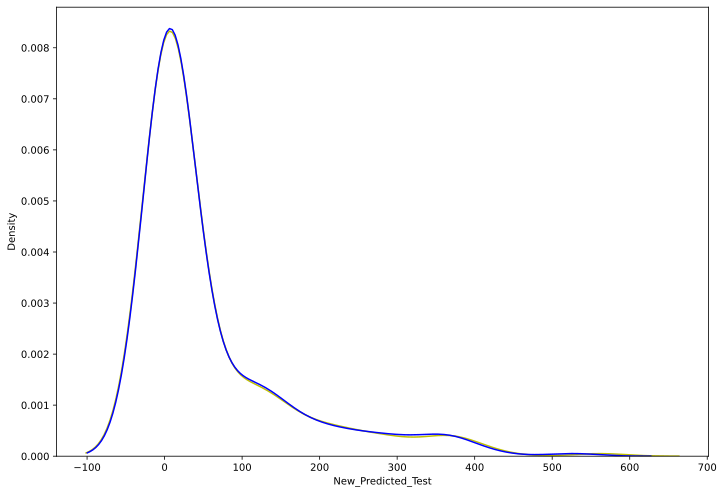

In [142]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(df_test[['T2LM']], hist = False, color="y", label = "Actual")

sns.distplot(df_test['New_Predicted_Test'], hist = False, color="b", label = "T2LM Prediced Values", ax=ax1)

<AxesSubplot:xlabel='New_Predicted_Train', ylabel='Density'>

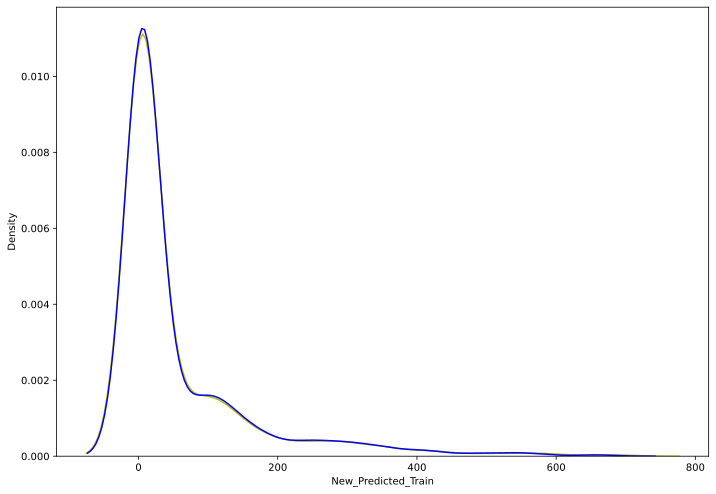

In [143]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(df_train[['T2LM']], hist=False, color="y", label= "Actual")

sns.distplot(df_train['New_Predicted_Train'], hist=False, color="b", label="T2LM Trained Values", ax=ax1)

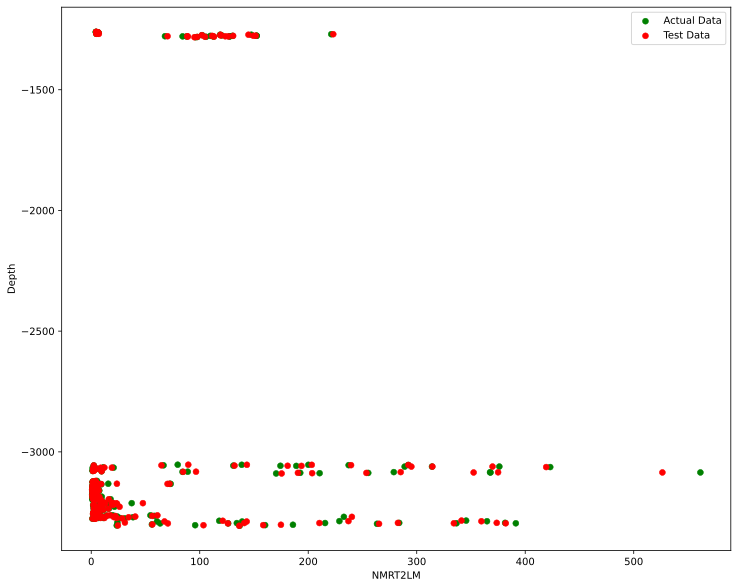

In [144]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(df_test['T2LM'], -df_test.index, color = "green", linewidth = 0.5, label = 'Actual Data')
ax.scatter(df_test['New_Predicted_Test'], -df_test.index, color = "red", linewidth = 0.5, label = 'Test Data')
ax.set_xlabel('NMRT2LM')
ax.set_ylabel('Depth')
plt.show
plt.legend()

In [77]:
df_val = pd.read_excel("WELLS_NEW.xlsx", sheet_name = 'Hawqa_9')

## Feature Engineering

In [78]:
df_val.insert(8,"New_feat",df_val['DEN'] + df_val['SW'])
df_val.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,New_feat,RES_SLW,SW,T2LM
0,2312.0604,2.4765,64.6610,0.002791,0.2689,0.089078,1.1013,1.1167,3.4765,1.1366,1.0,1.218862
1,2312.2128,2.4872,55.6450,0.000936,0.2131,0.083883,1.1706,1.1900,3.4872,1.2152,1.0,1.070478
2,2312.3652,2.4859,51.8756,0.000214,0.1995,0.084515,1.1458,1.1781,3.4859,1.2034,1.0,0.940262
3,2312.5176,2.4668,50.9773,0.000908,0.2198,0.093786,1.0753,1.0991,3.4668,1.1329,1.0,0.928306
4,2312.6700,2.4378,56.4467,0.003257,0.2655,0.107864,0.9667,0.9862,3.4378,1.0292,1.0,0.962881


In [79]:
df_val.insert(9,"New_feat2",df_val['DEN'] + df_val['NEU'])
df_val.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,New_feat,New_feat2,RES_SLW,SW,T2LM
0,2312.0604,2.4765,64.6610,0.002791,0.2689,0.089078,1.1013,1.1167,3.4765,2.7454,1.1366,1.0,1.218862
1,2312.2128,2.4872,55.6450,0.000936,0.2131,0.083883,1.1706,1.1900,3.4872,2.7003,1.2152,1.0,1.070478
2,2312.3652,2.4859,51.8756,0.000214,0.1995,0.084515,1.1458,1.1781,3.4859,2.6854,1.2034,1.0,0.940262
3,2312.5176,2.4668,50.9773,0.000908,0.2198,0.093786,1.0753,1.0991,3.4668,2.6866,1.1329,1.0,0.928306
4,2312.6700,2.4378,56.4467,0.003257,0.2655,0.107864,0.9667,0.9862,3.4378,2.7033,1.0292,1.0,0.962881


In [80]:
df_val.insert(10,"New_feat3",df_val['POR'] + df_val['SW'])
df_val.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,New_feat,New_feat2,New_feat3,RES_SLW,SW,T2LM
0,2312.0604,2.4765,64.6610,0.002791,0.2689,0.089078,1.1013,1.1167,3.4765,2.7454,1.089078,1.1366,1.0,1.218862
1,2312.2128,2.4872,55.6450,0.000936,0.2131,0.083883,1.1706,1.1900,3.4872,2.7003,1.083883,1.2152,1.0,1.070478
2,2312.3652,2.4859,51.8756,0.000214,0.1995,0.084515,1.1458,1.1781,3.4859,2.6854,1.084515,1.2034,1.0,0.940262
3,2312.5176,2.4668,50.9773,0.000908,0.2198,0.093786,1.0753,1.0991,3.4668,2.6866,1.093786,1.1329,1.0,0.928306
4,2312.6700,2.4378,56.4467,0.003257,0.2655,0.107864,0.9667,0.9862,3.4378,2.7033,1.107864,1.0292,1.0,0.962881


In [81]:
df_val.insert(11,"New_feat5",np.sqrt(df_val['DEN'] * df_val['GR']))
df_val.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,New_feat,New_feat2,New_feat3,New_feat5,RES_SLW,SW,T2LM
0,2312.0604,2.4765,64.6610,0.002791,0.2689,0.089078,1.1013,1.1167,3.4765,2.7454,1.089078,12.654366,1.1366,1.0,1.218862
1,2312.2128,2.4872,55.6450,0.000936,0.2131,0.083883,1.1706,1.1900,3.4872,2.7003,1.083883,11.764363,1.2152,1.0,1.070478
2,2312.3652,2.4859,51.8756,0.000214,0.1995,0.084515,1.1458,1.1781,3.4859,2.6854,1.084515,11.355948,1.2034,1.0,0.940262
3,2312.5176,2.4668,50.9773,0.000908,0.2198,0.093786,1.0753,1.0991,3.4668,2.6866,1.093786,11.213867,1.1329,1.0,0.928306
4,2312.6700,2.4378,56.4467,0.003257,0.2655,0.107864,0.9667,0.9862,3.4378,2.7033,1.107864,11.730548,1.0292,1.0,0.962881


In [82]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

standard_scaler = StandardScaler()

df_val.insert(12,"New_feat7",standard_scaler.fit_transform(df_val[['SW']]))
df_val.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,New_feat,New_feat2,New_feat3,New_feat5,New_feat7,RES_SLW,SW,T2LM
0,2312.0604,2.4765,64.6610,0.002791,0.2689,0.089078,1.1013,1.1167,3.4765,2.7454,1.089078,12.654366,0.577203,1.1366,1.0,1.218862
1,2312.2128,2.4872,55.6450,0.000936,0.2131,0.083883,1.1706,1.1900,3.4872,2.7003,1.083883,11.764363,0.577203,1.2152,1.0,1.070478
2,2312.3652,2.4859,51.8756,0.000214,0.1995,0.084515,1.1458,1.1781,3.4859,2.6854,1.084515,11.355948,0.577203,1.2034,1.0,0.940262
3,2312.5176,2.4668,50.9773,0.000908,0.2198,0.093786,1.0753,1.0991,3.4668,2.6866,1.093786,11.213867,0.577203,1.1329,1.0,0.928306
4,2312.6700,2.4378,56.4467,0.003257,0.2655,0.107864,0.9667,0.9862,3.4378,2.7033,1.107864,11.730548,0.577203,1.0292,1.0,0.962881


In [83]:
#set MD as index
df_val = df_val.set_index('MD')
df_val.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,New_feat,New_feat2,New_feat3,New_feat5,New_feat7,RES_SLW,SW,T2LM
MD,,,,,,,,,,,,,,,
2312.0604,2.4765,64.6610,0.002791,0.2689,0.089078,1.1013,1.1167,3.4765,2.7454,1.089078,12.654366,0.577203,1.1366,1.0,1.218862
2312.2128,2.4872,55.6450,0.000936,0.2131,0.083883,1.1706,1.1900,3.4872,2.7003,1.083883,11.764363,0.577203,1.2152,1.0,1.070478
2312.3652,2.4859,51.8756,0.000214,0.1995,0.084515,1.1458,1.1781,3.4859,2.6854,1.084515,11.355948,0.577203,1.2034,1.0,0.940262
2312.5176,2.4668,50.9773,0.000908,0.2198,0.093786,1.0753,1.0991,3.4668,2.6866,1.093786,11.213867,0.577203,1.1329,1.0,0.928306
2312.6700,2.4378,56.4467,0.003257,0.2655,0.107864,0.9667,0.9862,3.4378,2.7033,1.107864,11.730548,0.577203,1.0292,1.0,0.962881


In [84]:
X_val = df_val.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR'], 1)
y_val = df_val[['T2LM']]

In [85]:
y_h = yhat_train = super_learner_predictions(X_val)

In [86]:
df_val['Predicted_SL_T2LM'] = y_h
df_val.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,New_feat,New_feat2,New_feat3,New_feat5,New_feat7,RES_SLW,SW,T2LM,Predicted_SL_T2LM
MD,,,,,,,,,,,,,,,,
2312.0604,2.4765,64.6610,0.002791,0.2689,0.089078,1.1013,1.1167,3.4765,2.7454,1.089078,12.654366,0.577203,1.1366,1.0,1.218862,8.448947
2312.2128,2.4872,55.6450,0.000936,0.2131,0.083883,1.1706,1.1900,3.4872,2.7003,1.083883,11.764363,0.577203,1.2152,1.0,1.070478,16.302093
2312.3652,2.4859,51.8756,0.000214,0.1995,0.084515,1.1458,1.1781,3.4859,2.6854,1.084515,11.355948,0.577203,1.2034,1.0,0.940262,23.060596
2312.5176,2.4668,50.9773,0.000908,0.2198,0.093786,1.0753,1.0991,3.4668,2.6866,1.093786,11.213867,0.577203,1.1329,1.0,0.928306,43.918017
2312.6700,2.4378,56.4467,0.003257,0.2655,0.107864,0.9667,0.9862,3.4378,2.7033,1.107864,11.730548,0.577203,1.0292,1.0,0.962881,19.910405


In [87]:
df_val.to_csv('Predicted_Val_Data1.csv')

In [156]:
test = Deep_Ensemble_Super_Learner.predict(X_val)

In [157]:
df_val['New_Predicted_T2LM'] = test
df_val.head()

,DEN,GR,KTIM,NEU,POR,RES_DEP,RES_MED,New_feat,New_feat2,New_feat3,New_feat5,New_feat7,RES_SLW,SW,T2LM,Predicted_SL_T2LM,New_Predicted_T2LM
MD,,,,,,,,,,,,,,,,,
2312.0604,2.4765,64.6610,0.002791,0.2689,0.089078,1.1013,1.1167,3.4765,2.7454,1.089078,12.654366,0.577203,1.1366,1.0,1.218862,14.291113,9.816795
2312.2128,2.4872,55.6450,0.000936,0.2131,0.083883,1.1706,1.1900,3.4872,2.7003,1.083883,11.764363,0.577203,1.2152,1.0,1.070478,25.679181,21.196343
2312.3652,2.4859,51.8756,0.000214,0.1995,0.084515,1.1458,1.1781,3.4859,2.6854,1.084515,11.355948,0.577203,1.2034,1.0,0.940262,21.014074,18.001888
2312.5176,2.4668,50.9773,0.000908,0.2198,0.093786,1.0753,1.0991,3.4668,2.6866,1.093786,11.213867,0.577203,1.1329,1.0,0.928306,27.743156,34.632074
2312.6700,2.4378,56.4467,0.003257,0.2655,0.107864,0.9667,0.9862,3.4378,2.7033,1.107864,11.730548,0.577203,1.0292,1.0,0.962881,30.064380,21.297606


In [158]:
df_val.to_csv('Predicted_Val_Data.csv')

In [88]:
from sklearn import model_selection
import joblib
import pickle

# save the model to disk
filename = 'Super_Learner.sav'
joblib.dump(super_learner_predictions, filename)

['Super_Learner.sav']

In [89]:
# create an iterator object with write permission - model.pkl
with open('Super_Learner_pkl', 'wb') as files:
    pickle.dump(super_learner_predictions, files)

In [161]:
# load the model from disk
loaded_model = joblib.load(filename)

In [162]:
# load saved model
with open('model_pkl' , 'rb') as f:
    DESL = pickle.load(f)

In [163]:
!pip install flask

Defaulting to user installation because normal site-packages is not writeable


In [164]:
!pip install waitress

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)
Filename = 'model_pkl'
with open(Filename, 'rb') as file:
    model = pickle.load(file)

    
@app.route('/')
def index_page():
    return jsonify({'message':'This is the api which predicts NMR T2LM for sandstone reservoirs.',
                   'Parameters_required': 'GR, NEU, SW, PERM, Addition (DEN,SW), Addition (DEN,NEU), Addition (POR,SW), Square root (Product(DEN,GR)) and Scaled(SW)'})

@app.route('/predict', methods=['POST', 'GET'])
def predict():
    query = request.args
    Gamma_Ray = float(query.get('GR'))
    Neutron = float(query.get('NEU'))
    Water_Saturation = float(query.get('SW'))
    Permeability = float(query.get('PERM'))
    Density_Water_Saturation = float(query.get('Addition (DEN,SW)'))
    Density_Neutron = float(query.get('Addition (DEN,NEU)'))
    Porosity_Water_Saturation = float(query.get('Addition (POR,SW)'))
    Density_Gamma_Ray = float(query.get('Square root (Product(DEN,GR)'))
    Scaled_Water_Saturation = float(query.get('Scaled(SW)'))
    T2LM = model.predict([[Gamma_Ray, Neutron, Water_Saturation, Permeability, Density_Water_Saturation, Density_Neutron, Porosity_Water_Saturation, Density_Gamma_Ray, Scaled_Water_Saturation]]).tolist()[0]
    return jsonify({'prediction':T2LM})

if __name__ == "__main__":
    from waitress import serve
    serve(app, host="0.0.0.0", port=8080)

In [ ]:
!pip install kivy 
!pip install kivymd

In [ ]:
from kivymd.app import MDApp
from kivy.lang.builder import Builder
from kivy.uix.screenmanager import Screen, ScreenManager
from kivy.core.window import Window

Window.size = (400, 600)

Builder_string = '''
ScreenManager:
    Main:
<Main>:
    name : 'main'
    MDLabel:
        text: 'Sample Text Here'
'''

class Main(Screen):
    pass

sm = ScreenManager()
sm.add_widget(Main(name='main'))

class MainApp(MDApp):
    def build(self):
        self.help_string = Builder.load_string(Builder_string)
        return self.help_string
    
    MainApp().run()

[INFO   ] [Logger      ] Record log in /home/jupyter-t31/.kivy/logs/kivy_22-01-10_1.txt
[INFO   ] [Kivy        ] v2.0.0
[INFO   ] [Kivy        ] Installed at "/home/jupyter-t31/.local/lib/python3.9/site-packages/kivy/__init__.py"
[INFO   ] [Python      ] v3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0]
[INFO   ] [Python      ] Interpreter at "/opt/tljh/user/bin/python"
[INFO   ] [KivyMD      ] 0.104.2, git-bc7d1f5, 2021-06-06 (installed at "/home/jupyter-t31/.local/lib/python3.9/site-packages/kivymd/__init__.py")
[INFO   ] [Factory     ] 186 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
[INFO   ] [Window      ] Provider: sdl2
